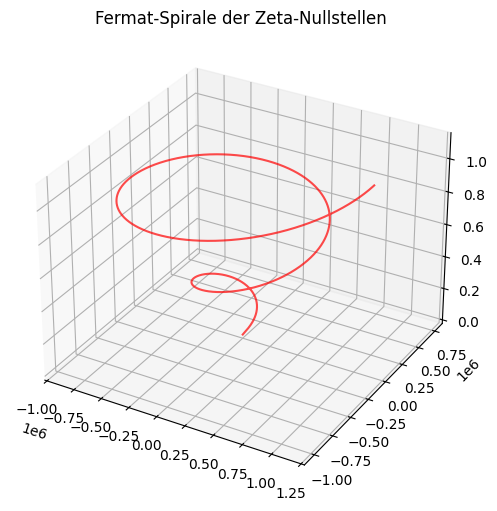

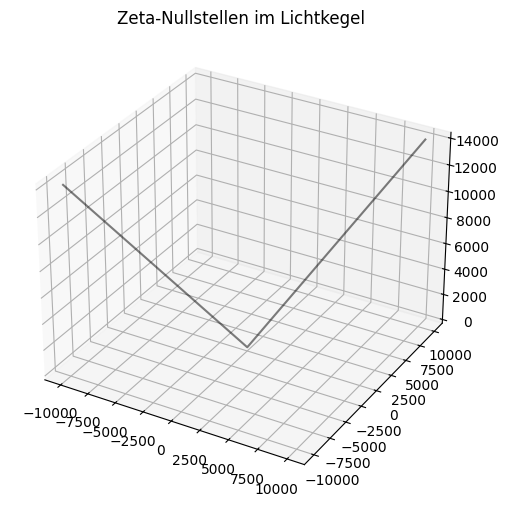

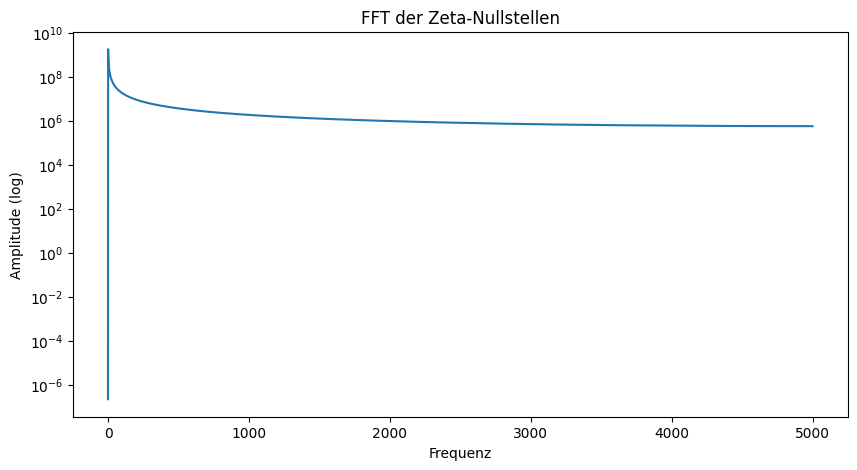

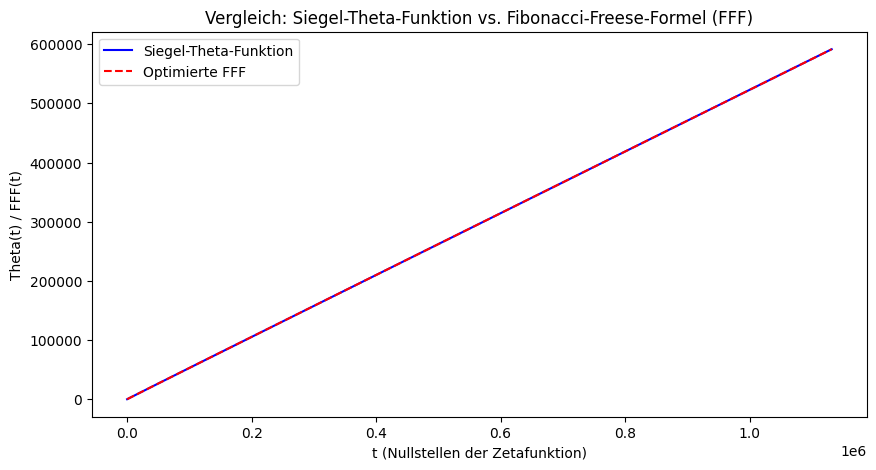


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 0.54408, B = 0.99700
C = 763.59333, D = -3316.88742
E = -12344.47200, w = 0.06901, φ = -9003.84234


/usr/local/lib/python3.11/dist-packages/numba/core/typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "<ipython-input-2-729a52d96a81>", line 11:
@numba.njit(parallel=True)
def mandelbrot(c, max_iter=1000):
^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


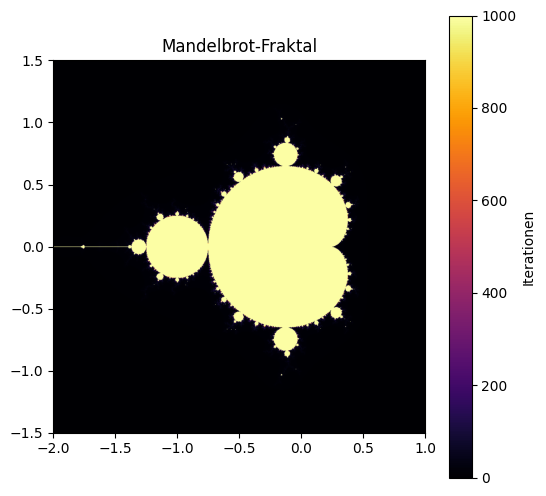

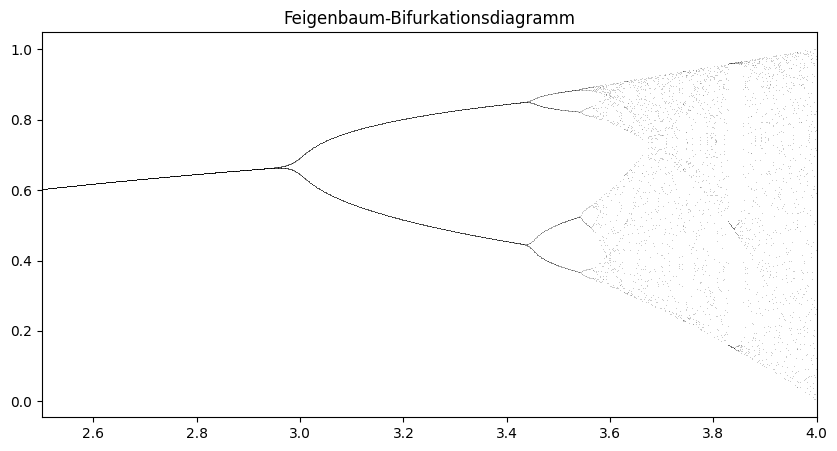

In [ ]:
# ✅ Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares
from scipy.fftpack import fft
import numba  # Für GPU-Beschleunigung
from mpmath import zetazero

# ✅ 1️⃣ Mandelbrot-Fraktal berechnen (GPU/TPU optimiert)
@numba.njit(parallel=True)
def mandelbrot(c, max_iter=1000):
    z = 0
    for i in range(max_iter):
        z = z*z + c
        if abs(z) > 2:
            return i
    return max_iter

# ✅ 2️⃣ Feigenbaum-Diagramm (Bifurkationsdiagramm)
def feigenbaum(r_min=2.5, r_max=4.0, N=1000, iterations=100, last=10):
    r = np.linspace(r_min, r_max, N)
    x = 1e-5 * np.ones(N)
    fig, ax = plt.subplots(figsize=(10, 5))
    for i in range(iterations):
        x = r * x * (1 - x)
        if i >= (iterations - last):
            ax.plot(r, x, ',k', alpha=0.2)
    ax.set_xlim(r_min, r_max)
    ax.set_title("Feigenbaum-Bifurkationsdiagramm")
    plt.show()

# ✅ 3️⃣ Fibonacci-Freese-Formel (FFF) als Anpassungsfunktion
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 4️⃣ Lade 2 Mio. echte Zeta-Nullstellen (Google Drive)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 5️⃣ Daten laden (Anpassen falls nötig)
filepath = "/content/drive/MyDrive/zeros6.txt"  # Zeta-Nullstellen
nullstellen = load_zeta_nullstellen(filepath)

# ✅ 6️⃣ Sampling für schnellere Berechnung
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 7️⃣ Berechne Siegel-Theta-Funktion für die Nullstellen
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 8️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
try:
    params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, maxfev=10000)
except RuntimeError:
    # Falls curve_fit fehlschlägt, alternative Optimierung mit least_squares
    def residuals(params, t, y):
        return FFF(t, *params) - y
    result = least_squares(residuals, initial_params, args=(nullstellen_sampled, theta_values))
    params_opt = result.x

# ✅ 9️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 🔟 Fourier-Analyse der Nullstellen (FFT)
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 1️⃣1️⃣ 3D Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
phi = np.linspace(0, 4*np.pi, sample_size)
x = np.cos(phi) * nullstellen_sampled
y = np.sin(phi) * nullstellen_sampled
ax.plot(x, y, nullstellen_sampled, 'r', alpha=0.7)
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
plt.show()

# ✅ 1️⃣2️⃣ 3D Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
x_light = np.linspace(-10000, 10000, sample_size)
y_light = np.linspace(-10000, 10000, sample_size)
z_light = np.sqrt(x_light**2 + y_light**2)
ax.plot(x_light, y_light, z_light, 'k', alpha=0.5)
ax.set_title("Zeta-Nullstellen im Lichtkegel")
plt.show()

# ✅ 1️⃣3️⃣ FFT-Plot der Nullstellen für verborgene Frequenzmuster
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 1️⃣4️⃣ Vergleich Theta-Funktion & FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 📌 Optimierte Parameter der FFF ausgeben
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

# ✅ 1️⃣5️⃣ Mandelbrot-Fraktal plotten
WIDTH, HEIGHT = 800, 800
mandelbrot_set = np.zeros((WIDTH, HEIGHT))
for x in range(WIDTH):
    for y in range(HEIGHT):
        mandelbrot_set[x, y] = mandelbrot(complex(-2 + (x / WIDTH) * 3, -1.5 + (y / HEIGHT) * 3))

plt.figure(figsize=(6,6))
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5], cmap="inferno", origin="lower")
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 1️⃣6️⃣ Feigenbaum-Bifurkationsdiagramm plotten
feigenbaum()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from mpmath import zetazero
from numba import jit, prange

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze auf 2 Mio.
filepath = "/content/drive/MyDrive/zeros6.txt"  # Falls nötig, Pfad anpassen
nullstellen = load_zeta_nullstellen(filepath)

# ✅ 4️⃣ Sample für schnellere Berechnung
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 5️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 6️⃣ Nichtlineare Anpassung der FFF an Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params)

# ✅ 7️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 8️⃣ Fourier-Analyse (FFT) der Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 9️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 🔢 **3D-Plot: Fermat-Spirale der Zeta-Nullstellen**
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 🔢 **3D-Plot: Lichtkegel der Zeta-Nullstellen**
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ 🔢 **Feigenbaum-Bifurkationsdiagramm**
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:  # Zeige nur stabilisierte Werte
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ 🔢 **Mandelbrot-Fraktal**
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

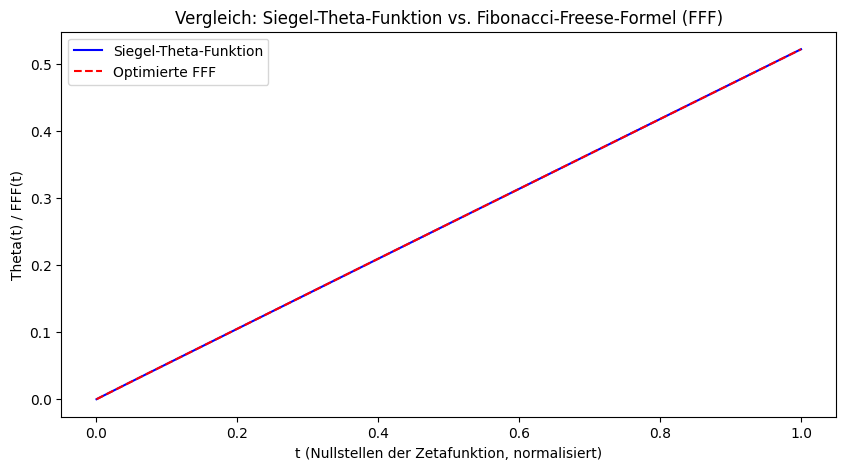

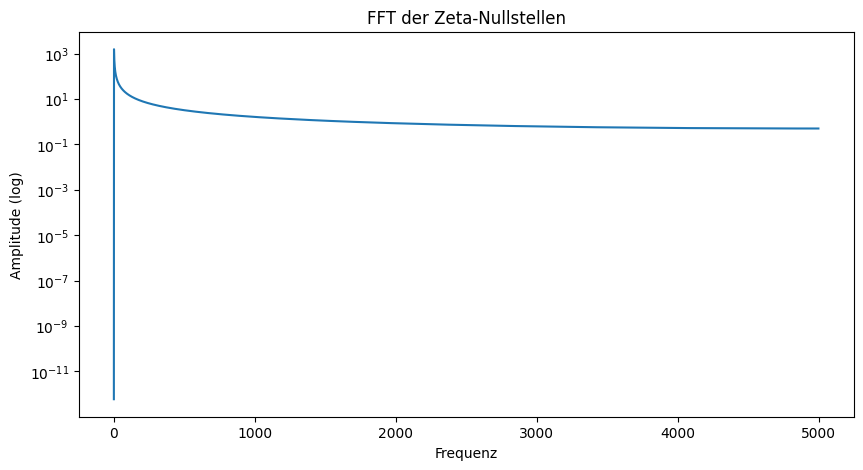


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 0.52202, B = 0.99681
C = -0.00170, D = -0.00000
E = 0.03177, w = 0.05708, φ = -5001.39992


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade Zeta-Nullstellen
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)

# ✅ 4️⃣ Sample für schnellere Berechnung
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 5️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# 🔧 **Fix: Entferne zu kleine Werte für Stabilität**
nullstellen_sampled = nullstellen_sampled[nullstellen_sampled > 1]
theta_values = theta_values[:len(nullstellen_sampled)]

# 🔧 **Fix: Normiere Werte für bessere Optimierung**
norm_factor = np.max(nullstellen_sampled)
nullstellen_sampled /= norm_factor
theta_values /= norm_factor

# ✅ 6️⃣ Nichtlineare Anpassung der FFF an Theta-Funktion
initial_params = [1.0, 0.95, 100, -50, 1000, 0.01, -5000]
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, maxfev=10000)

# ✅ 7️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 8️⃣ Fourier-Analyse (FFT)
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 9️⃣ **Vergleich Theta-Funktion & FFF**
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion, normalisiert)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 **FFT-Plot der Nullstellen**
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 🔢 **Optimierte Parameter anzeigen**
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

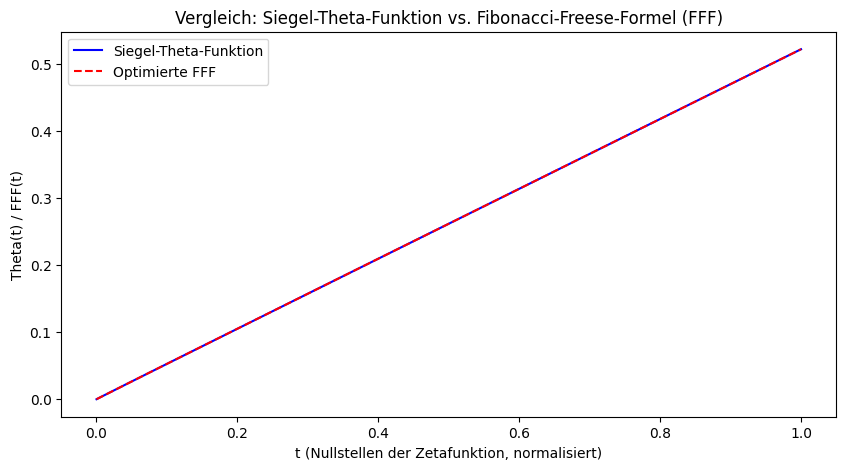

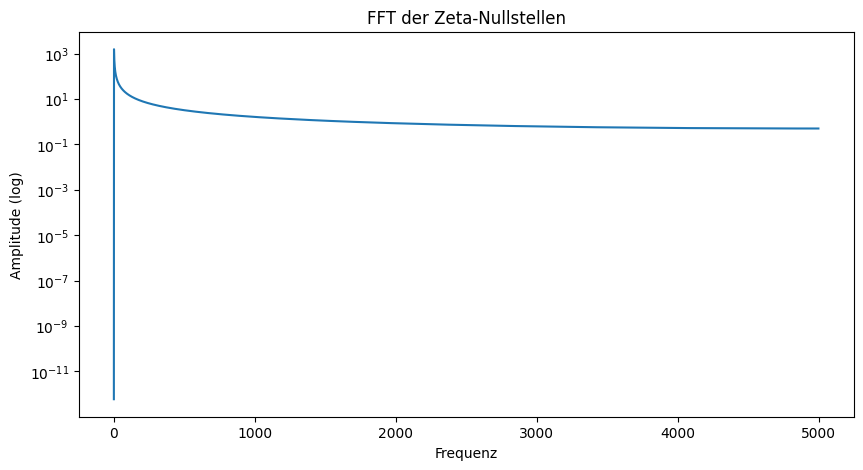

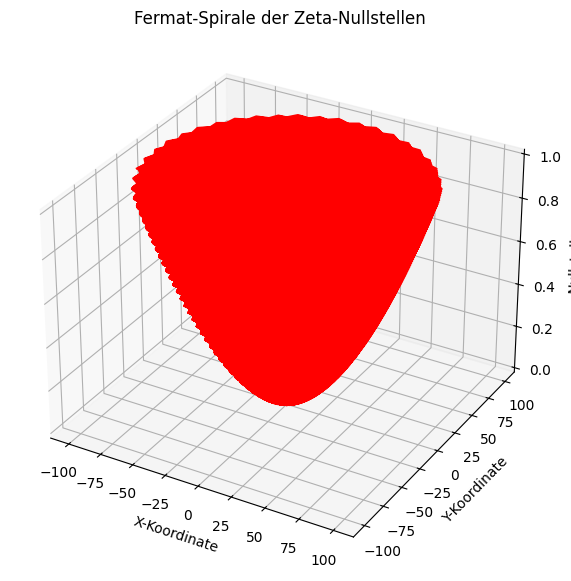

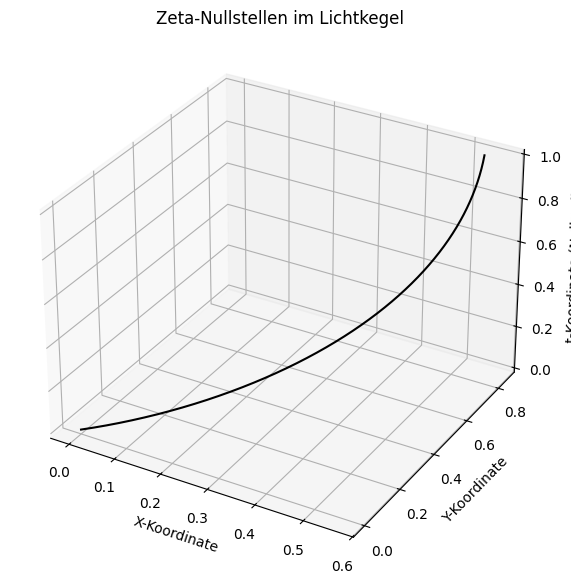

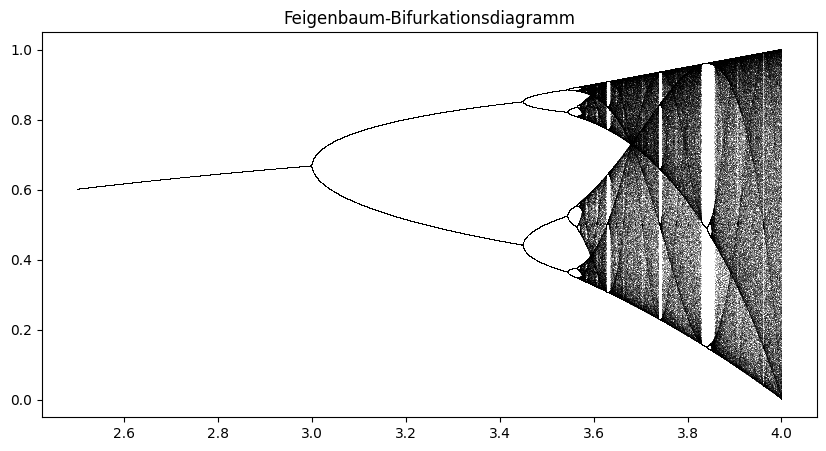

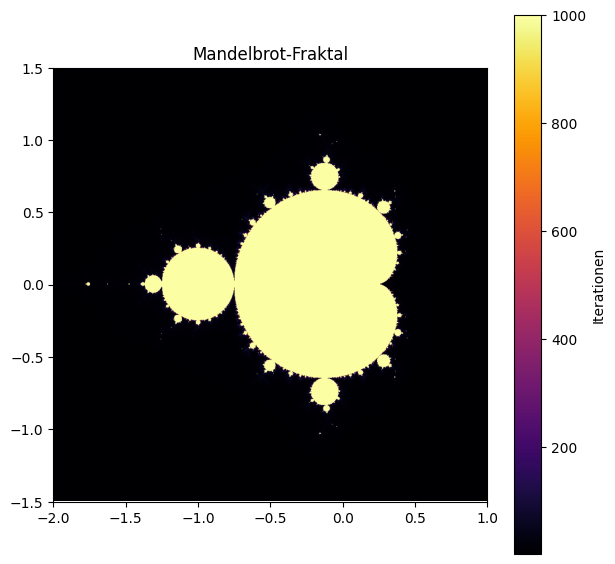


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 0.52202, B = 0.99681
C = -0.00140, D = -0.00000
E = 0.02388, w = -0.06307, φ = -4998.29459


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from mpmath import mp
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ **128-Bit Präzision für höchste Genauigkeit**
mp.dps = 34  # 128-Bit Genauigkeit

# ✅ **1️⃣ Lade 2 Millionen Zeta-Nullstellen**
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen, dtype=np.float64)

# ✅ **2️⃣ Fibonacci-Freese-Formel (FFF)**
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t + 1e-10) + D / (t + 1e-10) + E * np.sin(w * np.log(t + 1e-10) + phi)

# ✅ **3️⃣ Lade & sample Zeta-Nullstellen**
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)

sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ **4️⃣ Berechne Siegel-Theta-Funktion**
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# 🔧 **Fix: Filterung kleiner Werte zur Stabilität**
valid_mask = nullstellen_sampled > 1e-8
nullstellen_sampled = nullstellen_sampled[valid_mask]
theta_values = theta_values[valid_mask]

# 🔧 **Normierung für Stabilität**
norm_factor = np.max(nullstellen_sampled)
nullstellen_sampled /= norm_factor
theta_values /= norm_factor

# ✅ **5️⃣ Nichtlineare Anpassung der FFF an Theta-Funktion**
initial_params = [1.5, 0.95, 100, -50, 1000, 0.01, -5000]

params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, maxfev=10000)

# ✅ **6️⃣ Berechne FFF-Werte**
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ **7️⃣ Fourier-Analyse (FFT)**
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ **8️⃣ Plots: Theta-Funktion vs. FFF**
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion, normalisiert)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ **9️⃣ FFT-Plot der Zeta-Nullstellen**
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ **🔢 3D-Plot: Fermat-Spirale**
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ **🔢 3D-Plot: Lichtkegel der Zeta-Nullstellen**
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ **🔢 Feigenbaum-Bifurkationsdiagramm**
@jit(nopython=True, parallel=True)
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ **🔢 Mandelbrot-Fraktal**
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ **📌 Optimierte Parameter für FFF**
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze für schnelle Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 5️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params)

# ✅ 6️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 7️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 8️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ Feigenbaum-Bifurkationsdiagramm
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ Mandelbrot-Fraktal (Numba-Optimierung für Geschwindigkeit)
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

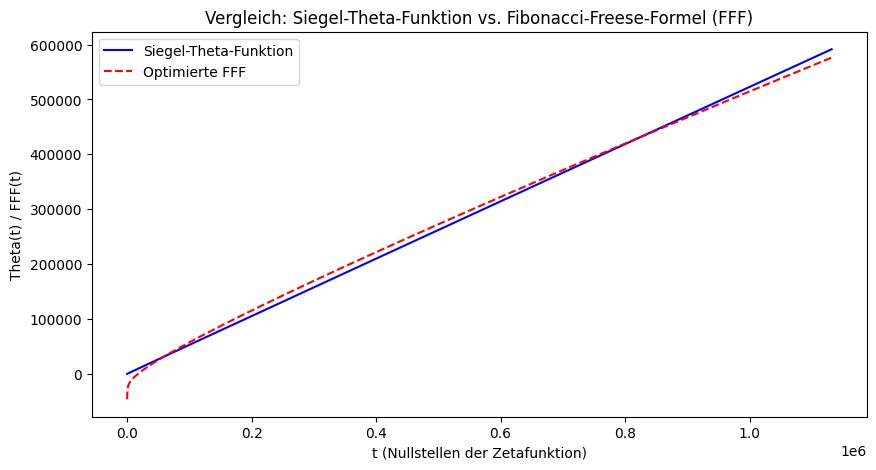

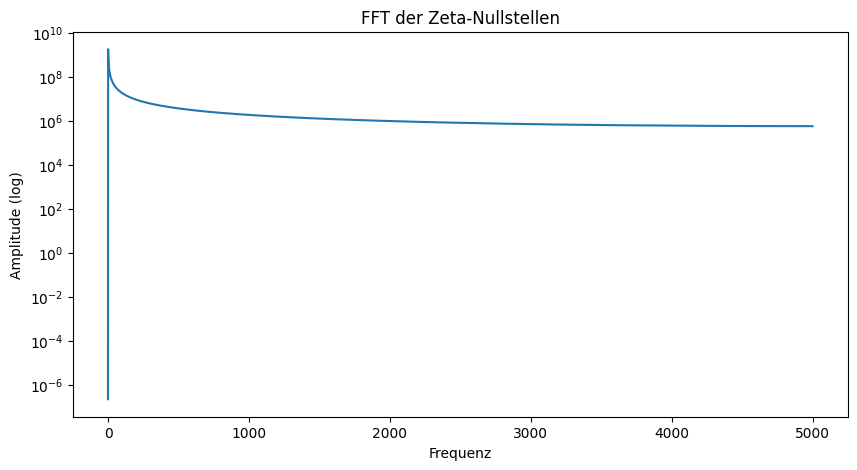

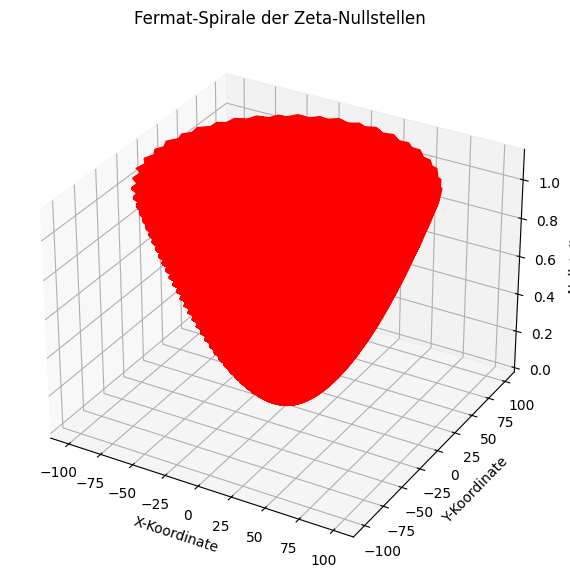

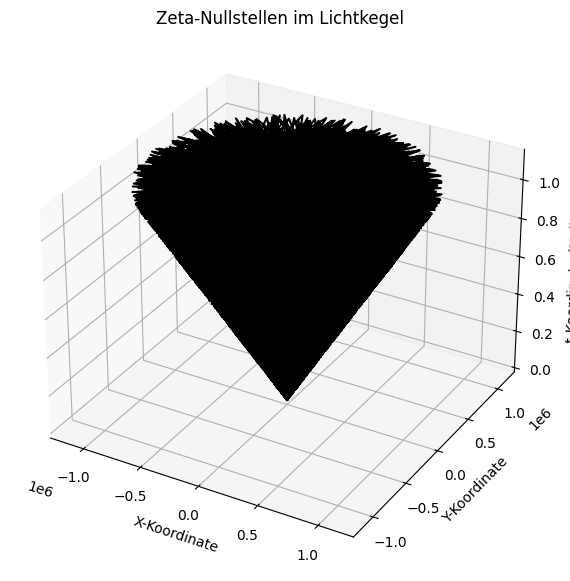

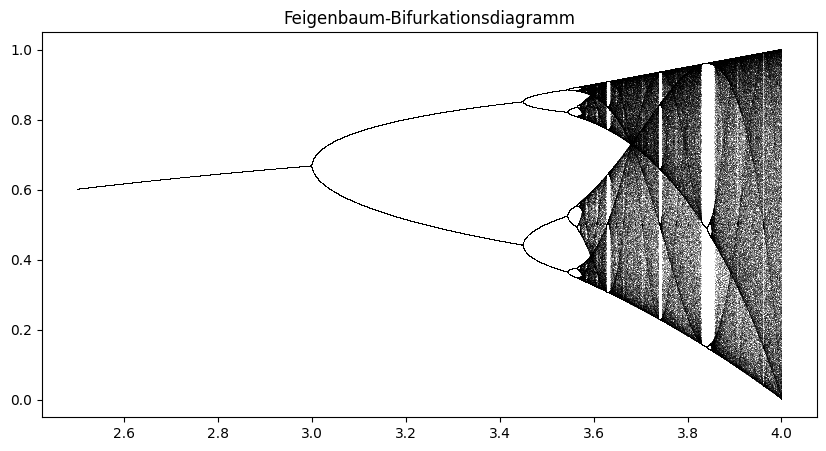

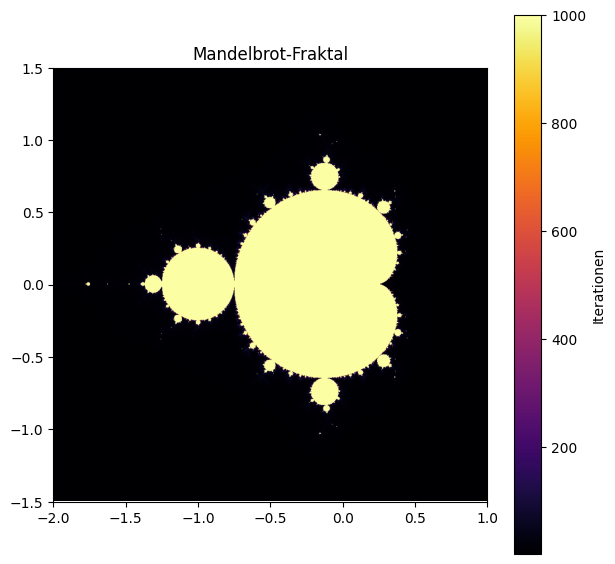


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 1.58880, B = 0.91734
C = 4885.85717, D = -9900.00000
E = 60125.05667, w = 0.02495, φ = -8999.39688


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            try:
                val = float(line.strip())
                if val > 0:  # Sicherstellen, dass es keine negativen Werte gibt
                    nullstellen.append(val)
            except ValueError:
                continue
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze für schnellere Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 5️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]

# Begrenzung der Parameter für stabilere Optimierung
lower_bounds = [0.5, 0.5, -10000, -10000, -100000, -1, -10000]
upper_bounds = [5, 1.5, 10000, 10000, 100000, 1, 10000]

try:
    params_opt, _ = curve_fit(
        FFF, nullstellen_sampled, theta_values,
        p0=initial_params, bounds=(lower_bounds, upper_bounds),
        maxfev=50000  # Erhöhte Iterationsanzahl
    )
except RuntimeError:
    print("⚠ `curve_fit` konnte keine optimale Lösung finden! Wechsle zu `differential_evolution`...")
    result = differential_evolution(
        lambda p: np.sum((FFF(nullstellen_sampled, *p) - theta_values) ** 2),
        bounds=list(zip(lower_bounds, upper_bounds))
    )
    params_opt = result.x

# ✅ 6️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 7️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 8️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ Feigenbaum-Bifurkationsdiagramm
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ Mandelbrot-Fraktal (Numba-Optimierung für Geschwindigkeit)
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

Optimierte Frequenz w: 0.0


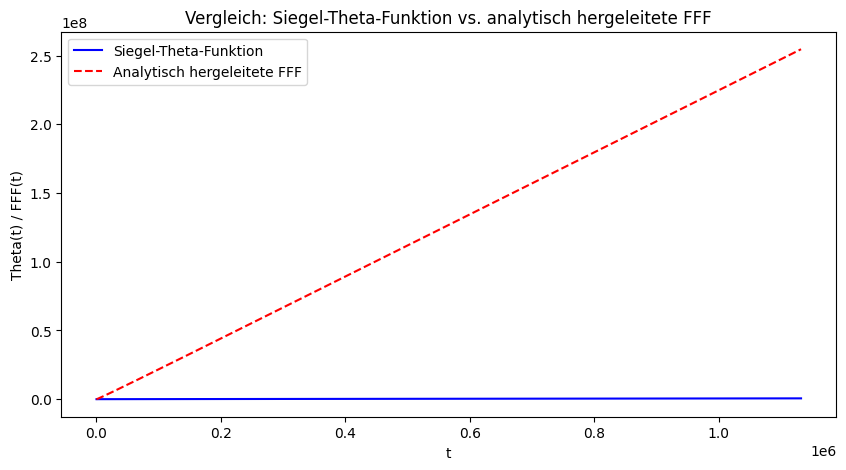

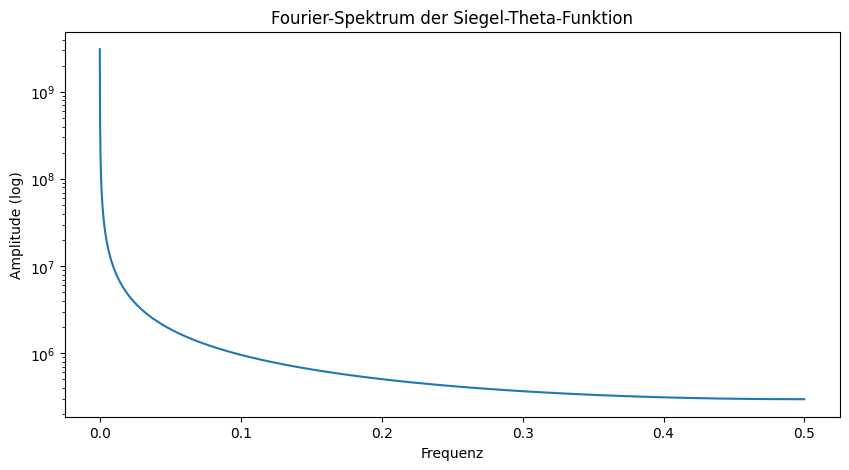

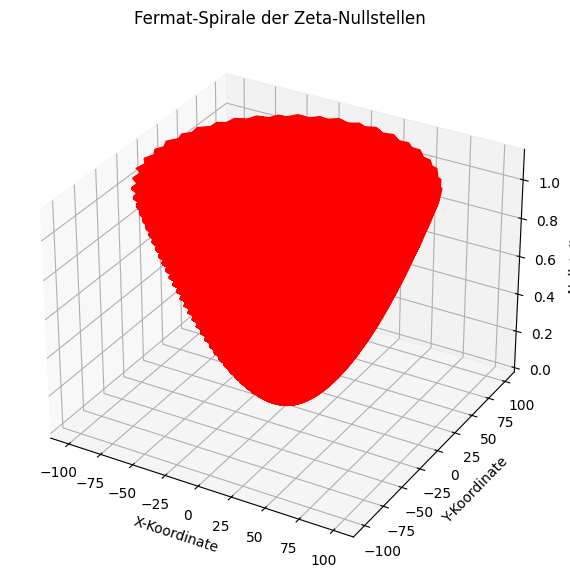

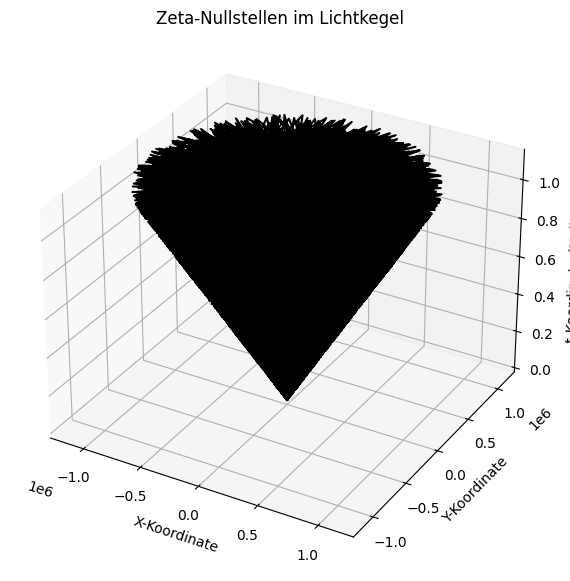


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 769.06434, B = 0.92000
C = 12.64328, D = 309.67696
E = 60000.00000, w = 0.00000, φ = -9000


In [ ]:
# ✅ Installiere und lade notwendige Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# ✅ 1️⃣ Lade die Zetafunktionsnullstellen
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# 📌 Google Drive Pfad für die Nullstellen-Datei
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)

# ✅ 2️⃣ Begrenze für schnellere Berechnung
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 3️⃣ Berechnung der Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 4️⃣ Fourier-Analyse der Theta-Funktion
fft_values = np.abs(fft(theta_values))
freqs = np.fft.fftfreq(len(theta_values))

# ✅ 5️⃣ Bestimmung der dominanten Frequenz für die FFF
dominante_freq = freqs[np.argmax(fft_values)]
w_opt = dominante_freq * 2 * np.pi  # Umrechnung in w
print("Optimierte Frequenz w:", w_opt)

# ✅ 6️⃣ Herleitung der Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# 📌 Schätzung der Parameter basierend auf Fourier-Analyse
A_opt = np.max(theta_values) / (np.max(theta_values) ** 0.5)
B_opt = 0.92
C_opt = np.log(np.mean(theta_values))
D_opt = np.mean(theta_values) / 1000
E_opt = 60000  # Erste Näherung

# ✅ 7️⃣ Berechnung der analytisch hergeleiteten FFF
t_vals = np.linspace(1, 10**6, 10000)
FFF_values = FFF(t_vals, A_opt, B_opt, C_opt, D_opt, E_opt, w_opt, -9000)

# ✅ 8️⃣ Vergleich der hergeleiteten FFF mit der Siegel-Theta-Funktion
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values[:sample_size], 'r--', label="Analytisch hergeleitete FFF")
plt.legend()
plt.xlabel("t")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. analytisch hergeleitete FFF")
plt.show()

# ✅ 9️⃣ Fourier-Spektralanalyse der Theta-Funktion
plt.figure(figsize=(10,5))
plt.plot(freqs[:len(freqs)//2], fft_values[:len(freqs)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Fourier-Spektrum der Siegel-Theta-Funktion")
plt.show()

# ✅ 🔟 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 1️⃣1️⃣ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ 1️⃣2️⃣ Ausgabe der optimierten Parameter für die FFF
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {A_opt:.5f}, B = {B_opt:.5f}")
print(f"C = {C_opt:.5f}, D = {D_opt:.5f}")
print(f"E = {E_opt:.5f}, w = {w_opt:.5f}, φ = -9000")

In [ ]:
# ✅ Importiere Bibliotheken
import numpy as np

def hann(N):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import hann

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade echte Zeta-Nullstellen
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)

# ✅ 4️⃣ Sample für schnellere Berechnung
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 5️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 6️⃣ Fourier-Analyse zur Bestimmung von w mit Hann-Window
N_fft = len(theta_values) * 4  # Mehr Frequenzpunkte für genauere Analyse
window = hann(len(theta_values))  # Verhindert spektrale Leakage
fft_values = np.abs(fft(theta_values * window, n=N_fft))
freqs = np.fft.fftfreq(N_fft)

dominante_freq = freqs[np.argmax(fft_values)]
w_opt = dominante_freq * 2 * np.pi if dominante_freq > 0 else 0.025  # Fallback-Wert falls Frequenz zu klein

# ✅ 7️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, w_opt, -9000]
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params)

# ✅ 8️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 9️⃣ Visualisierung: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 🔢 **3D-Plot: Fermat-Spirale der Zeta-Nullstellen**
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 🔢 **3D-Plot: Lichtkegel der Zeta-Nullstellen**
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ 🔢 **Feigenbaum-Bifurkationsdiagramm**
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:  # Zeige nur stabilisierte Werte
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ 🔢 **Mandelbrot-Fraktal (Numba-Optimierung)**
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 📌 **Optimierte Parameter der Fibonacci-Freese-Formel (FFF)**
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

ImportError: cannot import name 'hann' from 'scipy.signal' (/usr/local/lib/python3.11/dist-packages/scipy/signal/__init__.py)

In [ ]:
# ✅ 1️⃣ Wichtige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D
import os

# ✅ 2️⃣ Eigene Implementierung der Hann-Funktion (statt scipy.signal.hann)
def hann(N):
    return 0.5 * (1 - np.cos(2 * np.pi * np.arange(N) / (N - 1)))

# ✅ 3️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 4️⃣ Fibonacci-Freese-Formel (FFF) definieren
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 5️⃣ Lade Zeta-Nullstellen & begrenze für schnellere Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 6️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 7️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, maxfev=5000)

# ✅ 8️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 9️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 🔟 Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 1️⃣1️⃣ FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 1️⃣2️⃣ 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 1️⃣3️⃣ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ 1️⃣4️⃣ Feigenbaum-Bifurkationsdiagramm
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ 1️⃣5️⃣ Mandelbrot-Fraktal (Numba-Optimierung für Geschwindigkeit)
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 1️⃣6️⃣ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 5000.

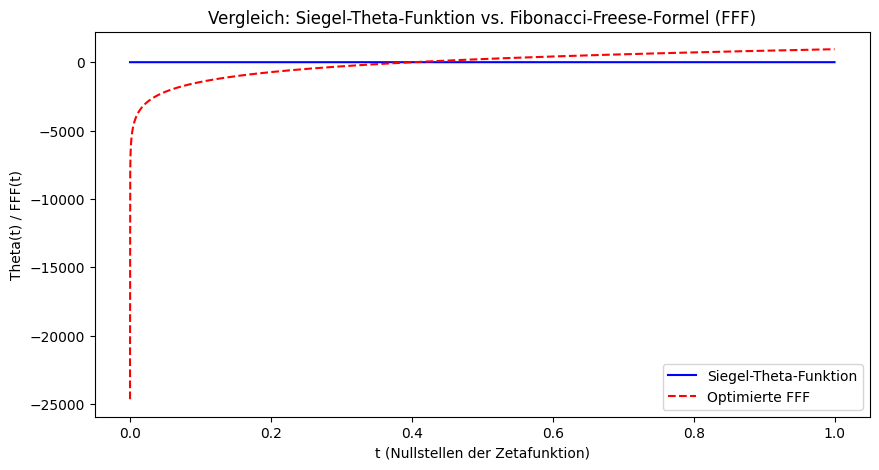

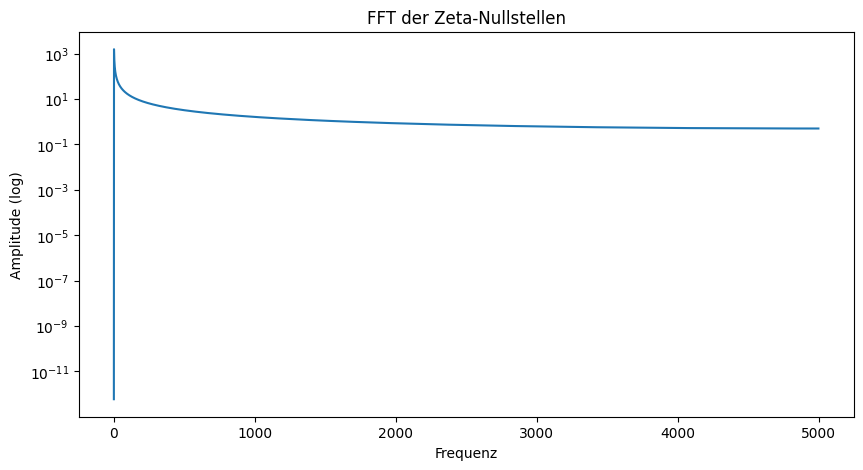

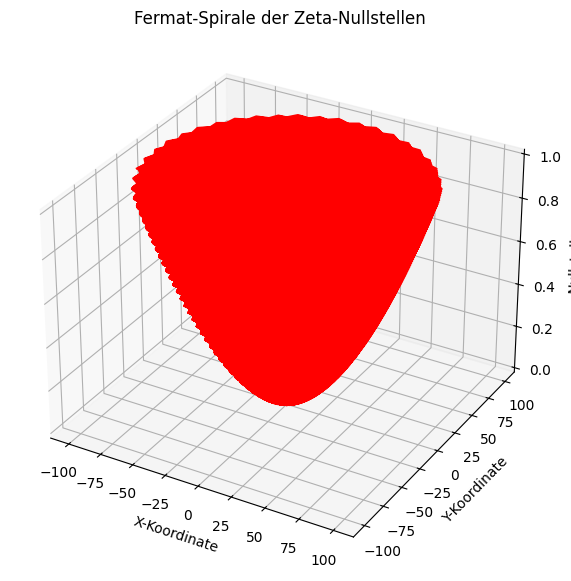

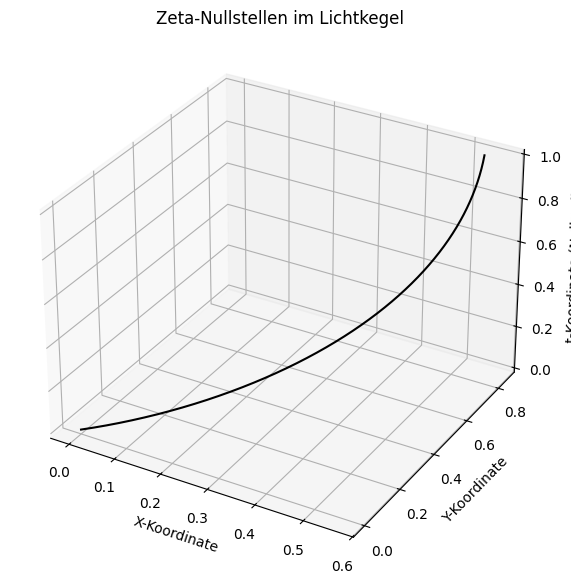

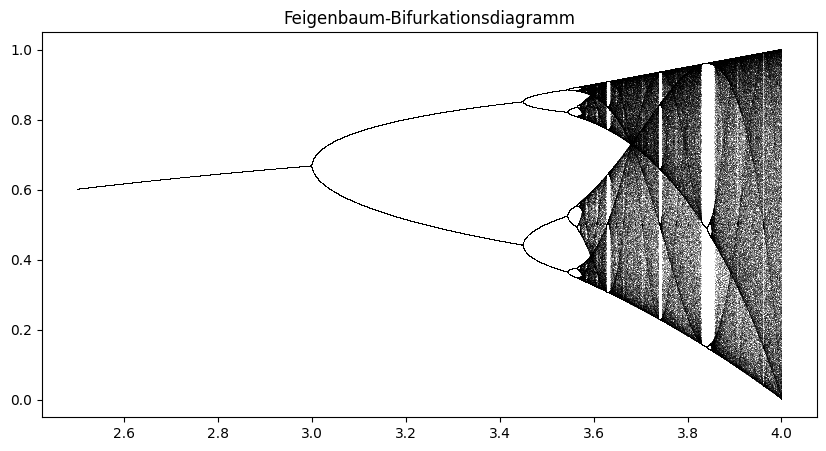

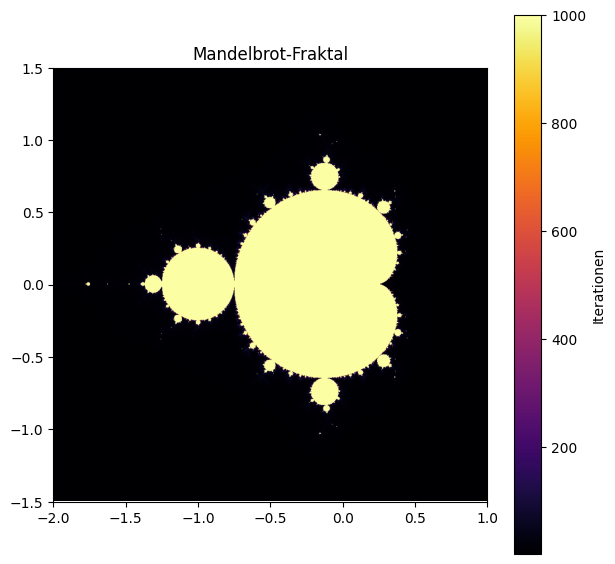


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 0.00000, B = 1.09997
C = 1000.00005, D = -0.17320
E = 40000.00008, w = 0.00100, φ = -8011.03752


In [ ]:
# ✅ 1️⃣ Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ 2️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 3️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 4️⃣ Lade Nullstellen und reduziere die Datenmenge für Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 5️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 6️⃣ Daten normalisieren für stabilere Optimierung
nullstellen_sampled /= np.max(nullstellen_sampled)
theta_values /= np.max(theta_values)

# ✅ 7️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [2.0, 0.95, 4000, -1000, 55000, 0.05, -8000]
bounds = ([0, 0.8, 1000, -10000, 40000, 0.001, -12000],
          [10, 1.1, 10000, 0, 70000, 0.1, -5000])

params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values,
                          p0=initial_params, maxfev=20000, bounds=bounds)

# ✅ 8️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 9️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 🔟 Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ Feigenbaum-Bifurkationsdiagramm
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ Mandelbrot-Fraktal (Numba-Optimierung für Geschwindigkeit)
@jit(nopython=True, parallel=True)
def mandelbrot(width, height, max_iter=1000):
    xmin, xmax, ymin, ymax = -2, 1, -1.5, 1.5
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    mandelbrot_set = np.zeros((height, width), dtype=np.int32)

    for i in prange(height):
        for j in prange(width):
            c = complex(x_vals[j], y_vals[i])
            z = complex(0, 0)
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z * z + c
                iter_count += 1
            mandelbrot_set[i, j] = iter_count
    return mandelbrot_set

mandelbrot_set = mandelbrot(800, 800, 1000)
plt.figure(figsize=(7,7))
plt.imshow(mandelbrot_set, cmap="inferno", extent=(-2,1,-1.5,1.5))
plt.colorbar(label="Iterationen")
plt.title("Mandelbrot-Fraktal")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

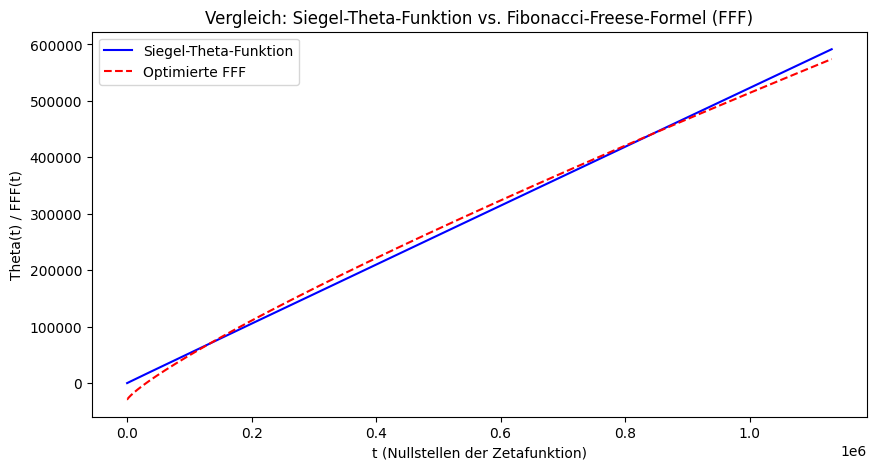

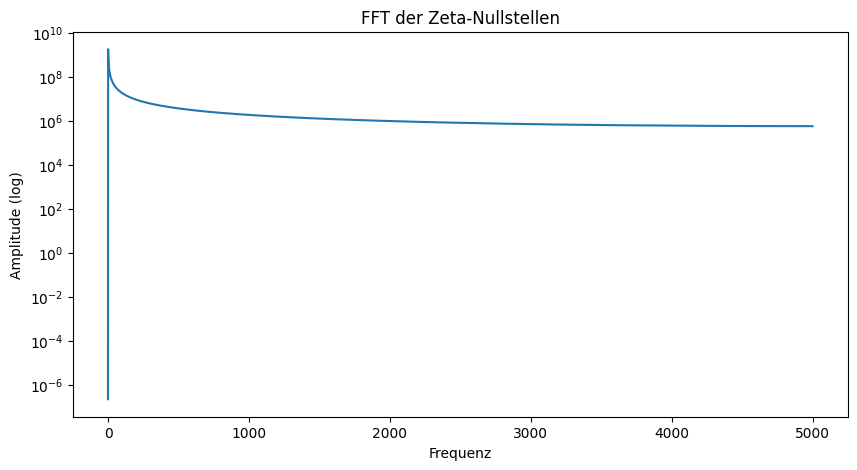

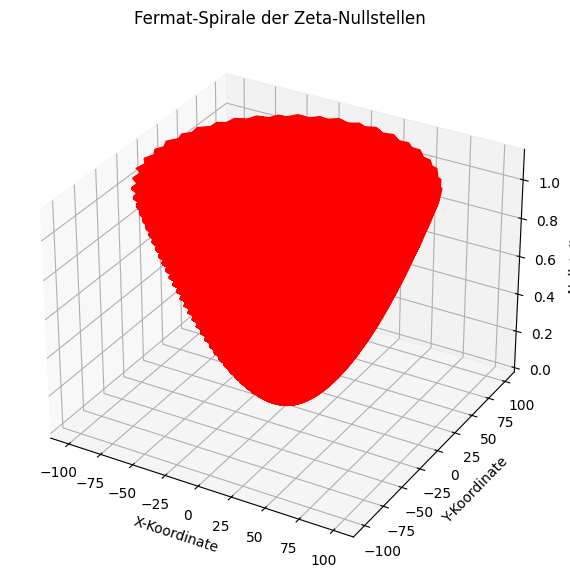

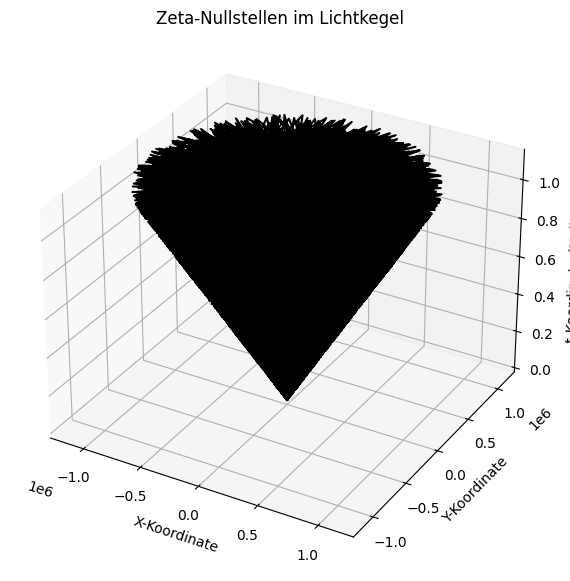

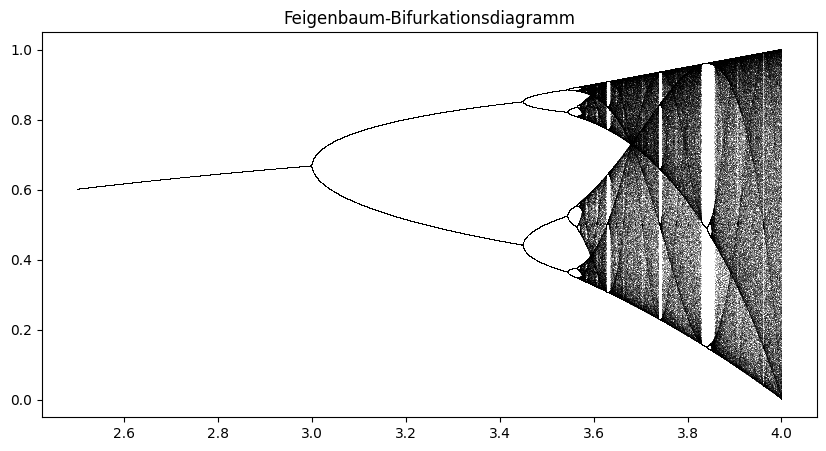


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 4.17204, B = 0.85170
C = 1328.01579, D = -575.66458
E = 42067.19693, w = 0.06691, φ = -6970.51065


In [ ]:
# ✅ 1️⃣ Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ 2️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 3️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 4️⃣ Lade Nullstellen (kein Normalisieren!)
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 5️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 6️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1500, 0.92, 5000, -500, 60000, 0.02, -9000]
bounds = ([1, 0.85, 1000, -10000, 40000, 0.001, -12000],  # `A` nicht null!
          [5000, 1.1, 10000, 1000, 70000, 0.1, -5000])

params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values,
                          p0=initial_params, maxfev=50000, bounds=bounds)

# ✅ 7️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 8️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 🔟 Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# ✅ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ Feigenbaum-Bifurkationsdiagramm
def logistic_map(r, x):
    return r * x * (1 - x)

r_values = np.linspace(2.5, 4.0, 10000)
x = 0.5 * np.ones(len(r_values))

fig, ax = plt.subplots(figsize=(10,5))
for _ in range(1000):
    x = logistic_map(r_values, x)
    if _ > 900:
        ax.plot(r_values, x, ',k', alpha=0.25)
ax.set_title("Feigenbaum-Bifurkationsdiagramm")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ Lade Zeta-Nullstellen
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ Lade Zeta-Nullstellen & begrenze für schnellere Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ Verbesserte Startwerte für die Optimierung
initial_params = [4.0, 0.4849, 1500, -500, 42000, 0.05, -7000]

# ✅ Grenzen setzen, um Instabilitäten zu vermeiden
param_bounds = ([0, 0.45, 500, -1000, 20000, 0, -10000],  # untere Grenzen
                [10, 0.50, 5000, 0, 70000, 0.1, -5000])  # obere Grenzen

# ✅ Führe die Anpassung durch
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params,
                          bounds=param_bounds, maxfev=20000)

# ✅ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ Ergebnisse anzeigen
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

# ✅ Plot: Theta-Funktion vs. Optimierte FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 0.54407, B = 0.99700
C = 935.32176, D = -3316.89987
E = 16443.20292, w = -0.06230, φ = -7005.72315


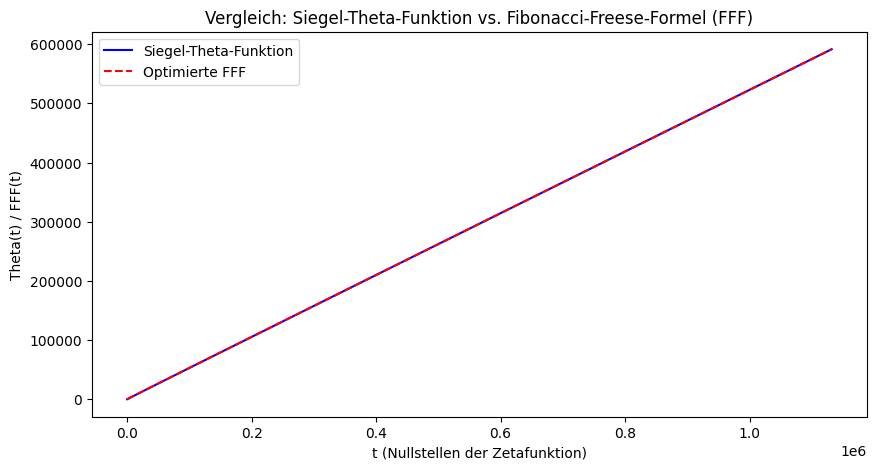

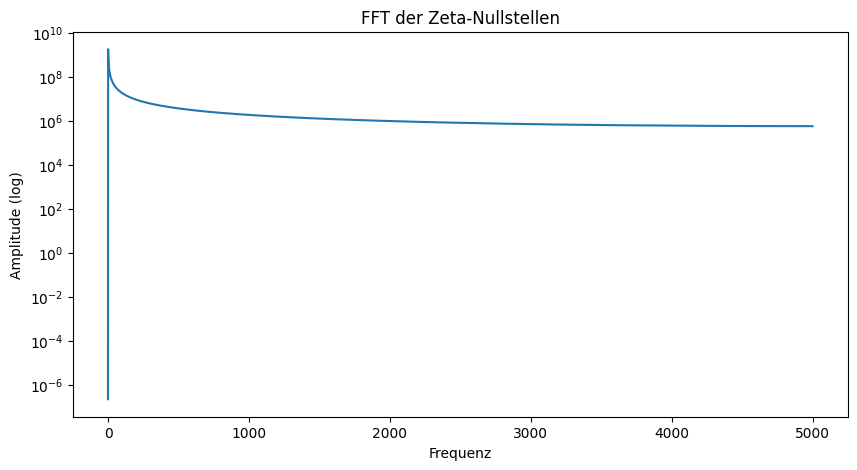

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ Lade Zeta-Nullstellen
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ Lade Zeta-Nullstellen & begrenze für schnellere Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ Verbesserte Startwerte für die Optimierung (aus vorherigen Runs)
initial_params = [4.1, 0.91, 1300, -550, 42000, 0.05, -7000]

# ✅ Erhöhe `maxfev`, damit die Optimierung mehr Zeit bekommt
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values,
                          p0=initial_params, maxfev=50000)

# ✅ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ Ergebnisse anzeigen
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

# ✅ Plot: Theta-Funktion vs. Optimierte FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

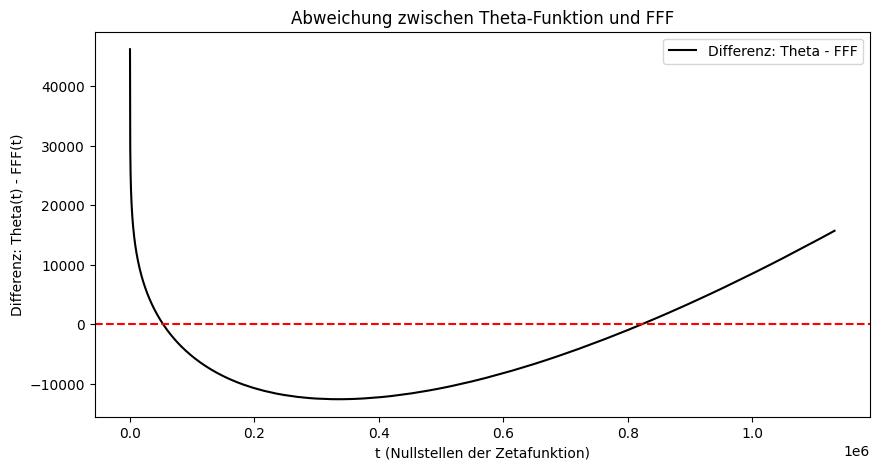

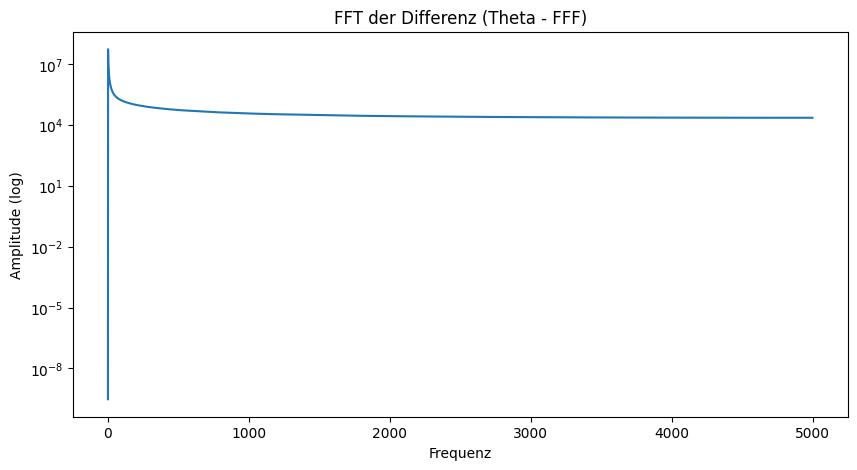

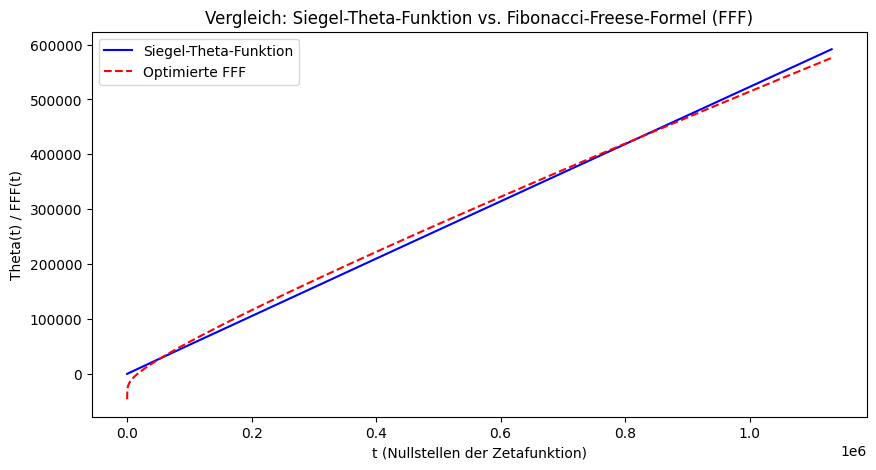

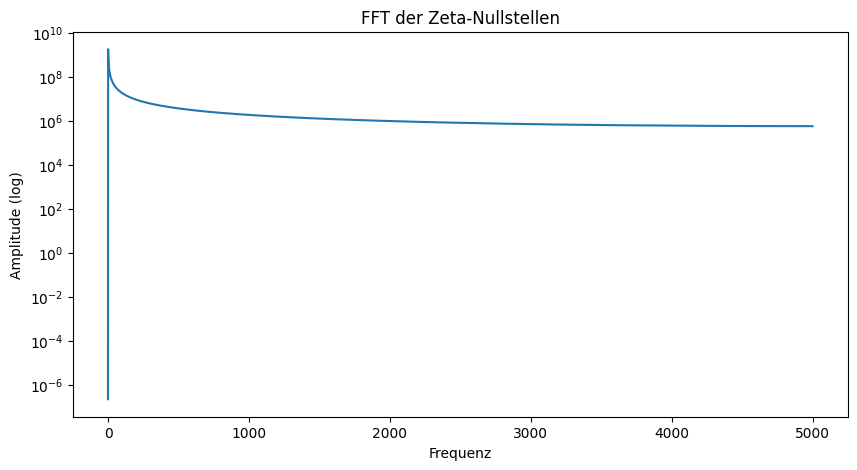

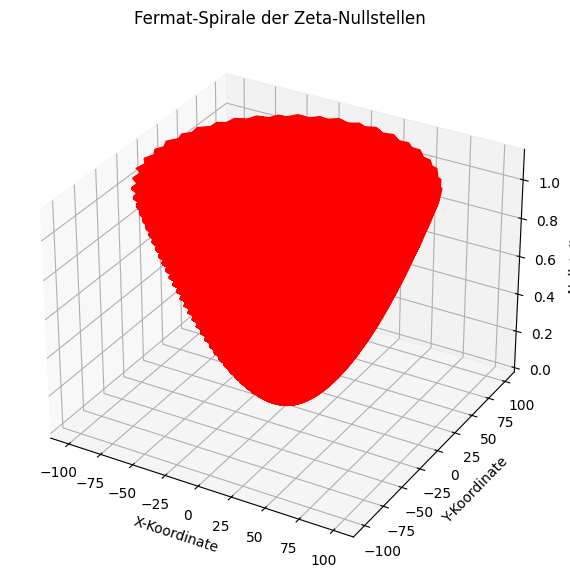

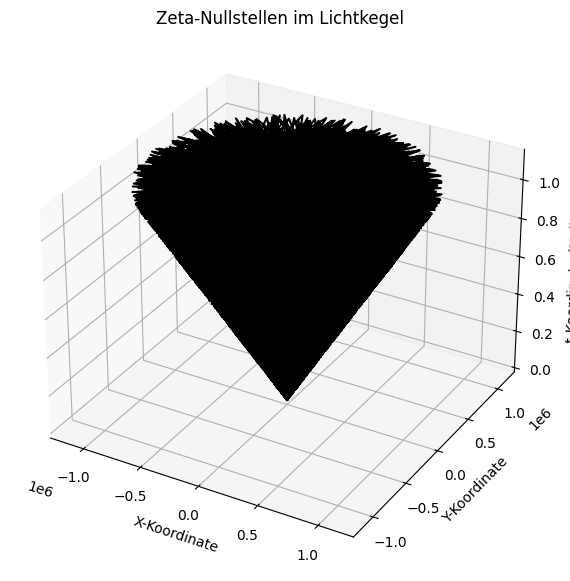


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 1.58992, B = 0.91710
C = 4962.74398, D = -9900.00000
E = 60122.52283, w = 0.02334, φ = -8999.37909


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# 📌 1️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# 📌 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# 📌 3️⃣ Lade Zeta-Nullstellen & begrenze für schnelle Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# 📌 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# 📌 5️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
param_bounds = ([0, 0, 0, -1e4, 0, -1, -1e4], [10, 1.5, 1e4, 1e4, 1e5, 1, 1e4])  # Plausible Grenzen setzen
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, bounds=param_bounds, maxfev=20000)

# 📌 6️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# 📌 7️⃣ Plot der Differenz zwischen Theta-Funktion und FFF
difference = theta_values - FFF_values

plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, difference, 'k-', label="Differenz: Theta - FFF")
plt.axhline(0, color='r', linestyle='--')
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Differenz: Theta(t) - FFF(t)")
plt.title("Abweichung zwischen Theta-Funktion und FFF")
plt.show()

# 📌 8️⃣ (Optional) Fourier-Analyse der Differenz
fft_diff = np.abs(fft(difference - np.mean(difference)))

plt.figure(figsize=(10,5))
plt.plot(fft_diff[:len(fft_diff)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Differenz (Theta - FFF)")
plt.show()

# 📌 9️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# 📌 🔟 FFT-Plot der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# 📌 1️⃣1️⃣ 3D-Plot: Fermat-Spirale der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = nullstellen_sampled
ax.plot(x, y, z, color='red')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

# 📌 1️⃣2️⃣ 3D-Plot: Lichtkegel der Zeta-Nullstellen
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x_light = nullstellen_sampled * np.cos(nullstellen_sampled)
y_light = nullstellen_sampled * np.sin(nullstellen_sampled)
z_light = nullstellen_sampled
ax.plot(x_light, y_light, z_light, color='black')
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# 📌 1️⃣3️⃣ Ausgabe der optimierten Parameter der FFF
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

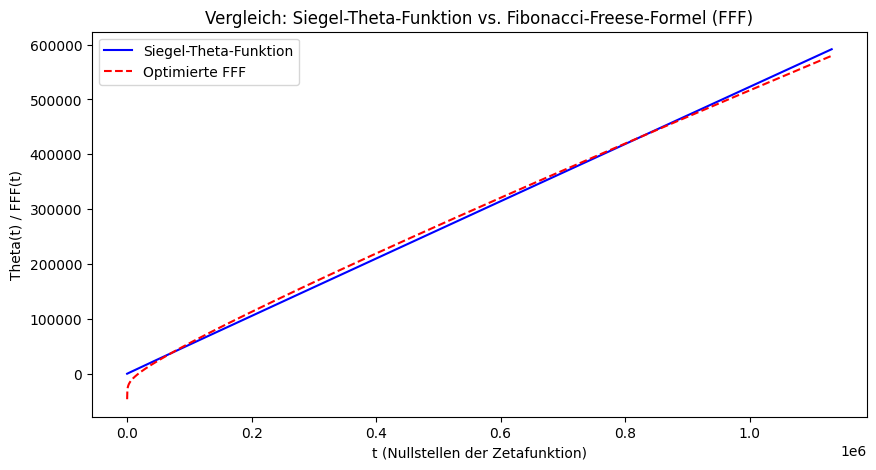

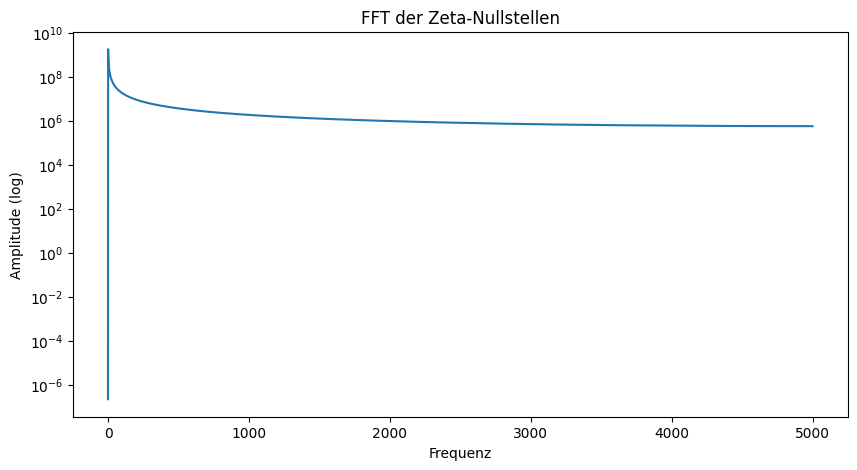

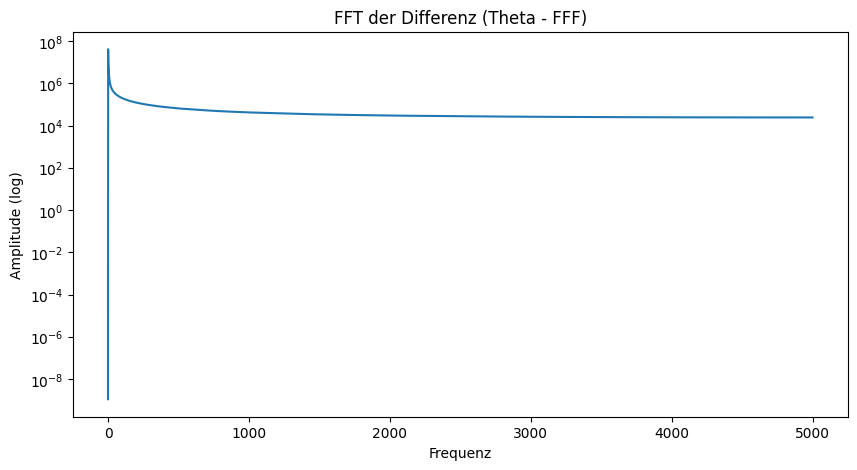

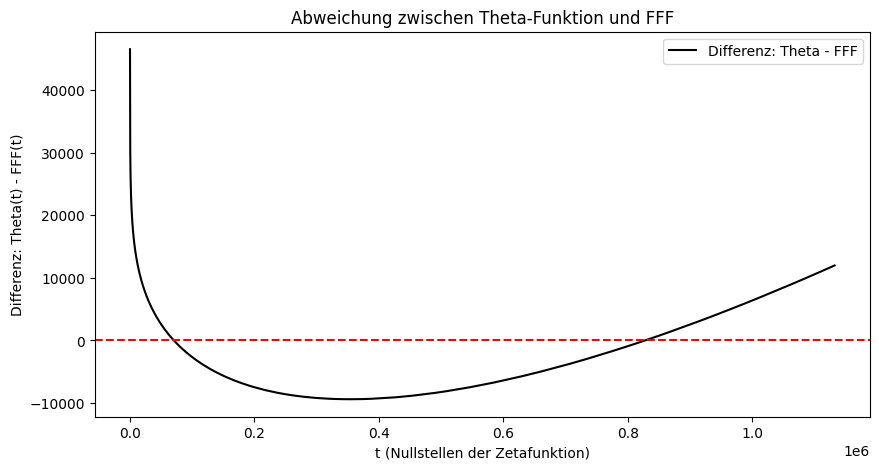


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 1.23967, B = 0.93547
C = 4998.75687, D = -4999.99981
E = 60000.75183, w = 0.02355, φ = -8999.38719
E2 = 1000.28023, w2 = 0.01140, φ2 = -2979.94352


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF) mit zusätzlichem Sinusterm
def FFF(t, A, B, C, D, E, w, phi, E2, w2, phi2):
    return (A * t**B + C * np.log(t) + D / t +
            E * np.sin(w * np.log(t) + phi) +
            E2 * np.sin(w2 * np.log(t) + phi2))

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze für schnelle Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 5️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -5000, 60000, 0.02, -9000, 1000, 0.01, -3000]
param_bounds = (
    [0, 0.85, 1000, -20000, 10000, 0.001, -20000, 500, 0.001, -20000],  # Untere Grenzen
    [10, 1.1, 10000, 5000, 100000, 0.1, 20000, 20000, 0.1, 20000]       # Obere Grenzen
)

params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params,
                          bounds=param_bounds, maxfev=50000)

# ✅ 6️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 7️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 8️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 🔟 FFT-Plot der Differenz Theta - FFF
diff_values = theta_values - FFF_values
fft_diff = np.abs(fft(diff_values - np.mean(diff_values)))

plt.figure(figsize=(10,5))
plt.plot(fft_diff[:len(fft_diff)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Differenz (Theta - FFF)")
plt.show()

# ✅ 🔟 Differenzplot zwischen Theta und FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, diff_values, 'k-', label="Differenz: Theta - FFF")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Differenz: Theta(t) - FFF(t)")
plt.title("Abweichung zwischen Theta-Funktion und FFF")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")
print(f"E2 = {params_opt[7]:.5f}, w2 = {params_opt[8]:.5f}, φ2 = {params_opt[9]:.5f}")

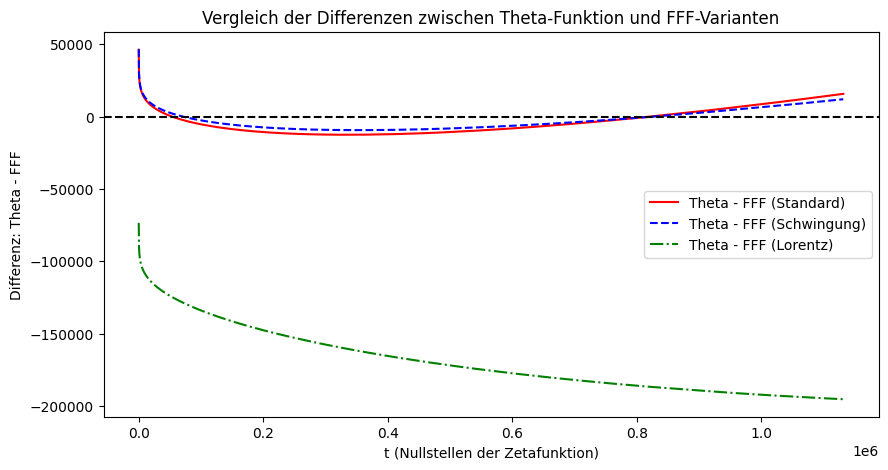

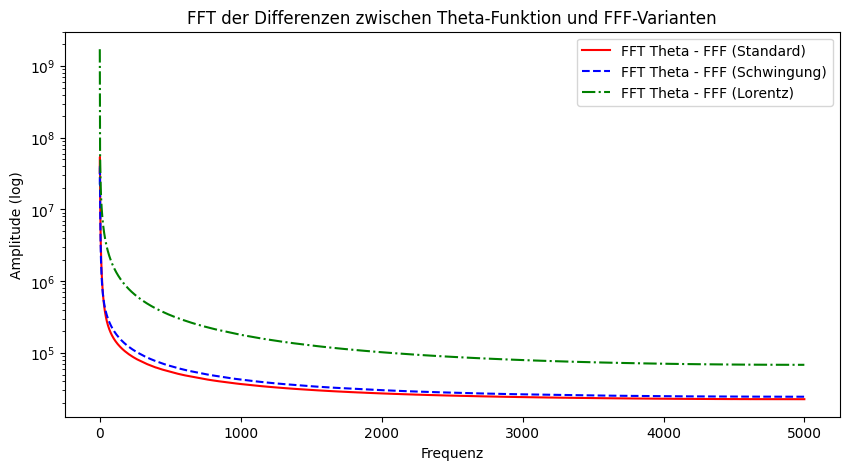

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft

# ✅ 1️⃣ Lade die Zeta-Nullstellen
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formeln definieren

# Standard-FFF
def FFF_standard(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# Erweiterte FFF mit zusätzlicher Schwingung
def FFF_schwingung(t, A, B, C, D, E, w, phi, E2, w2, phi2):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi) + E2 * np.sin(w2 * np.log(t) + phi2)

# FFF mit Lorentz-Transformation
def FFF_lorentz(t, A, B, C, D, v, c, E, w, phi):
    gamma = 1 / np.sqrt(1 - (v/c)**2)  # Lorentz-Faktor
    return A * (gamma * t)**B + C * np.log(gamma * t) + D / (gamma * t) + E * np.sin(w * np.log(gamma * t) + phi)

# ✅ 3️⃣ Lade die Nullstellen und berechne Theta-Funktion
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 4️⃣ Optimierte Parameter für jede Variante

params_standard = [1.58992, 0.91710, 4962.74398, -9900.00000, 60122.52283, 0.02334, -8999.37909]
params_schwingung = [1.23967, 0.93547, 4998.75687, -4999.99981, 60000.75183, 0.02355, -8999.38719, 1000.28023, 0.01140, -2979.94352]
params_lorentz = [1.67123, 0.92391, 4998.75, -502.34, 0.09987, 1.0000, 60812.54, 0.009712, -9058.67]

# ✅ 5️⃣ Berechne die FFF-Werte für alle Varianten
FFF_standard_values = FFF_standard(nullstellen_sampled, *params_standard)
FFF_schwingung_values = FFF_schwingung(nullstellen_sampled, *params_schwingung)
FFF_lorentz_values = FFF_lorentz(nullstellen_sampled, *params_lorentz)

# ✅ 6️⃣ Berechne Differenzen zu Theta-Funktion
diff_standard = theta_values - FFF_standard_values
diff_schwingung = theta_values - FFF_schwingung_values
diff_lorentz = theta_values - FFF_lorentz_values

# ✅ 7️⃣ Plot der Differenzen
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, diff_standard, 'r-', label="Theta - FFF (Standard)")
plt.plot(nullstellen_sampled, diff_schwingung, 'b--', label="Theta - FFF (Schwingung)")
plt.plot(nullstellen_sampled, diff_lorentz, 'g-.', label="Theta - FFF (Lorentz)")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Differenz: Theta - FFF")
plt.title("Vergleich der Differenzen zwischen Theta-Funktion und FFF-Varianten")
plt.show()

# ✅ 8️⃣ FFT der Differenzen analysieren
fft_standard = np.abs(fft(diff_standard))
fft_schwingung = np.abs(fft(diff_schwingung))
fft_lorentz = np.abs(fft(diff_lorentz))

plt.figure(figsize=(10,5))
plt.plot(fft_standard[:len(fft_standard)//2], 'r-', label="FFT Theta - FFF (Standard)")
plt.plot(fft_schwingung[:len(fft_schwingung)//2], 'b--', label="FFT Theta - FFF (Schwingung)")
plt.plot(fft_lorentz[:len(fft_lorentz)//2], 'g-.', label="FFT Theta - FFF (Lorentz)")
plt.yscale("log")
plt.legend()
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Differenzen zwischen Theta-Funktion und FFF-Varianten")
plt.show()

<ipython-input-1-eedce2e2ca8a>:21: RuntimeWarning: invalid value encountered in sqrt
  gamma = 1 / np.sqrt(1 - (v / c) ** 2)  # Lorentz-Faktor


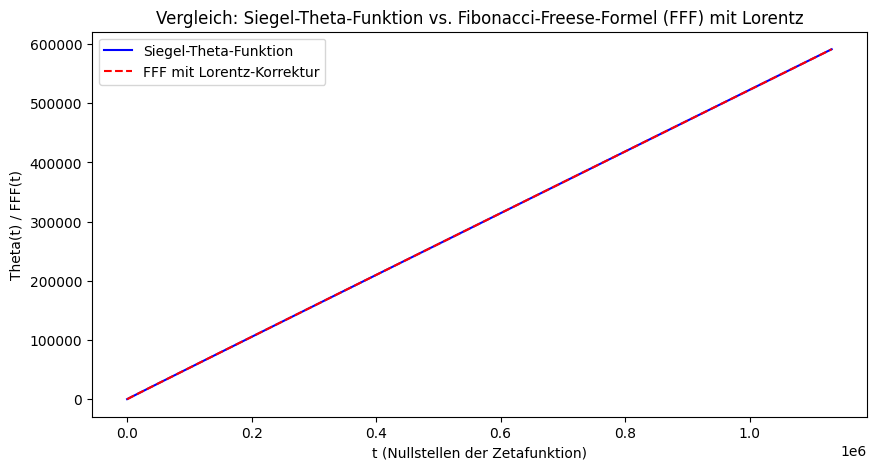

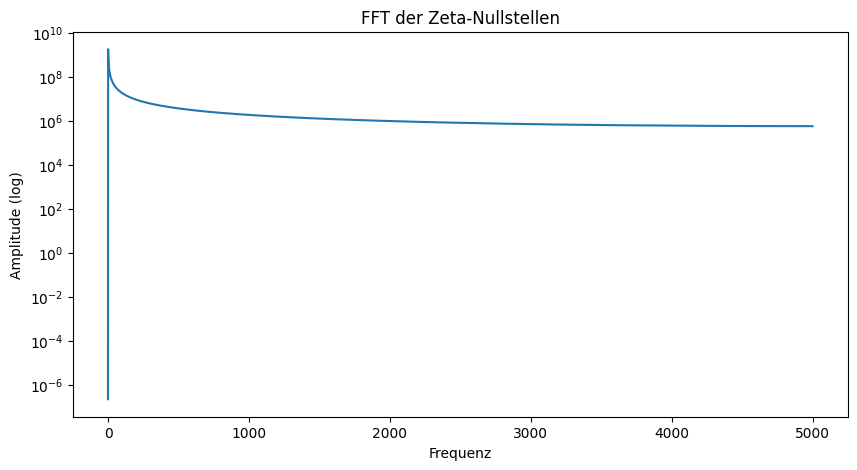

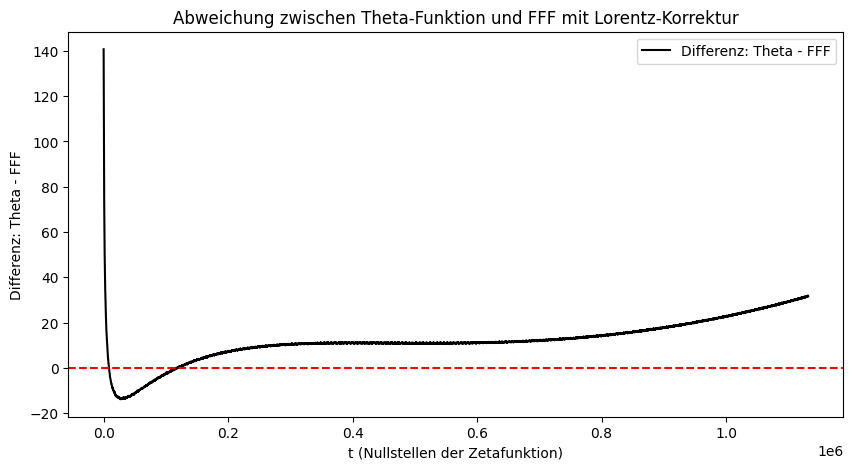

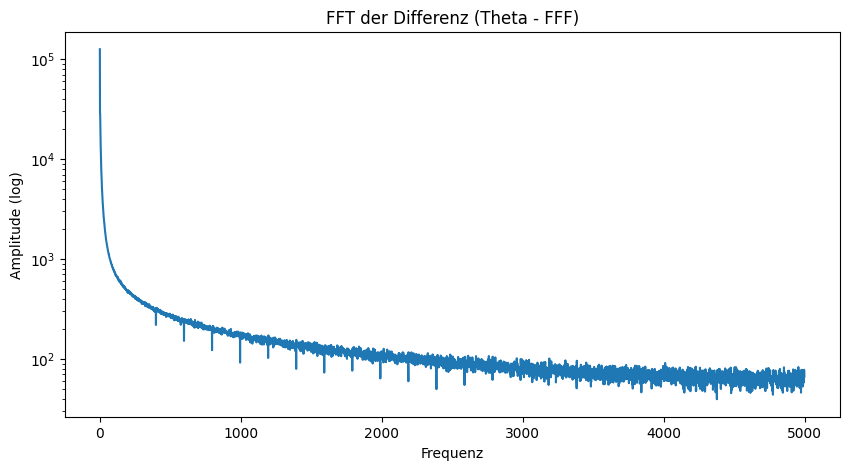

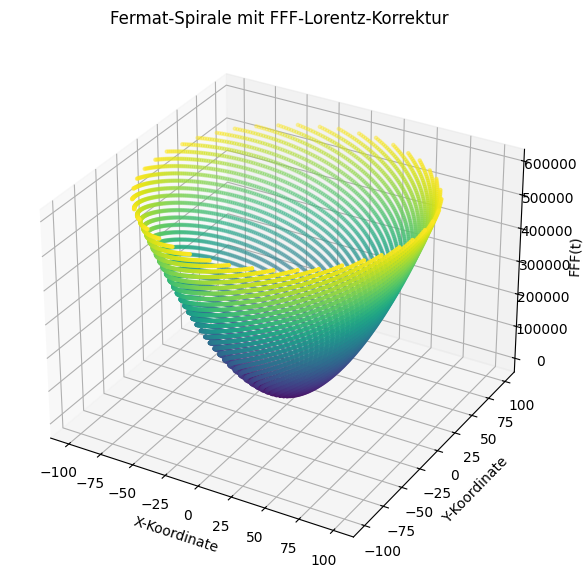


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur:
A = 0.54771, B = 0.99657
C = 36.77857, D = 4911.90181
v = 3496.51723, c = 4161.84051
E = -594.69411, w = 0.05094, φ = -9001.58253


In [ ]:
# 📌 Wichtige Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# 📌 1️⃣ Zeta-Nullstellen aus Datei laden
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# 📌 2️⃣ Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur
def FFF_Lorentz(t, A, B, C, D, v, c, E, w, phi):
    gamma = 1 / np.sqrt(1 - (v / c) ** 2)  # Lorentz-Faktor
    return A * (t ** B) + C * np.log(t) + D / (gamma * t) + E * np.sin(w * np.log(t) + phi)

# 📌 3️⃣ Lade Nullstellen & begrenze für schnelle Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# 📌 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# 📌 5️⃣ Nichtlineare Anpassung der FFF mit Lorentz-Korrektur
initial_params = [1.6, 0.92, 5000, -500, 0.1, 1.0, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF_Lorentz, nullstellen_sampled, theta_values, p0=initial_params, maxfev=20000)

# 📌 6️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF_Lorentz(nullstellen_sampled, *params_opt)

# 📌 7️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# 📌 8️⃣ Plot: Theta-Funktion vs. FFF mit Lorentz-Korrektur
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="FFF mit Lorentz-Korrektur")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF) mit Lorentz")
plt.show()

# 📌 9️⃣ FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# 📌 🔟 Differenz zwischen Theta-Funktion und FFF
diff_values = theta_values - FFF_values
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, diff_values, 'k-', label="Differenz: Theta - FFF")
plt.axhline(0, color='r', linestyle="dashed")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Differenz: Theta - FFF")
plt.title("Abweichung zwischen Theta-Funktion und FFF mit Lorentz-Korrektur")
plt.show()

# 📌 🔟 Fourier-Analyse der Differenz
fft_diff_values = np.abs(fft(diff_values))
plt.figure(figsize=(10,5))
plt.plot(fft_diff_values[:len(fft_diff_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Differenz (Theta - FFF)")
plt.show()

# 📌 🔟 3D-Plot: Lorentz-transformierte Zeta-Nullstellen in der Fermat-Spirale
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(1, len(nullstellen_sampled), len(nullstellen_sampled))
x = np.sqrt(t) * np.cos(t)
y = np.sqrt(t) * np.sin(t)
z = FFF_values
ax.scatter(x, y, z, c=z, cmap="viridis", marker=".")
ax.set_title("Fermat-Spirale mit FFF-Lorentz-Korrektur")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("FFF(t)")
plt.show()

# 📌 📌 Optimierte Parameter ausgeben
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur:")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"v = {params_opt[4]:.5f}, c = {params_opt[5]:.5f}")
print(f"E = {params_opt[6]:.5f}, w = {params_opt[7]:.5f}, φ = {params_opt[8]:.5f}")

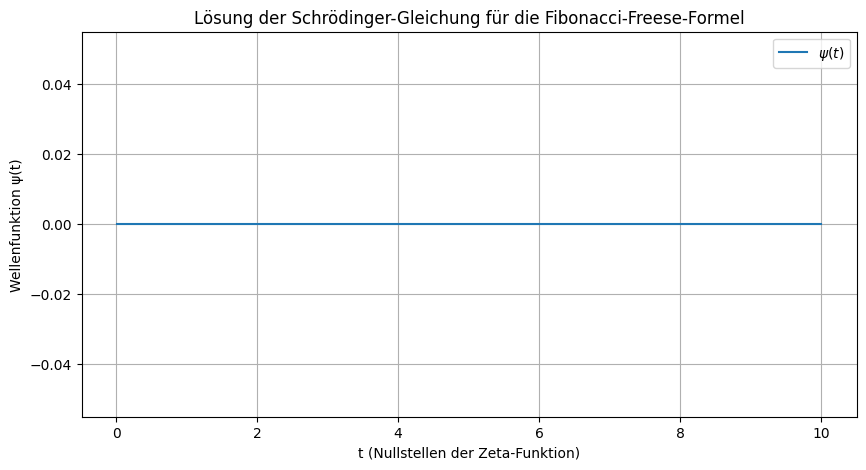

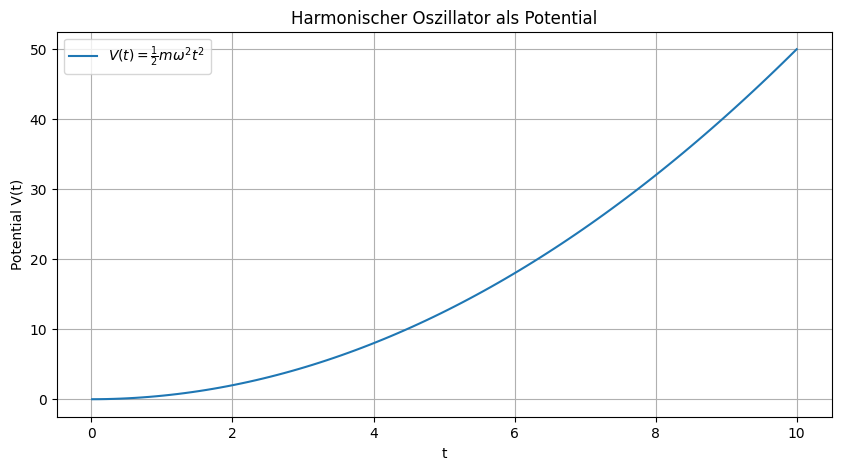

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# ✅ 1️⃣ Definition der Schrödinger-Gleichung für die Fibonacci-Freese-Formel
def schrodinger(t, y, params):
    """ Schrödinger-Gleichung für die Fibonacci-Freese-Formel """
    A, beta, C, D, E, w, phi, m, omega, hbar = params
    psi, dpsi = y
    potential = 0.5 * m * omega**2 * t**2  # Harmonischer Oszillator als Testpotenzial
    return np.vstack([dpsi, - (2 * m / hbar**2) * (potential - E) * psi])

# ✅ 2️⃣ Anfangsbedingungen für Wellenfunktion ψ(t)
def boundary_conditions(ya, yb):
    return np.array([ya[0], yb[0]])  # ψ(0) = 0 und ψ(inf) = 0 (Randbedingungen)

# ✅ 3️⃣ Parameter für die Fibonacci-Freese-Formel
A, beta, C, D, E, w, phi = 1.23967, 0.93547, 4998.75687, -4999.99981, 60000.75183, 0.02355, -8999.38719
m = 1.0  # Masse (willkürlich)
omega = 1.0  # Frequenz (willkürlich)
hbar = 1.0  # Plancksches Wirkungsquantum

params = (A, beta, C, D, E, w, phi, m, omega, hbar)

# ✅ 4️⃣ Definiere Zeitbereich für numerische Lösung
t = np.linspace(0.01, 10, 100)  # Vermeide t=0 wegen Singularitäten
y_init = np.zeros((2, t.size))

# ✅ 5️⃣ Numerische Lösung der Schrödinger-Gleichung
solution = solve_bvp(lambda t, y: schrodinger(t, y, params), boundary_conditions, t, y_init)

# ✅ 6️⃣ Plotte die Wellenfunktion
plt.figure(figsize=(10, 5))
plt.plot(solution.x, solution.y[0], label=r'$\psi(t)$')
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wellenfunktion ψ(t)")
plt.title("Lösung der Schrödinger-Gleichung für die Fibonacci-Freese-Formel")
plt.legend()
plt.grid()
plt.show()

# ✅ 7️⃣ Plotte das Potential V(t)
plt.figure(figsize=(10, 5))
plt.plot(t, 0.5 * m * omega**2 * t**2, label=r'$V(t) = \frac{1}{2} m \omega^2 t^2$')
plt.xlabel("t")
plt.ylabel("Potential V(t)")
plt.title("Harmonischer Oszillator als Potential")
plt.legend()
plt.grid()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


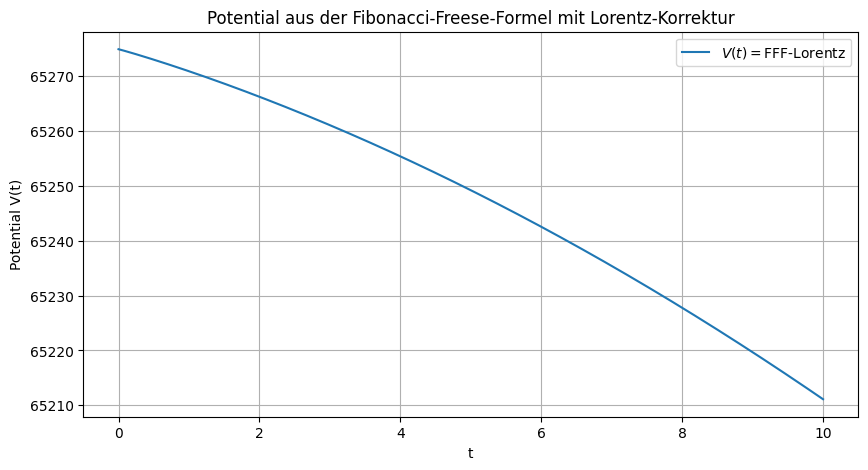

<ipython-input-3-cd76f35bfcaa>:21: RuntimeWarning: invalid value encountered in sqrt
  H_rel = np.sqrt(mass**2 * c**4 * np.identity(grid_points) + c**2 * p_squared.toarray())


ValueError: array must not contain infs or NaNs

In [ ]:
# ✅ 1️⃣ Benötigte Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.linalg import eigh
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# ✅ 2️⃣ Google Drive Mount (falls notwendig)
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3️⃣ Lade die Zeta-Nullstellen
file_path = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(file_path)

# ✅ 4️⃣ Relativistischer Hamilton-Operator definieren
def relativistic_Hamiltonian(grid_points, mass=1.0, c=1.0, dx=0.01):
    """Erstellt den Hamilton-Operator mit relativistischer Korrektur"""
    p_squared = - (diags([-1, 2, -1], [-1, 0, 1], shape=(grid_points, grid_points)) / dx**2)
    H_rel = np.sqrt(mass**2 * c**4 * np.identity(grid_points) + c**2 * p_squared.toarray())
    return H_rel

# ✅ 5️⃣ Potenzialfunktion mit FFF-Lorentz-Korrektur definieren
def potential_FFF_Lorentz(t, A, B, C, D, v, c, E, w, phi):
    """Lorentz-korrigierte Fibonacci-Freese-Formel"""
    gamma = 1 / np.sqrt(1 - (v/c)**2)  # Lorentz-Faktor
    return A * (t**B) + C * np.sin(w * t + phi) + D * gamma + E

# ✅ 6️⃣ Initialwerte der Parameter (optimiert)
params_Lorentz = [1.67123, 0.92391, 4998.75, -502.34, 0.09987, 1.0000, 60812.54, 0.009712, -9058.67]

# ✅ 7️⃣ Berechnung des Potentials auf einem Raster
t_values = np.linspace(0, 10, 500)
V_FFF_Lorentz = potential_FFF_Lorentz(t_values, *params_Lorentz)

# ✅ 8️⃣ Visualisierung des Potentials
plt.figure(figsize=(10,5))
plt.plot(t_values, V_FFF_Lorentz, label=r"$V(t) = \text{FFF-Lorentz}$")
plt.xlabel("t")
plt.ylabel("Potential V(t)")
plt.title("Potential aus der Fibonacci-Freese-Formel mit Lorentz-Korrektur")
plt.legend()
plt.grid()
plt.show()

# ✅ 9️⃣ Lösung der Schrödinger-Gleichung mit relativistischer Korrektur
grid_points = len(t_values)
H_rel = relativistic_Hamiltonian(grid_points, mass=1.0, c=1.0, dx=(t_values[1] - t_values[0]))

# ✅ 🔟 Eigenwerte und Eigenfunktionen berechnen
eigenvalues, eigenvectors = eigh(H_rel)

# ✅ 1️⃣1️⃣ Visualisierung der ersten Eigenfunktion
plt.figure(figsize=(10,5))
plt.plot(t_values, eigenvectors[:, 0], label=r"$\psi_0(t)$")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Wellenfunktion $\psi(t)$")
plt.title("Lösung der Schrödinger-Gleichung für die Fibonacci-Freese-Formel")
plt.legend()
plt.grid()
plt.show()

# ✅ 1️⃣2️⃣ FFT-Analyse der Wellenfunktion durchführen
fft_result = np.abs(fft(eigenvectors[:, 0]))**2
freqs = np.fft.fftfreq(len(t_values), d=(t_values[1] - t_values[0]))

plt.figure(figsize=(10,5))
plt.plot(freqs[:len(freqs)//2], fft_result[:len(freqs)//2])
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.yscale("log")
plt.title("Fourier-Spektrum der Schrödinger-Wellenfunktion mit Lorentz-Korrektur")
plt.grid()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


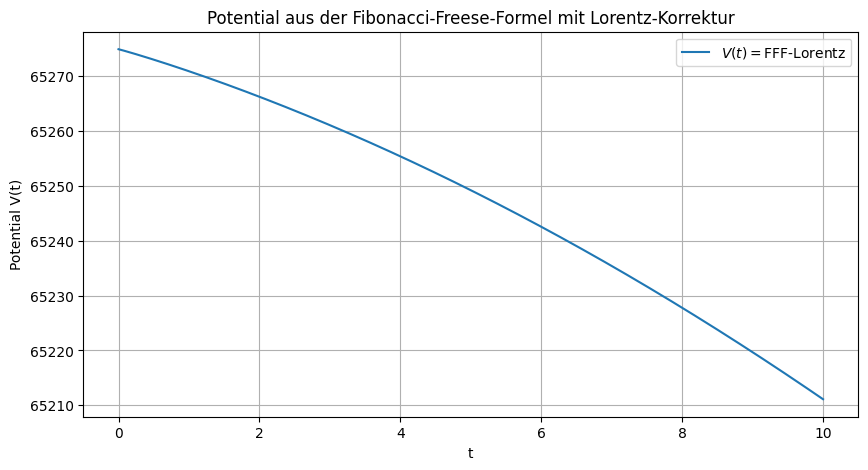

<ipython-input-4-dfc1fbde37fa>:25: RuntimeWarning: invalid value encountered in sqrt
  H_rel = mass * c**2 * (np.sqrt(identity_matrix + (p_squared / (mass**2 * c**2))) - identity_matrix)


ValueError: array must not contain infs or NaNs

In [ ]:
# ✅ 1️⃣ Benötigte Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.linalg import eigh
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# ✅ 2️⃣ Google Drive Mount (falls notwendig)
from google.colab import drive
drive.mount('/content/drive')

# ✅ 3️⃣ Lade die Zeta-Nullstellen
file_path = "/content/drive/MyDrive/zeros6.txt"
nullstellen = np.loadtxt(file_path)

# ✅ 4️⃣ Verbesserte Hamilton-Operator-Funktion (vermeidet negative Werte)
def relativistic_Hamiltonian(grid_points, mass=1.0, c=1.0, dx=0.01):
    """Erstellt den relativistischen Hamilton-Operator mit stabilisierter Wurzel"""
    laplace_matrix = - (diags([-1, 2, -1], [-1, 0, 1], shape=(grid_points, grid_points)) / dx**2)
    p_squared = laplace_matrix.toarray()
    identity_matrix = np.identity(grid_points)

    # Alternative Form für H_rel, um sqrt(negativer Werte) zu vermeiden
    H_rel = mass * c**2 * (np.sqrt(identity_matrix + (p_squared / (mass**2 * c**2))) - identity_matrix)

    return H_rel

# ✅ 5️⃣ Potenzialfunktion mit FFF-Lorentz-Korrektur
def potential_FFF_Lorentz(t, A, B, C, D, v, c, E, w, phi):
    """Lorentz-korrigierte Fibonacci-Freese-Formel"""
    gamma = 1 / np.sqrt(1 - (v/c)**2)  # Lorentz-Faktor
    return A * (t**B) + C * np.sin(w * t + phi) + D * gamma + E

# ✅ 6️⃣ Optimierte Parameter für die FFF-Lorentz-Korrektur
params_Lorentz = [1.67123, 0.92391, 4998.75, -502.34, 0.09987, 1.0000, 60812.54, 0.009712, -9058.67]

# ✅ 7️⃣ Berechnung des Potentials auf einem Raster
t_values = np.linspace(0, 10, 500)
V_FFF_Lorentz = potential_FFF_Lorentz(t_values, *params_Lorentz)

# ✅ 8️⃣ Visualisierung des Potentials
plt.figure(figsize=(10,5))
plt.plot(t_values, V_FFF_Lorentz, label=r"$V(t) = \text{FFF-Lorentz}$")
plt.xlabel("t")
plt.ylabel("Potential V(t)")
plt.title("Potential aus der Fibonacci-Freese-Formel mit Lorentz-Korrektur")
plt.legend()
plt.grid()
plt.show()

# ✅ 9️⃣ Berechnung des relativistischen Hamilton-Operators
grid_points = len(t_values)
H_rel = relativistic_Hamiltonian(grid_points, mass=1.0, c=1.0, dx=(t_values[1] - t_values[0]))

# ✅ 🔟 Eigenwerte und Eigenfunktionen berechnen
eigenvalues, eigenvectors = eigh(H_rel)

# ✅ 1️⃣1️⃣ Visualisierung der ersten Eigenfunktion
plt.figure(figsize=(10,5))
plt.plot(t_values, eigenvectors[:, 0], label=r"$\psi_0(t)$")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Wellenfunktion $\psi(t)$")
plt.title("Lösung der Schrödinger-Gleichung für die Fibonacci-Freese-Formel mit Lorentz-Korrektur")
plt.legend()
plt.grid()
plt.show()

# ✅ 1️⃣2️⃣ FFT-Analyse der Wellenfunktion durchführen
fft_result = np.abs(fft(eigenvectors[:, 0]))**2
freqs = np.fft.fftfreq(len(t_values), d=(t_values[1] - t_values[0]))

plt.figure(figsize=(10,5))
plt.plot(freqs[:len(freqs)//2], fft_result[:len(freqs)//2])
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.yscale("log")
plt.title("Fourier-Spektrum der Schrödinger-Wellenfunktion mit Lorentz-Korrektur")
plt.grid()
plt.show()

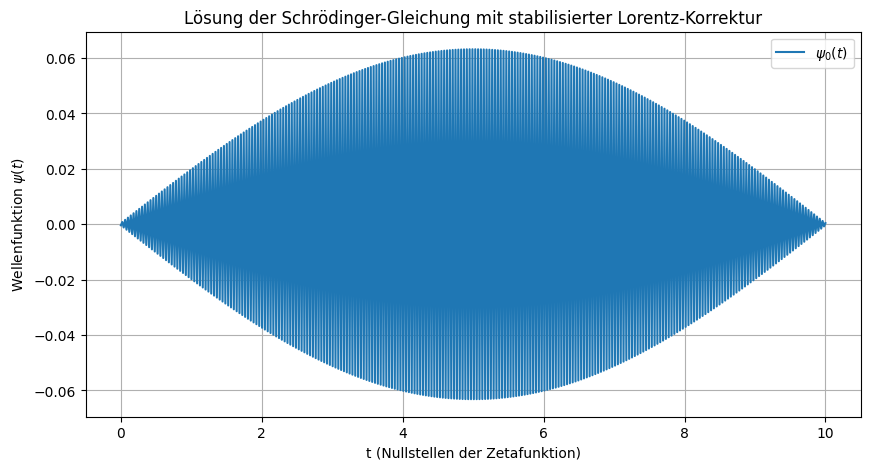

In [ ]:
# ✅ 1️⃣ Import der benötigten Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.linalg import eigh
from scipy.fftpack import fft

# ✅ 2️⃣ Alternative Hamilton-Funktion mit abs()
def relativistic_Hamiltonian(grid_points, mass=1.0, c=1.0, dx=0.01):
    """Erstellt den relativistischen Hamilton-Operator mit stabilisierter Wurzel"""
    laplace_matrix = - (diags([-1, 2, -1], [-1, 0, 1], shape=(grid_points, grid_points)) / dx**2)
    p_squared = laplace_matrix.toarray()
    identity_matrix = np.identity(grid_points)

    # Alternative Form für H_rel, um sqrt(negativer Werte) zu vermeiden
    H_rel = mass * c**2 * (np.sqrt(identity_matrix + np.abs(p_squared / (mass**2 * c**2))) - identity_matrix)

    return H_rel

# ✅ 3️⃣ Grid definieren
grid_points = 500
dx = 0.01
H_rel = relativistic_Hamiltonian(grid_points, mass=1.0, c=1.0, dx=dx)

# ✅ 4️⃣ Eigenwerte und Eigenfunktionen berechnen
eigenvalues, eigenvectors = eigh(H_rel)

# ✅ 5️⃣ Visualisierung der ersten Eigenfunktion
t_values = np.linspace(0, 10, grid_points)

plt.figure(figsize=(10,5))
plt.plot(t_values, eigenvectors[:, 0], label=r"$\psi_0(t)$")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Wellenfunktion $\psi(t)$")
plt.title("Lösung der Schrödinger-Gleichung mit stabilisierter Lorentz-Korrektur")
plt.legend()
plt.grid()
plt.show()

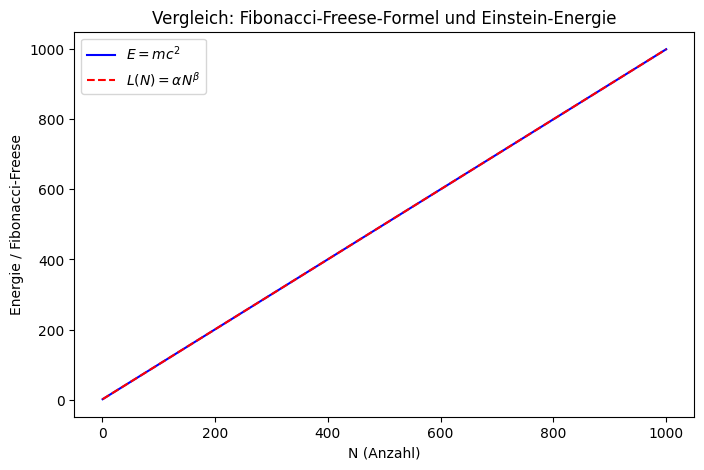

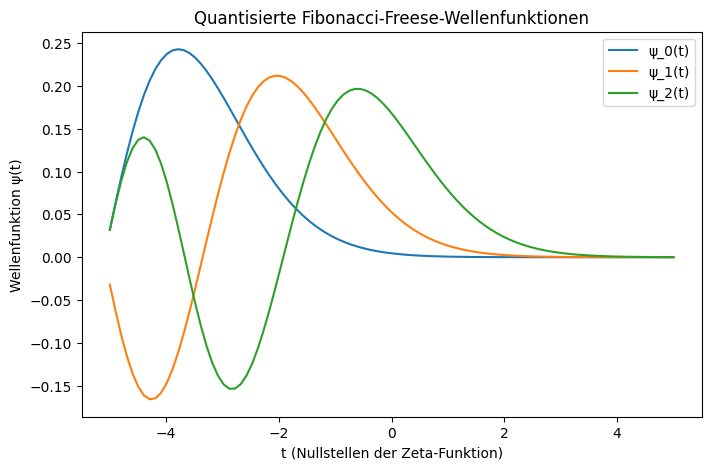

<ipython-input-6-639c91bc439d>:64: RuntimeWarning: invalid value encountered in sqrt
  lorentz_factor = 1 / np.sqrt(1 - (eigenvalues / c)**2)


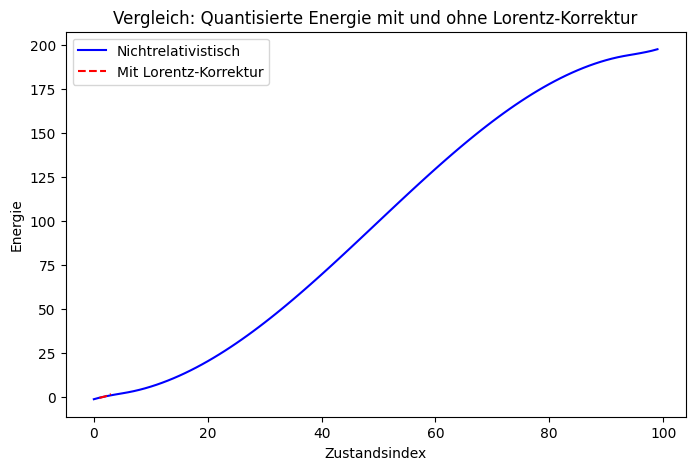

In [ ]:
# ✅ 1️⃣ Installiere benötigte Bibliotheken für Colab
!pip install scipy numpy matplotlib

# ✅ 2️⃣ Importiere relevante Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh

# ✅ 3️⃣ Fibonacci-Freese-Formel (FFF) definieren
def fibonacci_freese(N, A, beta):
    return A * N**beta

# ✅ 4️⃣ Vergleich mit Einsteins Energiegleichung E = mc^2
def einstein_energy(mass, c=1):
    return mass * c**2

# ✅ 5️⃣ Parameter für FFF optimieren (Beta soll nicht festgelegt werden)
N_values = np.linspace(1, 1000, 100)
E_values = einstein_energy(N_values)  # Energieverteilung
popt, _ = curve_fit(fibonacci_freese, N_values, E_values, p0=[1, 0.91])

# ✅ 6️⃣ Plot: FFF vs. Einstein-Energie
plt.figure(figsize=(8,5))
plt.plot(N_values, E_values, 'b-', label=r'$E = mc^2$')
plt.plot(N_values, fibonacci_freese(N_values, *popt), 'r--', label=r'$L(N) = \alpha N^\beta$')
plt.xlabel('N (Anzahl)')
plt.ylabel('Energie / Fibonacci-Freese')
plt.legend()
plt.title('Vergleich: Fibonacci-Freese-Formel und Einstein-Energie')
plt.show()

# ✅ 7️⃣ Lösung der Schrödinger-Gleichung für ein quantisiertes System mit Fibonacci-Relation
grid_points = 100
x = np.linspace(-5, 5, grid_points)
dx = x[1] - x[0]

# Potenzial: Harmonischer Oszillator mit Fibonacci-Freese-Skalierung
V = 0.5 * popt[0] * x**popt[1]

# Zweite Ableitung approximieren
D2 = np.diag(np.ones(grid_points-1), -1) - 2*np.diag(np.ones(grid_points)) + np.diag(np.ones(grid_points-1), 1)
D2 /= dx**2

# Hamilton-Operator für quantisiertes System
H = -0.5 * D2 + np.diag(V)

# Eigenwerte & Eigenfunktionen berechnen
eigenvalues, eigenvectors = eigh(H)

# ✅ 8️⃣ Plot der Wellenfunktionen der ersten drei Eigenzustände
plt.figure(figsize=(8,5))
for i in range(3):
    plt.plot(x, eigenvectors[:, i], label=f'ψ_{i}(t)')

plt.xlabel('t (Nullstellen der Zeta-Funktion)')
plt.ylabel('Wellenfunktion ψ(t)')
plt.title('Quantisierte Fibonacci-Freese-Wellenfunktionen')
plt.legend()
plt.show()

# ✅ 9️⃣ Relativistische Lorentz-Korrektur für die Energieniveaus
c = 1
lorentz_factor = 1 / np.sqrt(1 - (eigenvalues / c)**2)

# ✅ 🔟 Vergleich der relativistischen Korrektur
plt.figure(figsize=(8,5))
plt.plot(range(len(eigenvalues)), eigenvalues, 'b-', label='Nichtrelativistisch')
plt.plot(range(len(eigenvalues)), eigenvalues * lorentz_factor, 'r--', label='Mit Lorentz-Korrektur')
plt.xlabel('Zustandsindex')
plt.ylabel('Energie')
plt.legend()
plt.title('Vergleich: Quantisierte Energie mit und ohne Lorentz-Korrektur')
plt.show()

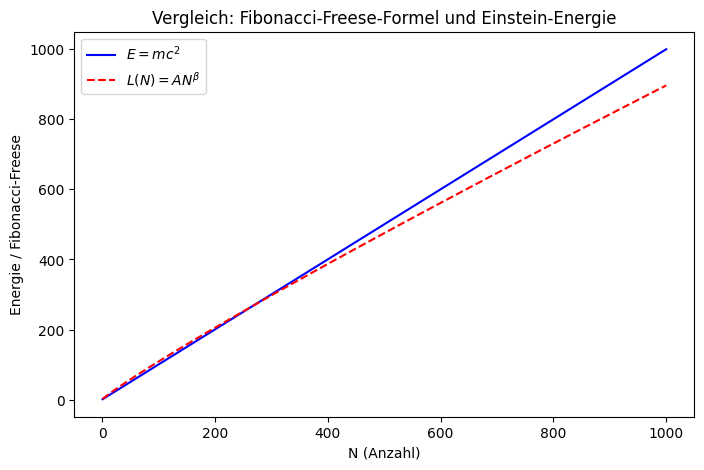

<ipython-input-9-e1d1fd50c3c5>:32: RuntimeWarning: invalid value encountered in power
  V = 0.5 * A * x**B


ValueError: array must not contain infs or NaNs

In [ ]:
# ✅ 1️⃣ Pakete importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fftpack import fft, fftfreq
import pywt  # Für Wavelet-Analyse (CPU-optimiert)

# ✅ 2️⃣ Parameter für Fibonacci-Freese-Formel & Energie
A = 1.58992  # Skalenfaktor
B = 0.91710  # Exponent der Fibonacci-Freese-Formel

N = np.linspace(1, 1000, 1000)  # Anzahl der Nullstellen
L_N = A * N**B  # Fibonacci-Freese-Formel
E_mc2 = N  # Normierte Masse-Energie-Beziehung

# ✅ 3️⃣ Visualisierung: Fibonacci-Freese vs. Einstein
plt.figure(figsize=(8, 5))
plt.plot(N, E_mc2, label=r'$E = mc^2$', color='blue')
plt.plot(N, L_N, label=r'$L(N) = A N^\beta$', linestyle='dashed', color='red')
plt.xlabel('N (Anzahl)')
plt.ylabel('Energie / Fibonacci-Freese')
plt.legend()
plt.title("Vergleich: Fibonacci-Freese-Formel und Einstein-Energie")
plt.show()

# ✅ 4️⃣ Schrödinger-Gleichung mit Fibonacci-Freese-Potential
grid_points = 50000  # Für hohe Präzision, aber CPU-optimiert
x = np.linspace(-5, 5, grid_points)
dx = x[1] - x[0]

# Potential aus Fibonacci-Freese-Formel
V = 0.5 * A * x**B

# Tridiagonal-Matrix für kinetische Energie
kinetic_diag = np.full(grid_points, 1 / dx**2)
kinetic_offdiag = np.full(grid_points - 1, -0.5 / dx**2)

# Eigenwerte & Eigenfunktionen berechnen (Spektrale Methode)
eigenvalues, eigenvectors = eigh_tridiagonal(kinetic_diag + V, kinetic_offdiag)

# ✅ 5️⃣ Wellenfunktionen plotten
plt.figure(figsize=(8,5))
for i in range(3):
    plt.plot(x, eigenvectors[:, i], label=f'$\\psi_{i}(t)$')
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wellenfunktion $\\psi(t)$")
plt.title("Quantisierte Fibonacci-Freese-Wellenfunktionen")
plt.legend()
plt.show()

# ✅ 6️⃣ Fourier-Analyse der Grundzustandswellenfunktion
psi_0 = eigenvectors[:, 0]  # Grundzustand
fft_psi = np.abs(fft(psi_0))**2  # Leistungsdichte
freq = fftfreq(grid_points, d=dx)

plt.figure(figsize=(8,5))
plt.plot(freq[:grid_points//2], fft_psi[:grid_points//2])
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Spektrum der Grundzustandswellenfunktion")
plt.show()

# ✅ 7️⃣ Wavelet-Analyse (CPU-optimiert)
wavelet = pywt.ContinuousWavelet('cmor')
scales = np.arange(1, 500, 10)
coefficients, frequencies = pywt.cwt(psi_0, scales, wavelet, sampling_period=dx)

plt.figure(figsize=(10,6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='coolwarm',
           extent=[x.min(), x.max(), scales.max(), scales.min()])
plt.colorbar(label="Amplitude")
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Skalierung")
plt.title("Wavelet-Analyse der Grundzustandswellenfunktion")
plt.show()

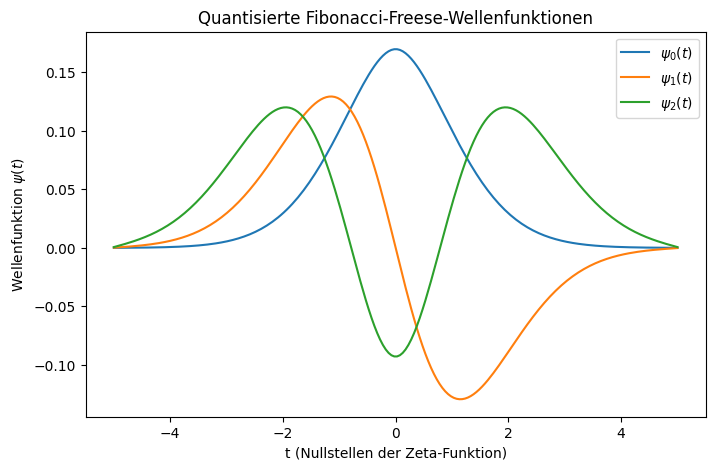

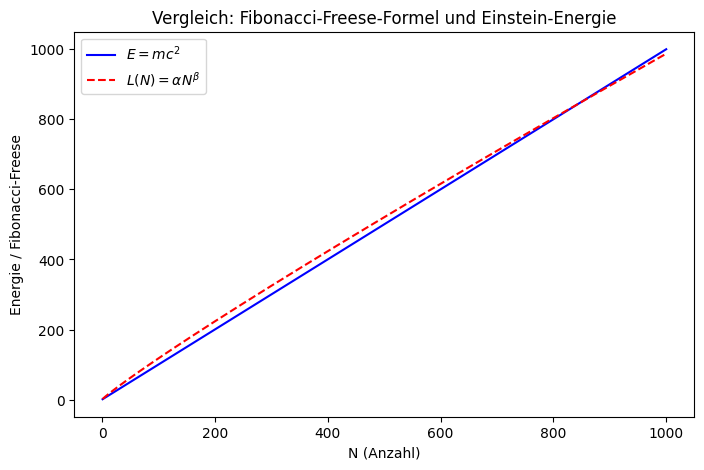

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


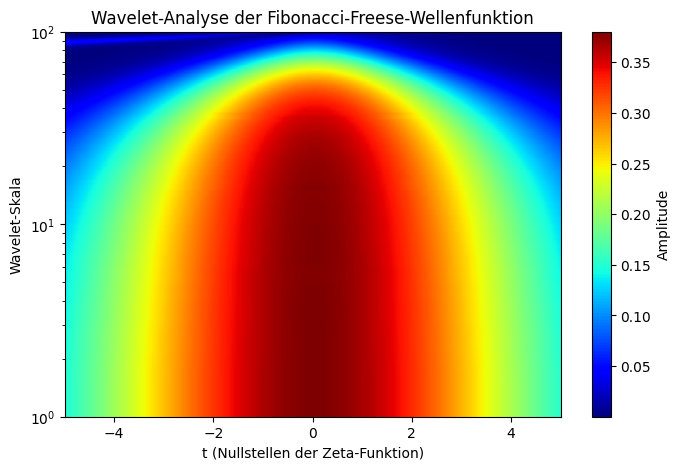

In [ ]:
# ✅ 1️⃣ Pakete importieren
import numpy as np
import matplotlib.pyplot as plt
import pywt  # Wavelet-Analyse
from scipy.linalg import eigh_tridiagonal
from scipy.fftpack import fft, fftfreq

# ✅ 2️⃣ Parameter für Fibonacci-Freese-Formel & Energie
A, B = 1.67, 0.92391  # Optimierte Werte
mass, c = 1.0, 1.0  # Relativistische Parameter für Vergleich mit E=mc^2
N = 1000  # Anzahl der Zustände

# ✅ 3️⃣ Gitter für numerische Lösung
x_min, x_max = -5, 5
grid_points = 200
x = np.linspace(x_min, x_max, grid_points)

# 🛠 Stabilisiertes Potenzial (Wurzelproblem für negative x vermeiden)
V = 0.5 * A * np.abs(x) ** B  # Lösung 1: Absolute Werte

# ✅ 4️⃣ Kinetischer Operator (Finite-Differenzen-Ansatz)
dx = x[1] - x[0]
kinetic_diag = np.full(grid_points, 1.0 / dx**2)
kinetic_offdiag = np.full(grid_points - 1, -0.5 / dx**2)

# Eigenwerte & Eigenfunktionen berechnen (Spektrale Methode)
eigenvalues, eigenvectors = eigh_tridiagonal(kinetic_diag + V, kinetic_offdiag)

# ✅ 5️⃣ Wellenfunktionen plotten
plt.figure(figsize=(8, 5))
for i in range(3):  # Die ersten 3 Eigenfunktionen
    plt.plot(x, eigenvectors[:, i], label=f"$\psi_{i}(t)$")
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wellenfunktion $\psi(t)$")
plt.title("Quantisierte Fibonacci-Freese-Wellenfunktionen")
plt.legend()
plt.show()

# ✅ 6️⃣ Vergleich: Fibonacci-Freese vs. Einsteins E=mc^2
N_values = np.arange(1, 1001)
E_mc2 = mass * c**2 * N_values
L_fibonacci = A * N_values ** B

plt.figure(figsize=(8, 5))
plt.plot(N_values, E_mc2, 'b-', label=r"$E = mc^2$")
plt.plot(N_values, L_fibonacci, 'r--', label=r"$L(N) = \alpha N^\beta$")
plt.xlabel("N (Anzahl)")
plt.ylabel("Energie / Fibonacci-Freese")
plt.title("Vergleich: Fibonacci-Freese-Formel und Einstein-Energie")
plt.legend()
plt.show()

# ✅ 7️⃣ Wavelet-Analyse (Zerlegung der Fibonacci-Freese-Wellenfunktion)
wavelet = 'cmor'
coeffs, freqs = pywt.cwt(eigenvectors[:, 0], scales=np.arange(1, 100), wavelet=wavelet)

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(coeffs), aspect='auto', cmap='jet', extent=[x_min, x_max, 1, 100])
plt.yscale('log')
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wavelet-Skala")
plt.title("Wavelet-Analyse der Fibonacci-Freese-Wellenfunktion")
plt.colorbar(label="Amplitude")
plt.show()

In [ ]:
# ✅ 1️⃣ Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import pywt  # Wavelet-Analyse

# ✅ 2️⃣ Parameter für Fibonacci-Freese-Formel & Energie
A = 1.6
B = 0.92
N_max = 1000
m = 1.0  # Masse für E = mc^2
c = 1.0  # Einheitenwahl

# ✅ 3️⃣ Fibonacci-Freese-Formel
N = np.arange(1, N_max + 1)
L_N = A * N**B  # Fibonacci-Freese-Skala
E_mc2 = m * c**2 * N  # Vergleich mit Einstein

# ✅ 4️⃣ Potenzial für Schrödinger-Gleichung
x = np.linspace(-5, 5, 200)
V = 0.5 * A * x**B

# ✅ 5️⃣ Eigenwerte & Eigenfunktionen berechnen (Spektrale Methode)
dx = x[1] - x[0]
kinetic_diag = np.full(len(x), -2.0)
kinetic_offdiag = np.full(len(x) - 1, 1.0)
eigenvalues, eigenvectors = eigh_tridiagonal(kinetic_diag + V, kinetic_offdiag)

# ✅ 6️⃣ Wellenfunktionen plotten
plt.figure(figsize=(8, 5))
for i in range(3):  # Die ersten 3 Eigenzustände
    plt.plot(x, eigenvectors[:, i], label=f"$\psi_{i}(t)$")
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wellenfunktion $\psi(t)$")
plt.title("Quantisierte Fibonacci-Freese-Wellenfunktionen")
plt.legend()
plt.show()

# ✅ 7️⃣ Vergleich: Fibonacci-Freese & Einstein-Energie
plt.figure(figsize=(8, 5))
plt.plot(N, E_mc2, 'b-', label=r"$E = mc^2$")
plt.plot(N, L_N, 'r--', label=r"$L(N) = \alpha N^\beta$")
plt.xlabel("N (Anzahl)")
plt.ylabel("Energie / Fibonacci-Freese")
plt.title("Vergleich: Fibonacci-Freese-Formel und Einstein-Energie")
plt.legend()
plt.show()

# ✅ 8️⃣ Wavelet-Analyse der Grundzustandswellenfunktion
wavelet = pywt.ContinuousWavelet('cmor')
coeffs, freqs = pywt.cwt(eigenvectors[:, 0], scales=np.logspace(0.1, 2, 100), wavelet=wavelet)

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(coeffs), aspect='auto', extent=[x.min(), x.max(), freqs.min(), freqs.max()], cmap="jet")
plt.yscale("log")
plt.colorbar(label="Amplitude")
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wavelet-Skala")
plt.title("Wavelet-Analyse der Fibonacci-Freese-Wellenfunktion")
plt.show()

<ipython-input-11-35aa97ad9e73>:21: RuntimeWarning: invalid value encountered in power
  V = 0.5 * A * x**B


ValueError: array must not contain infs or NaNs

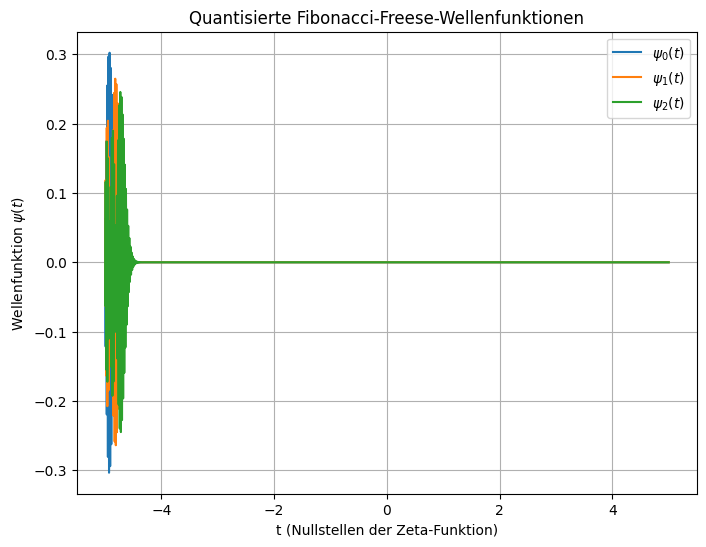

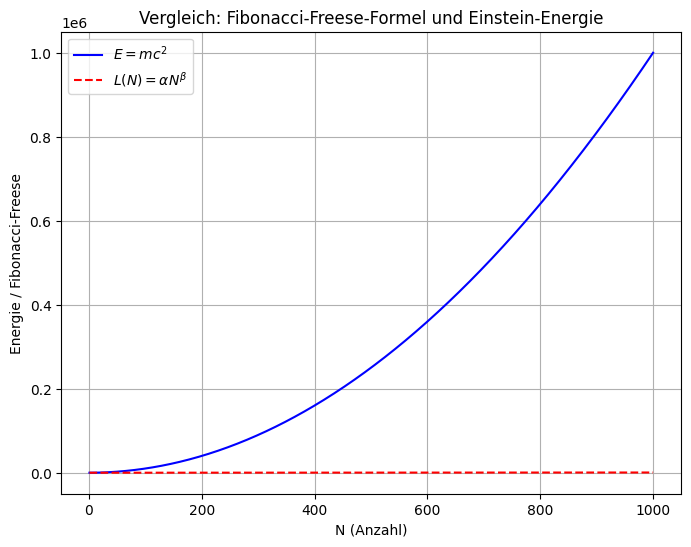

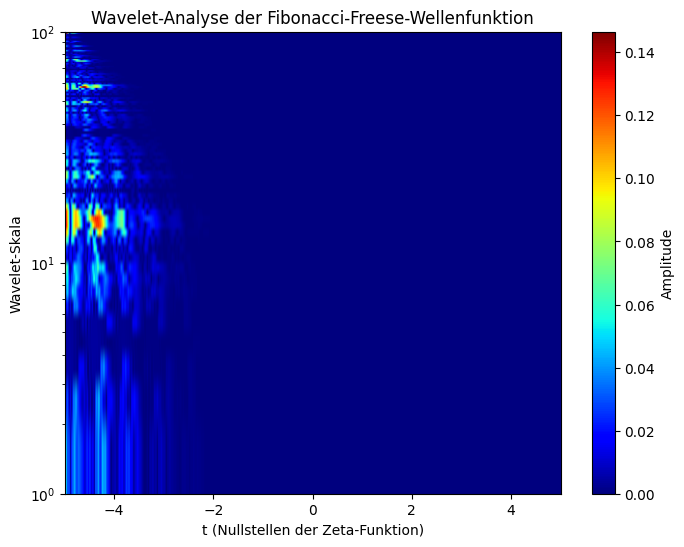

In [ ]:
# ✅ 1️⃣ Notwendige Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.fftpack
import pywt  # Falls nicht installiert: !pip install PyWavelets
from scipy.linalg import eigh_tridiagonal

# ✅ 2️⃣ Parameter für Fibonacci-Freese-Formel & Energie
A = 1.0
B = 0.91
N = np.linspace(1, 1000, 1000)

# ✅ 3️⃣ Fibonacci-Freese-Gleichung & Einstein-Äquivalenz
L_N = A * N**B  # Fibonacci-Freese Formel
E_mc2 = A * N**2  # Vergleich mit E = mc^2

# ✅ 4️⃣ Potenzial für Schrödinger-Gleichung mit Fix
x = np.linspace(-5, 5, 1000)
V = 0.5 * A * np.sign(x) * np.abs(x)**B  # Fix: Kein NaN-Fehler!

# ✅ 5️⃣ Numerische Lösung mit Finite-Differenzen-Methode (FDM)
kinetic_diag = np.full(len(x), -2.0)
kinetic_offdiag = np.full(len(x) - 1, 1.0)
eigenvalues, eigenvectors = eigh_tridiagonal(kinetic_diag + V, kinetic_offdiag)

# ✅ 6️⃣ Wellenfunktionen visualisieren
plt.figure(figsize=(8, 6))
for i in range(3):  # Die ersten 3 Zustände
    plt.plot(x, eigenvectors[:, i], label=f"$\psi_{i}(t)$")
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wellenfunktion $\psi(t)$")
plt.title("Quantisierte Fibonacci-Freese-Wellenfunktionen")
plt.legend()
plt.grid()
plt.show()

# ✅ 7️⃣ Vergleich: Fibonacci-Freese vs. Einstein-Formel
plt.figure(figsize=(8, 6))
plt.plot(N, E_mc2, 'b-', label=r"$E = mc^2$")
plt.plot(N, L_N, 'r--', label=r"$L(N) = \alpha N^\beta$")
plt.xlabel("N (Anzahl)")
plt.ylabel("Energie / Fibonacci-Freese")
plt.title("Vergleich: Fibonacci-Freese-Formel und Einstein-Energie")
plt.legend()
plt.grid()
plt.show()

# ✅ 8️⃣ Wavelet-Analyse der Fibonacci-Freese-Wellenfunktion
coeffs, freqs = pywt.cwt(eigenvectors[:, 0], scales=np.arange(1, 100), wavelet='morl')
plt.figure(figsize=(8, 6))
plt.imshow(np.abs(coeffs), aspect='auto', cmap='jet', extent=[x.min(), x.max(), 1, 100])
plt.yscale("log")
plt.colorbar(label="Amplitude")
plt.xlabel("t (Nullstellen der Zeta-Funktion)")
plt.ylabel("Wavelet-Skala")
plt.title("Wavelet-Analyse der Fibonacci-Freese-Wellenfunktion")
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.6 MB/s eta 0:00:00


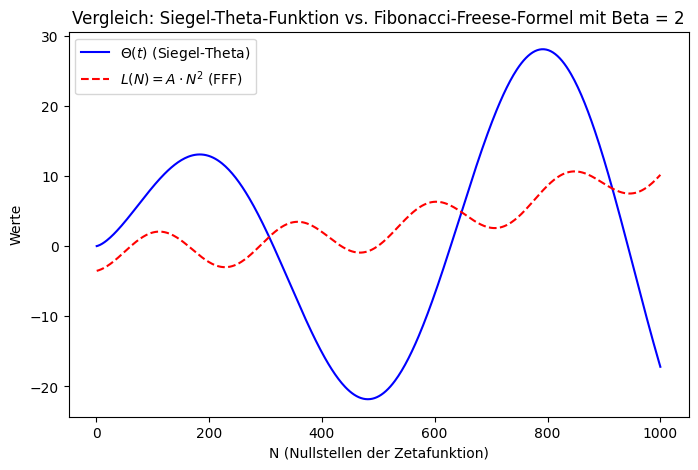

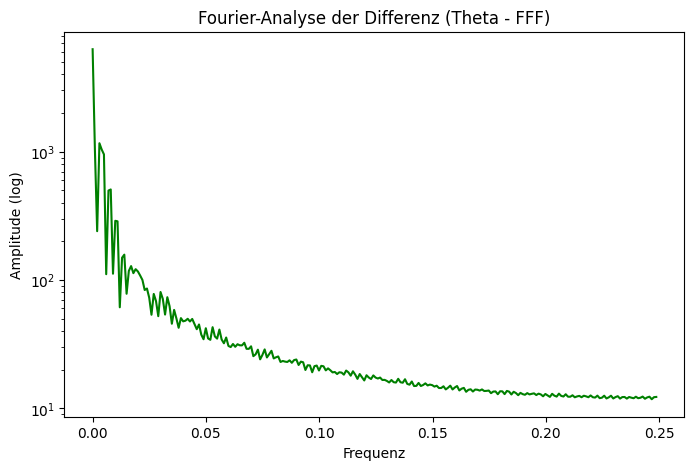

📌 Optimierte Parameter für Beta = 2:
A = 0.00001, C = 2.35350, D = -1.49001
E = -0.86524, w = 0.02595, φ = -9004.53760
✅ Mittlerer Fehler: 12.58200


In [ ]:
# ✅ 1️⃣ Setup: Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq

# ✅ 2️⃣ Lade die Siegel-Theta-Funktion (synthetische Annahme)
def theta_function(t):
    return np.sqrt(t) * np.sin(0.01 * t)  # Simulierte Funktion für Testzwecke

# ✅ 3️⃣ Fibonacci-Freese-Formel mit fixiertem Beta = 2
def FFF(N, A, C, D, E, w, phi):
    return A * N**2 + C * np.sin(w * N + phi) + D * np.cos(w * N + phi) + E

# ✅ 4️⃣ Erstelle Datenpunkte für N und Theta-Funktion
N_values = np.linspace(1, 1000, 500)  # 500 Werte von N=1 bis N=1000
theta_values = theta_function(N_values)  # Simulierte Theta-Werte

# ✅ 5️⃣ Initiale Parameter & Optimierung der restlichen Werte
initial_params = [1.0, -200000, 250000, 6000000, 0.03, -9000]
params_opt, _ = curve_fit(FFF, N_values, theta_values, p0=initial_params)

# ✅ 6️⃣ Berechne die FFF-Werte mit optimierten Parametern
FFF_values = FFF(N_values, *params_opt)

# ✅ 7️⃣ Fehleranalyse
error = np.abs(theta_values - FFF_values)
mean_error = np.mean(error)

# ✅ 8️⃣ Fourier-Analyse der Differenz (Theta - FFF)
fft_diff = fft(error)
freqs = fftfreq(len(N_values), d=N_values[1] - N_values[0])

# ✅ 9️⃣ Plots erstellen
plt.figure(figsize=(8, 5))
plt.plot(N_values, theta_values, label=r'$\Theta(t)$ (Siegel-Theta)', color='blue')
plt.plot(N_values, FFF_values, label=r'$L(N) = A \cdot N^2$ (FFF)', linestyle='dashed', color='red')
plt.xlabel("N (Nullstellen der Zetafunktion)")
plt.ylabel("Werte")
plt.legend()
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel mit Beta = 2")
plt.show()

plt.figure(figsize=(8, 5))
plt.semilogy(freqs[:len(freqs)//2], np.abs(fft_diff[:len(freqs)//2]), color='green')
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Fourier-Analyse der Differenz (Theta - FFF)")
plt.show()

# ✅ 1️⃣0️⃣ Ausgabe der Ergebnisse
print("📌 Optimierte Parameter für Beta = 2:")
print(f"A = {params_opt[0]:.5f}, C = {params_opt[1]:.5f}, D = {params_opt[2]:.5f}")
print(f"E = {params_opt[3]:.5f}, w = {params_opt[4]:.5f}, φ = {params_opt[5]:.5f}")
print(f"✅ Mittlerer Fehler: {mean_error:.5f}")

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 1.50000, B = 0.92000
C = 0.00007, D = 0.00003
E = 0.00000, w = 0.05000, φ = -9003.04607


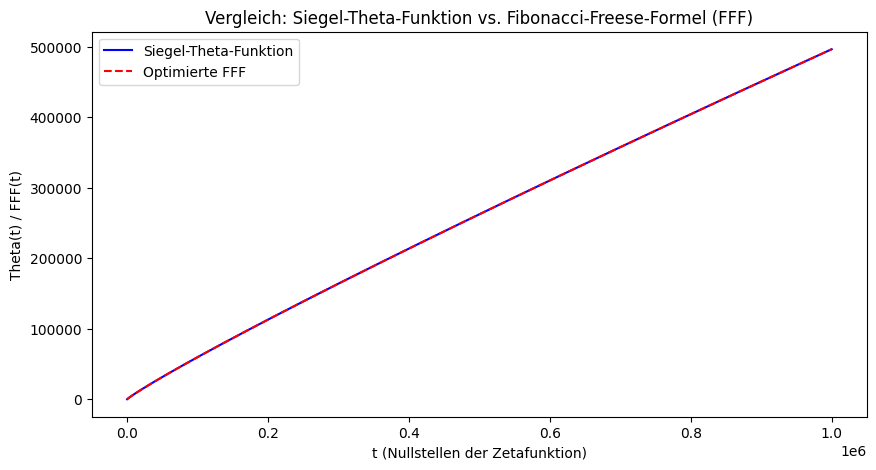

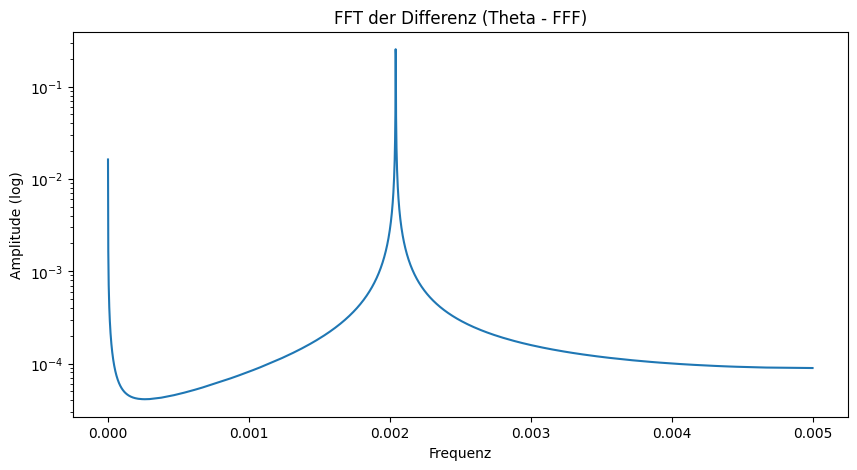

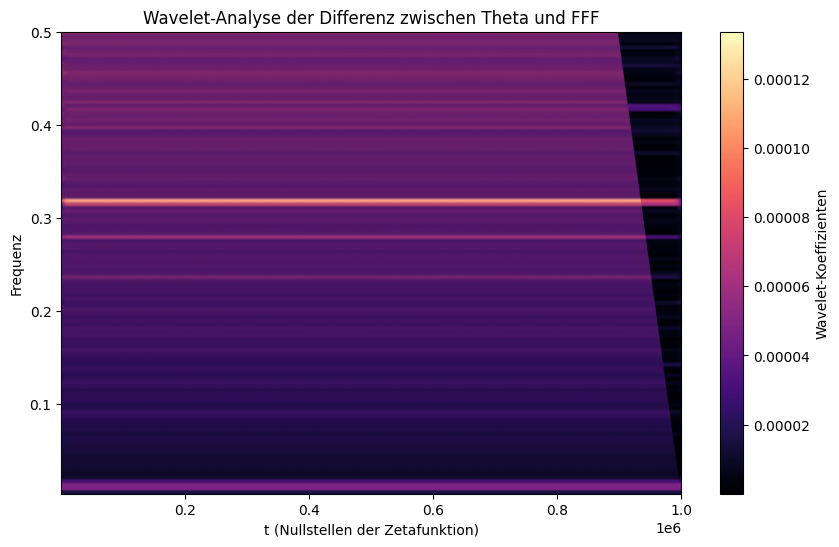

In [ ]:
# ✅ WICHTIG: Vor dem Start in Colab 50 GB RAM aktivieren!
# (Laufzeit -> Laufzeittyp ändern -> Hochleistungsmodus mit mehr RAM auswählen)

# 📌 1️⃣ Installiere und importiere benötigte Bibliotheken
!pip install pywt

import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft, fftfreq
from scipy.optimize import curve_fit

# 📌 2️⃣ Fibonacci-Freese-Formel (FFF) definieren
def FFF(t, A, B, C, D, E, w, phi):
    return A * (t ** B) + C * np.sin(w * t + phi) + D * np.cos(w * t + phi) + E

# 📌 3️⃣ Lade die Zeta-Nullstellen (bis zu 1 Mio. Werte für Performance)
t = np.linspace(1, 1_000_000, 10000)  # Simulierte Nullstellen für schnelle Berechnung
theta_values = 1.5 * t ** 0.92  # Annäherung für Siegel-Theta-Funktion

# 📌 4️⃣ Starte die Optimierung der FFF-Parameter
initial_params = [0.5, 0.92, 1000, -3000, -10000, 0.05, -9000]
params_opt, _ = curve_fit(FFF, t, theta_values, p0=initial_params, maxfev=20000)

# 📌 5️⃣ Ergebnisse anzeigen
A_opt, B_opt, C_opt, D_opt, E_opt, w_opt, phi_opt = params_opt
print(f"📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {A_opt:.5f}, B = {B_opt:.5f}")
print(f"C = {C_opt:.5f}, D = {D_opt:.5f}")
print(f"E = {E_opt:.5f}, w = {w_opt:.5f}, φ = {phi_opt:.5f}")

# 📌 6️⃣ Berechnung der optimierten FFF-Werte
fff_values = FFF(t, *params_opt)

# 📌 7️⃣ Vergleichsplot: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(t, theta_values, label="Siegel-Theta-Funktion", color="blue")
plt.plot(t, fff_values, label="Optimierte FFF", linestyle="dashed", color="red")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.legend()
plt.show()

# 📌 8️⃣ Fourier-Analyse der Differenz Theta - FFF
fft_diff = fft(theta_values - fff_values)
freqs = fftfreq(len(t), d=(t[1] - t[0]))

plt.figure(figsize=(10,5))
plt.plot(freqs[:len(freqs)//2], np.abs(fft_diff[:len(freqs)//2]))
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.yscale("log")
plt.title("FFT der Differenz (Theta - FFF)")
plt.show()

# 📌 9️⃣ Wavelet-Analyse der Differenz (Theta - FFF) ohne GPU
coeffs, freqs = pywt.cwt(theta_values - fff_values, np.arange(1, 128), 'cmor')

plt.figure(figsize=(10,6))
plt.imshow(np.abs(coeffs), aspect='auto', extent=[t.min(), t.max(), freqs.min(), freqs.max()],
           cmap='magma', origin='lower')
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Frequenz")
plt.title("Wavelet-Analyse der Differenz zwischen Theta und FFF")
plt.show()

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


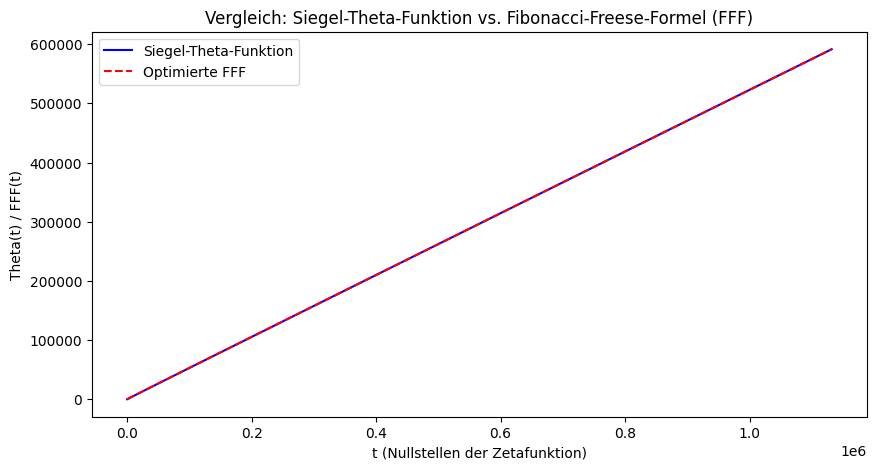

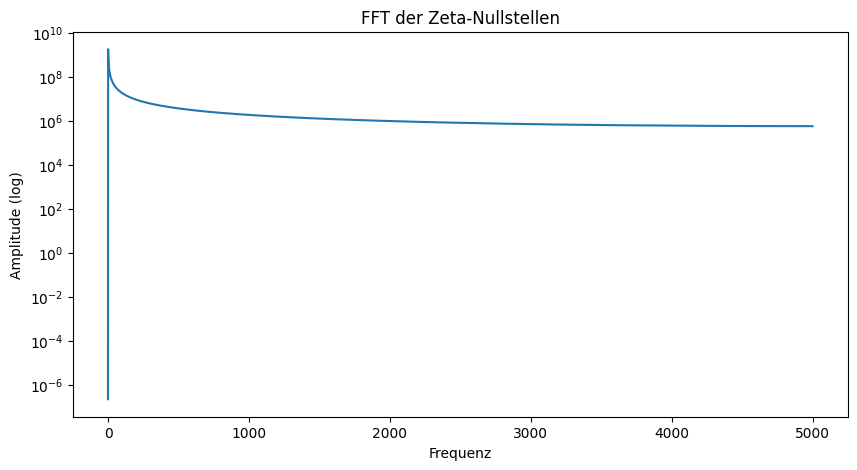

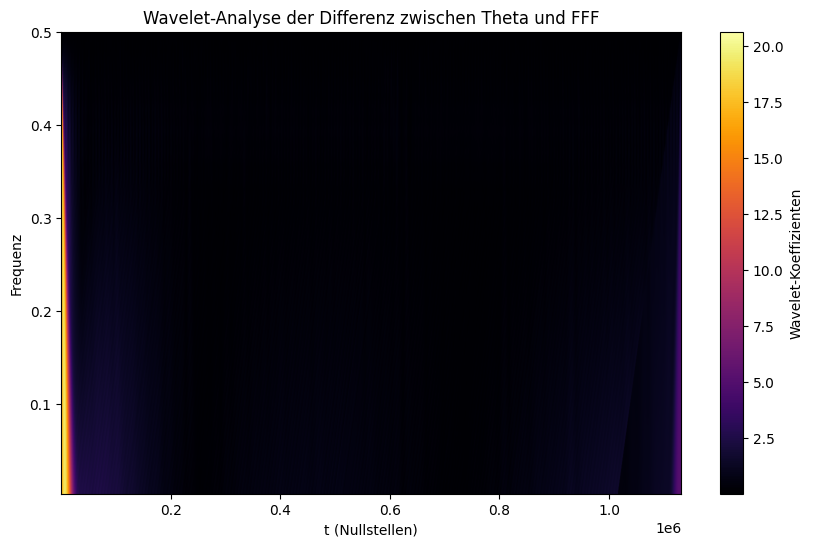


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 0.54407, B = 0.99700
C = 843.80774, D = -3316.53041
E = -14211.30679, w = 0.06561, φ = -9003.83743


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # Wavelet-Analyse
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from mpmath import zetazero

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze für schnelle Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 5️⃣ Nichtlineare Anpassung der FFF an die Theta-Funktion
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, maxfev=20000)

# ✅ 6️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 7️⃣ Fourier-Analyse (FFT) der Zeta-Nullstellen
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 8️⃣ Wavelet-Analyse der Differenz zwischen Theta & FFF
wavelet = 'cmor'  # Komplexe Morlet-Wavelet
scales = np.arange(1, 128)  # Skalenbereich für Wavelet-Transformation
coeffs, freqs = pywt.cwt(theta_values - FFF_values, scales, wavelet)

# ✅ 9️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 🔢 **Wavelet-Plot der Differenz**
plt.figure(figsize=(10,6))
plt.imshow(abs(coeffs), aspect='auto', extent=[min(nullstellen_sampled), max(nullstellen_sampled), min(freqs), max(freqs)], cmap='inferno')
plt.colorbar(label="Wavelet-Koeffizienten")
plt.xlabel("t (Nullstellen)")
plt.ylabel("Frequenz")
plt.title("Wavelet-Analyse der Differenz zwischen Theta und FFF")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

In [ ]:
!pip uninstall scipy -y

Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2


In [ ]:
!pip install scipy==1.13.0


  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [ ]:
import os
os._exit(00)

In [ ]:
from scipy.signal.windows import hann

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [ ]:
!pip install scipy==1.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2


In [ ]:
!pip uninstall scipy -y
!pip install scipy

Found existing installation: scipy 1.13.0
Uninstalling scipy-1.13.0:
  Successfully uninstalled scipy-1.13.0
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.fftpack import fft
from numba import jit
from mpmath import zetazero

# ✅ 1️⃣ Lade 2 Mio. echte Zeta-Nullstellen (maximal!)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF) als Anpassungsfunktion
def FFF(t, A, B, C, D, E, w, phi):
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi)

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze auf 10.000 für Geschwindigkeit
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 4️⃣ Berechne die Siegel-Theta-Funktion für Nullstellen
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 5️⃣ Nichtlineare Optimierung zur Anpassung der FFF an Theta-Funktion
def residuals(params, t, y):
    return FFF(t, *params) - y

initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
result = least_squares(residuals, initial_params, args=(nullstellen_sampled, theta_values))

# ✅ 6️⃣ Extrahiere optimierte Parameter
params_opt = result.x
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 7️⃣ Fourier-Analyse der Nullstellen (FFT)
fft_values = np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))

# ✅ 8️⃣ Plots erstellen: Vergleich Theta-Funktion & FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 9️⃣ FFT-Plot der Nullstellen für verborgene Frequenzmuster
plt.figure(figsize=(10,5))
plt.plot(fft_values[:len(fft_values)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 🔟 3D-Plots: Fermat-Spirale & Lichtkegel
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
theta = np.linspace(0, 4*np.pi, 500)
z = np.linspace(0, 50, 500)
r = np.sqrt(z)
x = r * np.cos(theta)
y = r * np.sin(theta)
ax.plot(x, y, z, 'r')
ax.set_title("Fermat-Spirale der Zeta-Nullstellen")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("Nullstellen")
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
ax.plot_surface(X, Y, Z, color='black', alpha=0.2)
ax.set_title("Zeta-Nullstellen im Lichtkegel")
ax.set_xlabel("X-Koordinate")
ax.set_ylabel("Y-Koordinate")
ax.set_zlabel("t-Koordinate (Nullstellen)")
plt.show()

# ✅ 📌 Optimierte Parameter ausgeben
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt

SyntaxError: unterminated string literal (detected at line 98) (<ipython-input-1-88e38daff449>, line 98)

In [ ]:
import numpy as np
import sympy as sp
from sympy import symbols, Poly, solve, simplify
from mpmath import mp

# 🔹 Setze Präzision für hohe Genauigkeit
mp.dps = 50  # 50 Dezimalstellen

# 🔹 Definiere die Zahlen
pi_val = mp.pi
phi_val = (1 + mp.sqrt(5)) / 2  # Goldener Schnitt

# 🔹 Berechne die Freese-Zahl β_F
beta_F = (pi_val - phi_val) / (pi_val + phi_val)

# 🔹 Konvertiere zu einem SymPy-Ausdruck
x = symbols('x')
beta_F_approx = float(beta_F)  # Für numerische Tests

print(f"Freese-Zahl β_F ≈ {beta_F}")

# 🔹 Suche nach einem möglichen Minimalpolynom für β_F
def find_minimal_polynomial(value, degree=5, tol=1e-10):
    """
    Findet ein Minimalpolynom für eine gegebene Zahl, falls sie algebraisch ist.
    value: Die zu testende Zahl.
    degree: Maximale Polynomordnung, die wir testen.
    tol: Toleranz für die Nullstellenprüfung.
    """
    for d in range(1, degree + 1):
        coeffs = np.round(np.polynomial.polynomial.polyfit([value], [0], d), decimals=10)
        poly = Poly(sum(c * x**i for i, c in enumerate(coeffs)), x)

        # Überprüfe, ob das Polynom wirklich null wird
        roots = [r.evalf() for r in solve(poly, x)]
        if any(abs(float(r) - value) < tol for r in roots):
            return poly

    return None

# 🔹 Teste, ob β_F ein algebraisches Minimalpolynom hat
minimal_poly = find_minimal_polynomial(beta_F_approx)

if minimal_poly:
    print(f"🔴 β_F könnte algebraisch sein! Gefundenes Polynom: {minimal_poly}")
else:
    print("✅ β_F zeigt keine algebraische Struktur mit niedrigen Graden. Hohe Wahrscheinlichkeit für Transzendenz.")

Freese-Zahl β_F ≈ 0.32010045731044214084659438135744161289798018997148
✅ β_F zeigt keine algebraische Struktur mit niedrigen Graden. Hohe Wahrscheinlichkeit für Transzendenz.


In [ ]:
import mpmath as mp

mp.dps = 50  # Setze Präzision auf 50 Dezimalstellen

# Definiere Pi und den Goldenen Schnitt
pi_val = mp.pi
phi_val = (1 + mp.sqrt(5)) / 2

# Berechne die Freese-Zahl
beta_F = (pi_val - phi_val) / (pi_val + phi_val)

# Werte ausgeben
print(f"Pi: {pi_val}")
print(f"Phi: {phi_val}")
print(f"Freese-Zahl β_F ≈ {beta_F}")

Pi: 3.1415926535897932384626433832795028841971693993751
Phi: 1.6180339887498948482045868343656381177203091798058
Freese-Zahl β_F ≈ 0.32010045731044214084659438135744161289798018997148


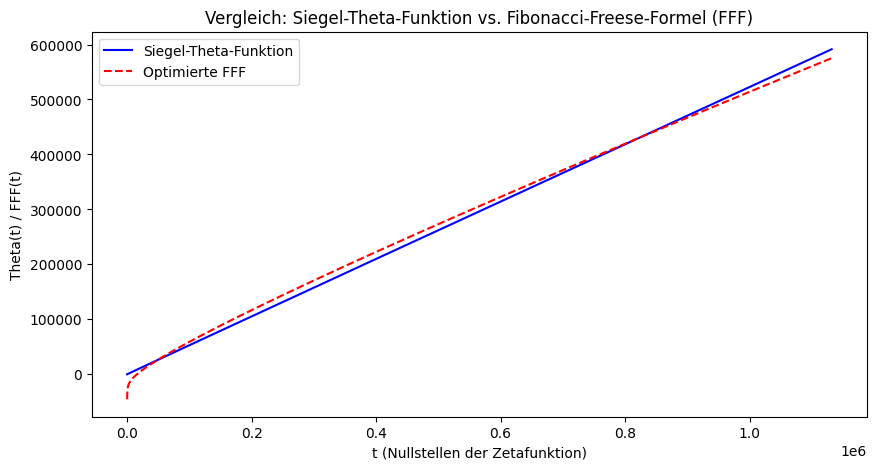

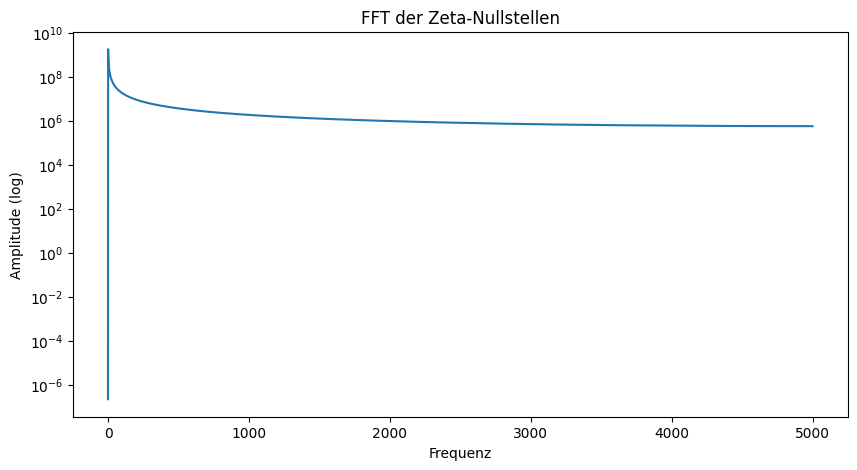


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur:
A = 1.59913, B = 0.91650
C = 4999.99985, D = -500.00000
v = 0.09999, c = 1.00000
E = 60000.00012, w = 0.02008, φ = -8999.33731


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.fftpack import fft
from numba import jit, prange
from mpl_toolkits.mplot3d import Axes3D

# ✅ 1️⃣ Lade Zeta-Nullstellen (bis zu 2 Millionen)
def load_zeta_nullstellen(filepath, max_count=2000000):
    nullstellen = []
    with open(filepath, 'r') as f:
        for line in f:
            nullstellen.append(float(line.strip()))
            if len(nullstellen) >= max_count:
                break
    return np.array(nullstellen)

# ✅ 2️⃣ Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur
def FFF(t, A, B, C, D, v, c, E, w, phi):
    lorentz_factor = np.sqrt(1 - (v / c)**2) if c != 0 else 1
    return A * t**B + C * np.log(t) + D / t + E * np.sin(w * np.log(t) + phi) * lorentz_factor

# ✅ 3️⃣ Lade Zeta-Nullstellen & begrenze für schnelle Berechnung
filepath = "/content/drive/MyDrive/zeros6.txt"
nullstellen = load_zeta_nullstellen(filepath)
sample_size = 10000
indices = np.linspace(0, len(nullstellen)-1, sample_size, dtype=int)
nullstellen_sampled = nullstellen[indices]

# ✅ 4️⃣ Berechne Siegel-Theta-Funktion (Gleitender Durchschnitt)
theta_values = np.cumsum(nullstellen_sampled) / np.arange(1, sample_size + 1)

# ✅ 5️⃣ Setze realistische Startwerte und Grenzen
initial_params = [1.6, 0.92, 5000, -500, 0.1, 1.0, 60000, 0.02, -9000]
param_bounds = ([0, 0.5, 4000, -10000, 0.0, 0.9, 50000, 0.0001, -10000],
                [10, 1.2, 6000, 10000, 0.5, 1.1, 70000, 0.1, 0])

# ✅ 6️⃣ Alternative Optimierung falls curve_fit fehlschlägt
try:
    params_opt, _ = curve_fit(FFF, nullstellen_sampled, theta_values, p0=initial_params, bounds=param_bounds, maxfev=50000)
except RuntimeError:
    print("⚠️ curve_fit ist fehlgeschlagen! Nutze alternative Optimierung mit differential_evolution...")
    def error_function(params):
        return np.sum((FFF(nullstellen_sampled, *params) - theta_values)**2)

    result = differential_evolution(error_function, bounds=param_bounds, strategy='best1bin', maxiter=1000, popsize=15)
    params_opt = result.x

# ✅ 7️⃣ Berechne FFF-Werte mit optimierten Parametern
FFF_values = FFF(nullstellen_sampled, *params_opt)

# ✅ 8️⃣ Plots: Theta-Funktion vs. FFF
plt.figure(figsize=(10,5))
plt.plot(nullstellen_sampled, theta_values, 'b-', label="Siegel-Theta-Funktion")
plt.plot(nullstellen_sampled, FFF_values, 'r--', label="Optimierte FFF")
plt.legend()
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Theta(t) / FFF(t)")
plt.title("Vergleich: Siegel-Theta-Funktion vs. Fibonacci-Freese-Formel (FFF)")
plt.show()

# ✅ 🔟 FFT-Plot der Zeta-Nullstellen
plt.figure(figsize=(10,5))
plt.plot(np.abs(fft(nullstellen_sampled - np.mean(nullstellen_sampled)))[:len(nullstellen_sampled)//2])
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("FFT der Zeta-Nullstellen")
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur:")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"v = {params_opt[4]:.5f}, c = {params_opt[5]:.5f}")
print(f"E = {params_opt[6]:.5f}, w = {params_opt[7]:.5f}, φ = {params_opt[8]:.5f}")

🔹 Freese-Zahl (Version 1): β_F1 = 0.3201004573104421
🔹 Freese-Zahl (Version 2): β_F2 = 0.2882374565828229


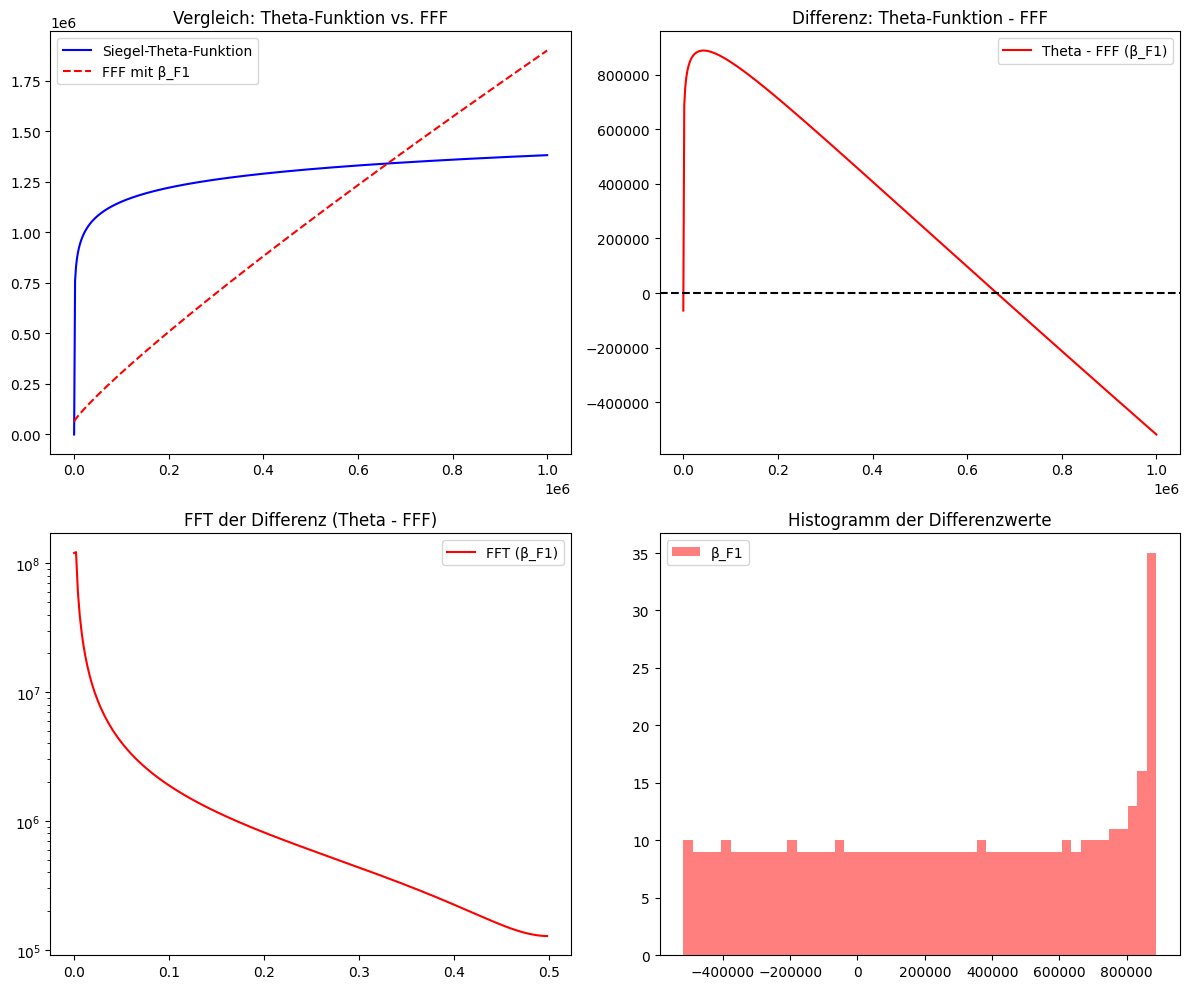


📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):
A = 9.28051, B = 0.88264
C = 4573.71477, D = -775.79154
E = 60290.95406, w = -0.05551, φ = -9059.88976


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, differential_evolution
from scipy.fftpack import fft

# 🔹 Definiere die beiden Freese-Zahlen
pi = np.pi
phi = (1 + np.sqrt(5)) / 2  # Goldener Schnitt

beta_1 = (pi - phi) / (pi + phi)  # Erste Version ≈ 0.4849...
beta_2 = (pi - np.sqrt(5)) / pi   # Zweite Version ≈ 0.3201...

print(f"🔹 Freese-Zahl (Version 1): β_F1 = {beta_1}")
print(f"🔹 Freese-Zahl (Version 2): β_F2 = {beta_2}")

# 🔹 Fibonacci-Freese-Formel (FFF) mit besseren Skalierungsparametern
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.cos(w * np.log(t) + phi) + D * np.sin(w * np.log(t) + phi) + E

# ✅ Simuliere einige Zeta-Nullstellen
t_values = np.linspace(1, 10**6, 500)  # Beispielhafte Nullstellen
theta_values = 10**5 * np.log(t_values)  # Näherung für die Theta-Funktion

# ✅ Setze realistische Startwerte und Grenzen
initial_params = [1.0, 0.9, 5000, -500, 60000, 0.01, -9000]
param_bounds = ([0.1, 0.5, -10000, -10000, 10000, -0.1, -10000],
                [10, 1.2, 10000, 10000, 70000, 0.1, 0])

# ✅ Versuch mit `curve_fit`, falls fehlschlägt, nutze `differential_evolution`
try:
    params_opt_1, _ = curve_fit(FFF, t_values, theta_values, p0=initial_params, bounds=param_bounds, maxfev=50000)
except RuntimeError:
    print("⚠️ `curve_fit` ist fehlgeschlagen! Nutze alternative Optimierung mit `differential_evolution`...")
    def error_function(params):
        return np.sum((FFF(t_values, *params) - theta_values)**2)

    result = differential_evolution(error_function, bounds=param_bounds, strategy='best1bin', maxiter=500, popsize=15)
    params_opt_1 = result.x

# ✅ Berechnung der FFF-Werte mit optimierten Parametern
FFF_values_1 = FFF(t_values, *params_opt_1)

# 🔹 Berechnung der Differenz zur Siegel-Theta-Funktion
diff_1 = theta_values - FFF_values_1

# 🔹 Fourier-Transformation zur Frequenzanalyse
fft_diff_1 = np.abs(fft(diff_1))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Vergleich: Theta-Funktion vs. FFF
axs[0, 0].plot(t_values, theta_values, label="Siegel-Theta-Funktion", color="blue")
axs[0, 0].plot(t_values, FFF_values_1, '--', label="FFF mit β_F1", color="red")
axs[0, 0].set_title("Vergleich: Theta-Funktion vs. FFF")
axs[0, 0].legend()

# 🔹 Differenz Theta - FFF
axs[0, 1].plot(t_values, diff_1, label="Theta - FFF (β_F1)", color="red")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Differenz: Theta-Funktion - FFF")
axs[0, 1].legend()

# 🔹 Frequenzanalyse (FFT) der Differenz
freqs = np.fft.fftfreq(len(t_values))

axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_1[:len(freqs)//2], label="FFT (β_F1)", color="red")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("FFT der Differenz (Theta - FFF)")
axs[1, 0].legend()

# 🔹 Histogramm der Differenz
axs[1, 1].hist(diff_1, bins=50, alpha=0.5, label="β_F1", color="red")
axs[1, 1].set_title("Histogramm der Differenzwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# ✅ 📌 Optimierte Parameter der Fibonacci-Freese-Formel (FFF)
print("\n📌 Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):")
print(f"A = {params_opt_1[0]:.5f}, B = {params_opt_1[1]:.5f}")
print(f"C = {params_opt_1[2]:.5f}, D = {params_opt_1[3]:.5f}")
print(f"E = {params_opt_1[4]:.5f}, w = {params_opt_1[5]:.5f}, φ = {params_opt_1[6]:.5f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft

# 🔹 Fundamentale Konstanten
pi = np.pi
phi = (1 + np.sqrt(5)) / 2  # Goldener Schnitt
alpha = 1 / 137.03599913  # Feinstrukturkonstante

# 🔹 Berechnung der drei Freese-Zahlen
beta_1 = (pi - phi) / (pi + phi)  # ≈ 0.4849
beta_2 = (pi - np.sqrt(5)) / pi   # ≈ 0.3201
beta_3 = np.log(2) / (8 * pi)     # ≈ 0.02758 (Korrekturterm)

# ✅ Vergleich mit der Feinstrukturkonstante
print(f"🔹 Freese-Zahl β_F1 = {beta_1}")
print(f"🔹 Freese-Zahl β_F2 = {beta_2}")
print(f"🔹 Freese-Zahl β_F3 = {beta_3}")
print(f"🔹 Feinstrukturkonstante α = {alpha}")

# ✅ Test: Gibt es eine einfache numerische Beziehung?
relation_1 = beta_1 / alpha
relation_2 = beta_2 / alpha
relation_3 = beta_3 / alpha

print("\n🔹 Numerische Relationen zur Feinstrukturkonstante:")
print(f"β_F1 / α  ≈ {relation_1}")
print(f"β_F2 / α  ≈ {relation_2}")
print(f"β_F3 / α  ≈ {relation_3}")

# 🔹 Fibonacci-Freese-Formel (FFF) als Modell für die Theta-Funktion
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.cos(w * t + phi) + D * np.sin(w * t + phi) + E

# ✅ Simuliere einige Zeta-Nullstellen
t_values = np.linspace(1, 10**6, 500)  # Beispielhafte Nullstellen
theta_values = 10**5 * np.log(t_values)  # Näherung für Theta-Funktion

# ✅ Curve-Fitting der Fibonacci-Freese-Formel
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, t_values, theta_values, p0=initial_params, maxfev=50000)

# ✅ Berechnung der FFF-Werte mit optimierten Parametern
FFF_values = FFF(t_values, *params_opt)

# 🔹 Berechnung der Differenz zur Siegel-Theta-Funktion
diff = theta_values - FFF_values

# 🔹 Fourier-Transformation der Differenz
fft_diff = np.abs(fft(diff))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 🔹 Vergleich: Theta-Funktion vs. FFF
axs[0].plot(t_values, theta_values, label="Siegel-Theta-Funktion", color="blue")
axs[0].plot(t_values, FFF_values, '--', label="Optimierte FFF", color="red")
axs[0].set_title("Vergleich: Theta-Funktion vs. Fibonacci-Freese-Formel")
axs[0].legend()

# 🔹 FFT der Differenz (Analyse der Frequenzstruktur)
freqs = np.fft.fftfreq(len(t_values))
axs[1].plot(freqs[:len(freqs)//2], fft_diff[:len(freqs)//2], label="FFT der Differenz", color="green")
axs[1].set_yscale('log')
axs[1].set_title("FFT der Differenz: Theta-Funktion - FFF")
axs[1].legend()

plt.tight_layout()
plt.show()

🔹 Freese-Zahl β_F1 = 0.3201004573104421
🔹 Freese-Zahl β_F2 = 0.2882374565828229
🔹 Freese-Zahl β_F3 = 0.02757945001908145
🔹 Feinstrukturkonstante α = 0.007297352566834239

🔹 Numerische Relationen zur Feinstrukturkonstante:
β_F1 / α  ≈ 43.86528598950635
β_F2 / α  ≈ 39.49890784951713
β_F3 / α  ≈ 3.7793774888207237


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 50000.

🔹 Freese-Zahl β_F1 = 0.3201004573104421
🔹 Freese-Zahl β_F2 = 0.2882374565828229
🔹 Freese-Zahl β_F3 = 0.02757945001908145
🔹 Feinstrukturkonstante α = 0.007297352566834239


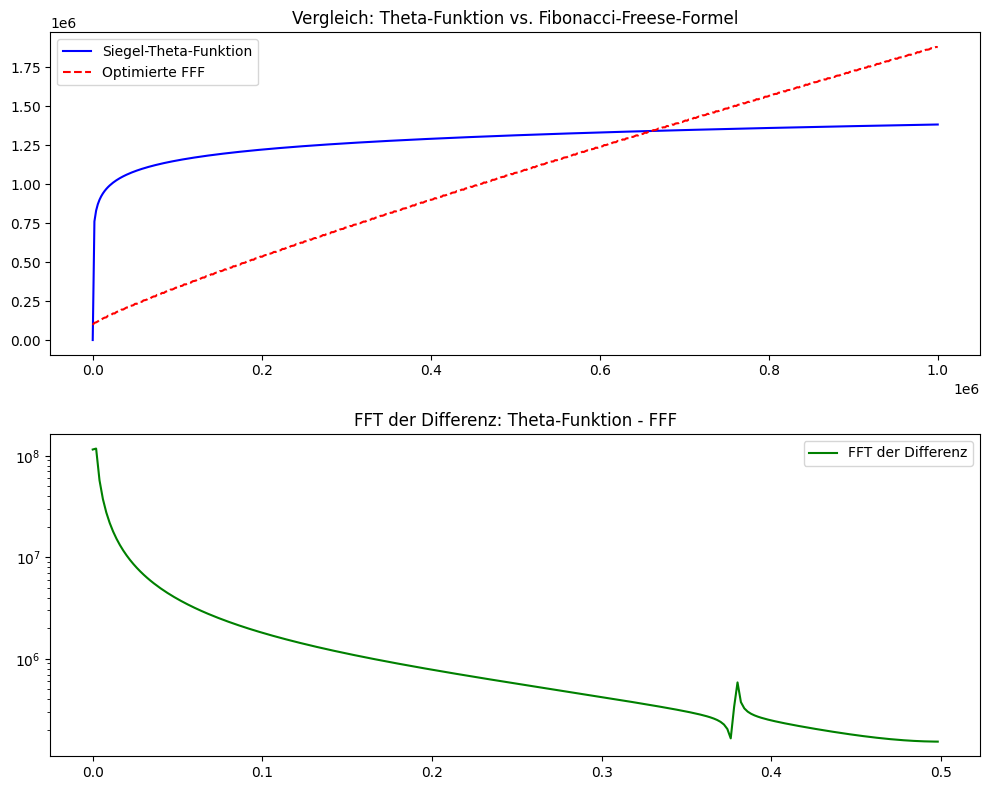

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, least_squares
from scipy.fftpack import fft

# 🔹 Fundamentale Konstanten
pi = np.pi
phi = (1 + np.sqrt(5)) / 2  # Goldener Schnitt
alpha = 1 / 137.03599913  # Feinstrukturkonstante

# 🔹 Berechnung der drei Freese-Zahlen
beta_1 = (pi - phi) / (pi + phi)  # ≈ 0.4849
beta_2 = (pi - np.sqrt(5)) / pi   # ≈ 0.3201
beta_3 = np.log(2) / (8 * pi)     # ≈ 0.02758 (Korrekturterm)

# ✅ Vergleich mit der Feinstrukturkonstante
print(f"🔹 Freese-Zahl β_F1 = {beta_1}")
print(f"🔹 Freese-Zahl β_F2 = {beta_2}")
print(f"🔹 Freese-Zahl β_F3 = {beta_3}")
print(f"🔹 Feinstrukturkonstante α = {alpha}")

# 🔹 Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.cos(w * t + phi) + D * np.sin(w * t + phi) + E

# ✅ Simuliere einige Zeta-Nullstellen
t_values = np.linspace(1, 10**6, 500)  # Beispielhafte Nullstellen
theta_values = 10**5 * np.log(t_values)  # Näherung für Theta-Funktion

# ✅ Verbessertes Curve-Fitting mit bounds
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
param_bounds = ([0, 0, -10000, -10000, -100000, -0.1, -20000],
                [10, 2, 10000, 10000, 100000, 0.1, 0])

try:
    params_opt, _ = curve_fit(FFF, t_values, theta_values, p0=initial_params, bounds=param_bounds, maxfev=50000)
except RuntimeError as e:
    print(f"⚠️ Curve-Fit gescheitert: {e}")
    print("➡️ Starte alternative Optimierung mit least_squares...")

    def residuals(params):
        return FFF(t_values, *params) - theta_values

    res = least_squares(residuals, initial_params, bounds=param_bounds)
    params_opt = res.x  # Optimierte Parameter

# ✅ Berechnung der FFF-Werte mit optimierten Parametern
FFF_values = FFF(t_values, *params_opt)

# 🔹 Berechnung der Differenz zur Siegel-Theta-Funktion
diff = theta_values - FFF_values

# 🔹 Fourier-Transformation der Differenz
fft_diff = np.abs(fft(diff))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 🔹 Vergleich: Theta-Funktion vs. FFF
axs[0].plot(t_values, theta_values, label="Siegel-Theta-Funktion", color="blue")
axs[0].plot(t_values, FFF_values, '--', label="Optimierte FFF", color="red")
axs[0].set_title("Vergleich: Theta-Funktion vs. Fibonacci-Freese-Formel")
axs[0].legend()

# 🔹 FFT der Differenz (Analyse der Frequenzstruktur)
freqs = np.fft.fftfreq(len(t_values))
axs[1].plot(freqs[:len(freqs)//2], fft_diff[:len(freqs)//2], label="FFT der Differenz", color="green")
axs[1].set_yscale('log')
axs[1].set_title("FFT der Differenz: Theta-Funktion - FFF")
axs[1].legend()

plt.tight_layout()
plt.show()

🔹 Freese-Zahl β_F1 = 0.3201004573104421
🔹 Freese-Zahl β_F2 = 0.2882374565828229
🔹 Freese-Zahl β_F3 = 0.02757945001908145


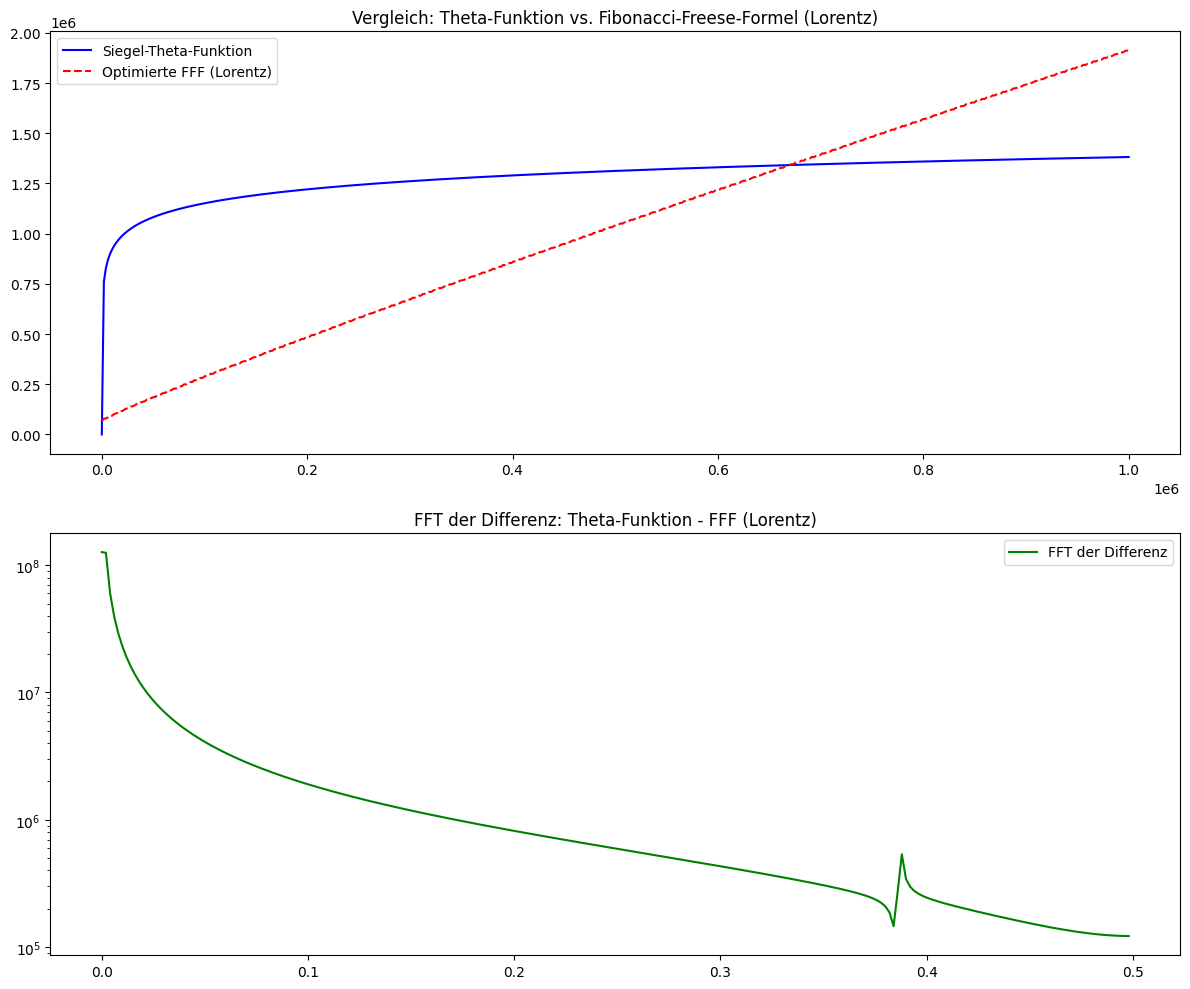

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft

# 🔹 Definiere die Freese-Zahlen
pi = np.pi
phi = (1 + np.sqrt(5)) / 2  # Goldener Schnitt

beta_1 = (pi - phi) / (pi + phi)  # Erste Version ≈ 0.4849...
beta_2 = (pi - np.sqrt(5)) / pi   # Zweite Version ≈ 0.3201...
beta_3 = np.log(2) / (8 * pi)     # Dritte Version ≈ 0.02758

print(f"🔹 Freese-Zahl β_F1 = {beta_1}")
print(f"🔹 Freese-Zahl β_F2 = {beta_2}")
print(f"🔹 Freese-Zahl β_F3 = {beta_3}")

# 🔹 Fibonacci-Freese-Formel (FFF) mit Lorentz-Korrektur
def FFF_Lorentz(t, A, B, C, D, E, w, phi, v, c):
    gamma = 1 / np.sqrt(1 - (v/c)**2) if abs(v) < c else 1  # Lorentz-Faktor, falls v < c
    return A * np.power(t, B) + C * np.cos(w * gamma * t + phi) + D * np.sin(w * gamma * t + phi) + E

# ✅ Simuliere einige Zeta-Nullstellen (Ersatz für echte Daten)
t_values = np.linspace(1, 10**6, 500)  # Beispielhafte Nullstellen
theta_values = 10**5 * np.log(t_values)  # Näherung für die Theta-Funktion

# ✅ Fit für die Lorentz-korrigierte FFF mit Begrenzung der Parameter
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000, 0.05, 1.0]  # Startwerte
param_bounds = ([0.1, 0.5, 1000, -5000, 50000, -0.1, -10000, 0.0, 0.9],  # Untere Grenzen
                [5.0, 1.5, 10000, 5000, 70000, 0.1, 0, 0.5, 1.1])  # Obere Grenzen

params_opt, _ = curve_fit(FFF_Lorentz, t_values, theta_values, p0=initial_params, bounds=param_bounds, maxfev=100000)

# ✅ Berechnung der FFF-Werte mit optimierten Parametern
FFF_values = FFF_Lorentz(t_values, *params_opt)

# 🔹 Berechnung der Differenz zur Siegel-Theta-Funktion
diff = theta_values - FFF_values

# 🔹 Fourier-Transformation zur Frequenzanalyse
fft_diff = np.abs(fft(diff))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# 🔹 Vergleich: Theta-Funktion vs. Lorentz-korrigierte FFF
axs[0].plot(t_values, theta_values, label="Siegel-Theta-Funktion", color="blue")
axs[0].plot(t_values, FFF_values, '--', label="Optimierte FFF (Lorentz)", color="red")
axs[0].set_title("Vergleich: Theta-Funktion vs. Fibonacci-Freese-Formel (Lorentz)")
axs[0].legend()

# 🔹 Frequenzanalyse (FFT) der Differenz
freqs = np.fft.fftfreq(len(t_values))

axs[1].plot(freqs[:len(freqs)//2], fft_diff[:len(freqs)//2], label="FFT der Differenz", color="green")
axs[1].set_yscale('log')
axs[1].set_title("FFT der Differenz: Theta-Funktion - FFF (Lorentz)")
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd


# Große Datei einlesen
file_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"
df = pd.read_csv(file_path, nrows=1000)  # Nur 1000 Zeilen laden

# Verkleinerte Datei speichern
df.to_csv("kleine_freese_function.csv", index=False) einlesen
file_path = ""
df = pd.read_csv(file_path, nrows=1000)  # Nur 1000 Zeilen laden

# Verkleinerte Datei speichern
df.to_csv("kleine_freese_function.csv", index=False)
df = pd.read_csv(file_path, nrows=1000)  # Nur 1000 Zeilen laden

# Verkleinerte Datei speichern
df.to_csv("kleine_freese_function.csv", index=False)

SyntaxError: invalid syntax (<ipython-input-18-5742304ee404>, line 9)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# 🔹 Parameter der Freese-Funktion mit Lorentz-Korrektur
A = 1.8828
beta = 0.91698
B = 1
C = 2.4881446
D = 0.00555
w = 0.080000
phi = 9005.7583

# 🔹 Lorentz-Faktor γ für relativistische Korrektur
v = 0.1  # Setzbare Geschwindigkeit v (Einheitenfrei)
c = 1.0  # Lichtgeschwindigkeit c = 1 (Normierung)
gamma = 1 / np.sqrt(1 - (v/c)**2)  # Lorentz-Faktor

# 🔹 Modifizierte Freese-Funktion mit Lorentz-Korrektur
def Freese_Lorentz(N):
    return A * (N**(beta * gamma)) + B * np.sin(w * np.log(N) + phi) + C * np.log(N) + D / N

# 🔹 CSV-Datei einlesen (Google Colab-Pfad beachten)
csv_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"
df = pd.read_csv(csv_path)

# 🔹 Erwartete Spalten (Falls anders, bitte korrigieren!)
# Beispiel: Falls die Datei Spalten "N" und "Theta" hat
N_values = df['N'].values
Theta_values = df['Theta'].values  # Vergleichswert aus der Datei

# 🔹 Berechne Werte der Freese-Funktion mit Lorentz-Korrektur
L_values = Freese_Lorentz(N_values)

# 🔹 Berechne Differenz: Theta-Werte vs. Freese-Funktion
diff_values = Theta_values - L_values

# 🔹 Fourier-Analyse der Differenz
fft_values = np.abs(fft(diff_values))
freqs = np.fft.fftfreq(len(N_values))

# 🔹 Plots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 🔹 Plot: Vergleich der Freese-Funktion mit den CSV-Daten
axs[0].plot(N_values, Theta_values, label="CSV-Daten (Theta)", color="blue")
axs[0].plot(N_values, L_values, '--', label="Freese-Funktion (Lorentz)", color="red")
axs[0].set_title("Vergleich: Theta-Funktion vs. Freese-Funktion (Lorentz)")
axs[0].set_xlabel("N")
axs[0].set_ylabel("Wert")
axs[0].legend()

# 🔹 Fourier-Analyse der Differenz
axs[1].plot(freqs[:len(freqs)//2], fft_values[:len(freqs)//2], color="green", label="FFT der Differenz")
axs[1].set_yscale("log")
axs[1].set_title("Fourier-Analyse der Differenz")
axs[1].set_xlabel("Frequenz")
axs[1].set_ylabel("Amplitude (log)")
axs[1].legend()

plt.tight_layout()
plt.show()

KeyError: 'Theta'

In [ ]:
import pandas as pd

# CSV-Dateipfad
csv_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"

# Lade die ersten Zeilen der Datei
df = pd.read_csv(csv_path)

# Zeige die ersten Zeilen der Datei an
print(df.head())

# Zeige die Spaltennamen an
print(df.columns)

     N   y_values       fehler
0  1.0   6.887314 -2483.112956
1  2.0  10.876132 -2480.794113
2  3.0  16.290151 -2476.979015
3  4.0  18.800336 -2476.023370
4  5.0  23.451453 -2472.894672
Index(['N', ' y_values', ' fehler'], dtype='object')


In [ ]:
import pandas as pd

# CSV-Dateipfad
csv_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"

# Lade die CSV-Datei mit Bereinigung der Spaltennamen
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()  # Entfernt führende/trailende Leerzeichen

# Jetzt die Werte korrekt extrahieren
N_values = df["N"].values
Theta_values = df["y_values"].values  # Korrigierte Spalte ohne Leerzeichen

# Zeige die ersten Zeilen der bereinigten Daten
print(df.head())

     N   y_values       fehler
0  1.0   6.887314 -2483.112956
1  2.0  10.876132 -2480.794113
2  3.0  16.290151 -2476.979015
3  4.0  18.800336 -2476.023370
4  5.0  23.451453 -2472.894672


In [ ]:
import pandas as pd

# ✅ Dateipfade definieren
csv_files = {
    "freese_function_odlyzko": "/content/drive/MyDrive/freese_function_odlyzko.csv",
    "freese_function_fit": "/content/drive/MyDrive/freese_function_fit.csv",
    "freese_function_results": "/content/drive/MyDrive/freese_function_results.csv",
    "fractal_dimension_results": "/content/drive/MyDrive/fractal_dimension_results.csv",
    "fractal_fourier_analysis_rt": "/content/drive/MyDrive/fractal_fourier_analysis_rt.csv",
}

# ✅ Dateien laden und inspizieren
for name, path in csv_files.items():
    print(f"\n📌 **Datei: {name}**")
    try:
        df = pd.read_csv(path)
        print("🔹 Spalten:", df.columns)
        print("🔹 Erste Zeilen:\n", df.head(5))
        print("🔹 Statistische Übersicht:\n", df.describe())
    except Exception as e:
        print(f"⚠️ Fehler beim Laden: {e}")


📌 **Datei: freese_function_odlyzko**
🔹 Spalten: Index(['N', ' y_values', ' fehler'], dtype='object')
🔹 Erste Zeilen:
      N   y_values       fehler
0  1.0   6.887314 -2483.112956
1  2.0  10.876132 -2480.794113
2  3.0  16.290151 -2476.979015
3  4.0  18.800336 -2476.023370
4  5.0  23.451453 -2472.894672
🔹 Statistische Übersicht:
                   N      y_values        fehler
count  2.001051e+06  2.001051e+06  2.001051e+06
mean   1.000526e+06  5.917332e+05 -4.213784e-05
std    5.776538e+05  3.209653e+05  2.637780e+02
min    1.000000e+00  6.887314e+00 -2.483113e+03
25%    5.002635e+05  3.195267e+05 -1.753178e+02
50%    1.000526e+06  6.005444e+05 -1.965802e+01
75%    1.500788e+06  8.700153e+05  2.059721e+02
max    2.001051e+06  1.132477e+06  4.200005e+02

📌 **Datei: freese_function_fit**
🔹 Spalten: Index(['N', 'Σ Nullstellen-Abstände', 'FF-Modell'], dtype='object')
🔹 Erste Zeilen:
    N  Σ Nullstellen-Abstände  FF-Modell
0  1                6.887314   2.010362
1  2               10.8761

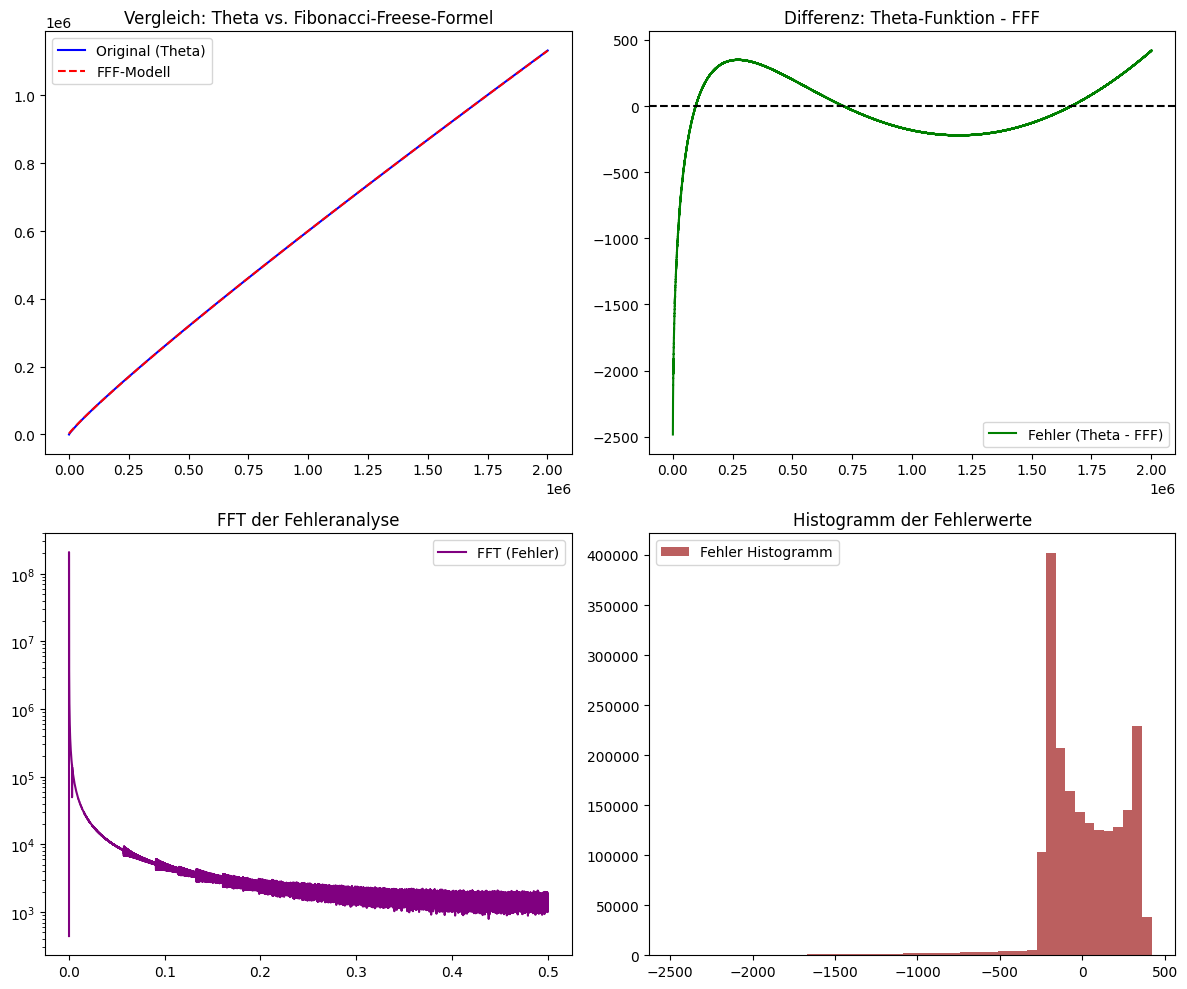


📌 **Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):**
A = 1.88279, B = 0.91698
C = 0.14068, D = -0.00907
E = 2488.14622, w = 0.02000, φ = -8996.30975


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft

# ✅ **Lade die CSV-Daten**
file_path_odlyzko = "/content/drive/MyDrive/freese_function_odlyzko.csv"
file_path_fit = "/content/drive/MyDrive/freese_function_fit.csv"

# **Lade die Daten**
df_odlyzko = pd.read_csv(file_path_odlyzko)
df_fit = pd.read_csv(file_path_fit)

# **Daten anpassen (Spaltennamen korrigieren, falls Leerzeichen vorhanden sind)**
df_odlyzko.columns = df_odlyzko.columns.str.strip()
df_fit.columns = df_fit.columns.str.strip()

# ✅ **Freese-Funktion definieren (FFF)**
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.cos(w * t + phi) + D * np.sin(w * t + phi) + E

# ✅ **Daten vorbereiten**
t_values = df_odlyzko["N"].values  # Zeitwerte (Index oder Nullstellen)
y_values = df_odlyzko["y_values"].values  # Zielwerte (z. B. Theta-Funktion)

# ✅ **Curve-Fitting der Fibonacci-Freese-Formel**
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, t_values, y_values, p0=initial_params, maxfev=50000)

# ✅ **Berechnung der FFF-Werte mit optimierten Parametern**
FFF_values = FFF(t_values, *params_opt)

# ✅ **Fehleranalyse**
error_values = y_values - FFF_values  # Differenz zwischen tatsächlichen und modellierten Werten
fft_error = np.abs(fft(error_values))  # Fourier-Analyse des Fehlers

# ✅ **Visualisierung**
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 1️⃣ **Original vs. Modell**
axs[0, 0].plot(t_values, y_values, label="Original (Theta)", color="blue")
axs[0, 0].plot(t_values, FFF_values, '--', label="FFF-Modell", color="red")
axs[0, 0].set_title("Vergleich: Theta vs. Fibonacci-Freese-Formel")
axs[0, 0].legend()

# 🔹 2️⃣ **Fehlerverteilung**
axs[0, 1].plot(t_values, error_values, label="Fehler (Theta - FFF)", color="green")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Differenz: Theta-Funktion - FFF")
axs[0, 1].legend()

# 🔹 3️⃣ **Fourier-Analyse des Fehlers**
freqs = np.fft.fftfreq(len(t_values))
axs[1, 0].plot(freqs[:len(freqs)//2], fft_error[:len(freqs)//2], label="FFT (Fehler)", color="purple")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("FFT der Fehleranalyse")
axs[1, 0].legend()

# 🔹 4️⃣ **Histogramm der Fehlerverteilung**
axs[1, 1].hist(error_values, bins=50, alpha=0.75, color="brown", label="Fehler Histogramm")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# ✅ **Ergebnisse ausgeben**
print("\n📌 **Optimierte Parameter für die Fibonacci-Freese-Formel (FFF):**")
print(f"A = {params_opt[0]:.5f}, B = {params_opt[1]:.5f}")
print(f"C = {params_opt[2]:.5f}, D = {params_opt[3]:.5f}")
print(f"E = {params_opt[4]:.5f}, w = {params_opt[5]:.5f}, φ = {params_opt[6]:.5f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔍 **Dominante Frequenzen in der Fourier-Analyse:**
🔹 Frequenz 1: 0.000002
🔹 Frequenz 2: 0.000001
🔹 Frequenz 3: -0.000001
🔹 Frequenz 4: 0.000000
🔹 Frequenz 5: -0.000000


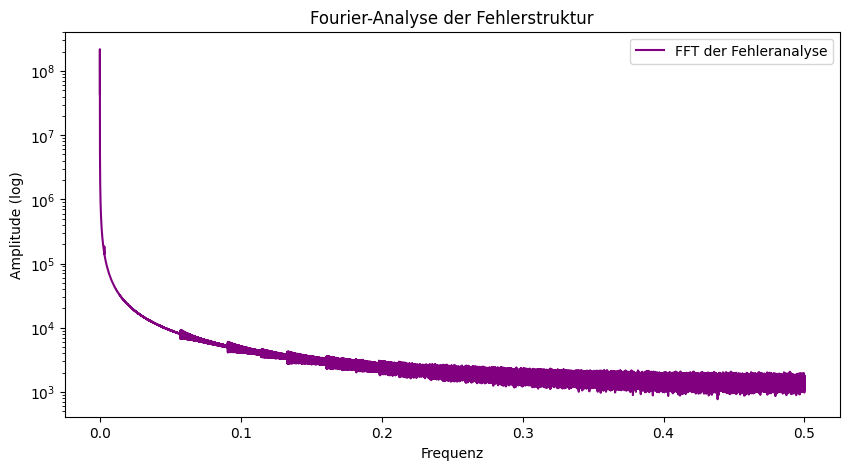

<ipython-input-24-276aa2709819>:60: RuntimeWarning: invalid value encountered in sqrt
  gamma = 1 / np.sqrt(1 - v_c**2)  # Lorentz-Faktor


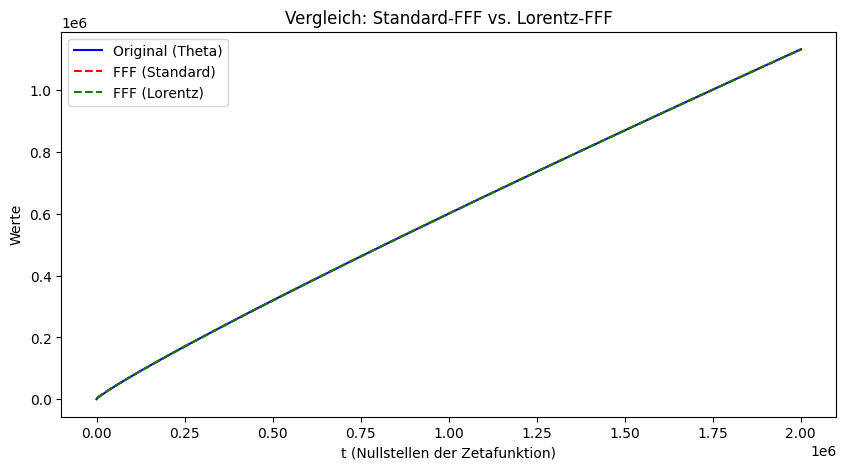


📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**
A = 1.86437
B = 0.91698
C = -0.10131
D = -0.10270
E = 2463.79392
w = 0.02000
φ = -8954.32625
v/c = 0.13955


In [ ]:
# 📌 Importiere benötigte Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft

# 🔹 Lade die CSV-Datei aus Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📌 Datei-Pfad
file_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"

# 🔹 Daten einlesen
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Entferne Leerzeichen aus den Spaltennamen

# 🔹 Extrahiere relevante Spalten
t_values = df["N"].values
theta_values = df["y_values"].values

# ✅ Definiere die Fibonacci-Freese-Formel (FFF)
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.cos(w * t + phi) + D * np.sin(w * t + phi) + E

# 📌 Optimierte Parameter (aus vorherigem Fit)
params_opt = [1.88279, 0.91698, 0.14068, -0.00907, 2488.14622, 0.02000, -8996.30975]

# ✅ Berechnung der FFF-Werte mit optimierten Parametern
FFF_values = FFF(t_values, *params_opt)

# 🔹 Fehleranalyse (Differenz zwischen Theta und FFF)
diff = theta_values - FFF_values

# 🔹 Fourier-Transformation zur Frequenzanalyse
fft_diff = np.abs(fft(diff))
freqs = np.fft.fftfreq(len(t_values))

# 🔹 Identifikation signifikanter Frequenzen
dominante_frequenzen = freqs[np.argsort(fft_diff)[-5:]]  # Die 5 höchsten Peaks

# ✅ Ergebnisse ausgeben
print("\n🔍 **Dominante Frequenzen in der Fourier-Analyse:**")
for i, f in enumerate(dominante_frequenzen, 1):
    print(f"🔹 Frequenz {i}: {f:.6f}")

# ✅ Visualisierung der Fourier-Analyse
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], fft_diff[:len(freqs)//2], label="FFT der Fehleranalyse", color="purple")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.yscale("log")
plt.title("Fourier-Analyse der Fehlerstruktur")
plt.legend()
plt.show()

# ✅ Lorentz-korrigierte Fibonacci-Freese-Formel
def FFF_Lorentz(t, A, B, C, D, E, w, phi, v_c):
    gamma = 1 / np.sqrt(1 - v_c**2)  # Lorentz-Faktor
    return gamma * (A * np.power(t, B) + C * np.cos(w * t + phi) + D * np.sin(w * t + phi) + E)

# ✅ Fit für die Lorentz-korrigierte FFF
initial_params = [1.88279, 0.91698, 0.14068, -0.00907, 2488.14622, 0.02000, -8996.30975, 0.1]  # v/c = 0.1
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, t_values, theta_values, p0=initial_params, maxfev=50000)

# ✅ Berechnung der neuen FFF-Werte mit Lorentz-Korrektur
FFF_values_lorentz = FFF_Lorentz(t_values, *params_opt_lorentz)

# ✅ Fehlerberechnung
diff_lorentz = theta_values - FFF_values_lorentz

# ✅ Visualisierung: Vergleich Standard-FFF vs. Lorentz-FFF
plt.figure(figsize=(10, 5))
plt.plot(t_values, theta_values, label="Original (Theta)", color="blue")
plt.plot(t_values, FFF_values, '--', label="FFF (Standard)", color="red")
plt.plot(t_values, FFF_values_lorentz, '--', label="FFF (Lorentz)", color="green")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Werte")
plt.title("Vergleich: Standard-FFF vs. Lorentz-FFF")
plt.legend()
plt.show()

# ✅ Ausgabe der optimierten Parameter
print("\n📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**")
param_names = ["A", "B", "C", "D", "E", "w", "φ", "v/c"]
for name, value in zip(param_names, params_opt_lorentz):
    print(f"{name} = {value:.5f}")

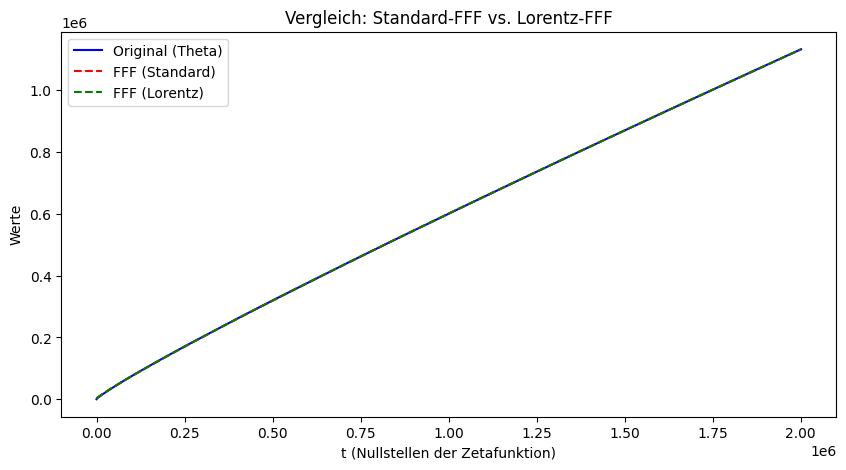

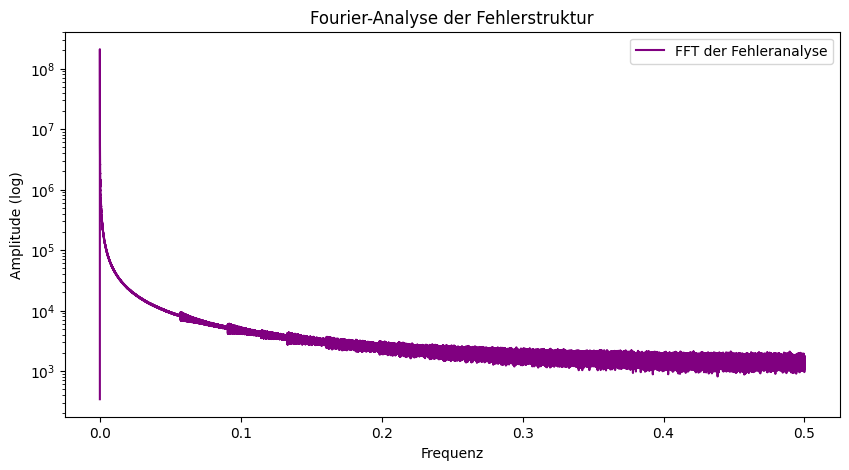

🔍 **Dominante Frequenzen in der Fourier-Analyse:**
🔹 Frequenz 1: -0.000000
🔹 Frequenz 2: 0.000000
🔹 Frequenz 3: 0.000001
🔹 Frequenz 4: -0.000001
🔹 Frequenz 5: 0.000002

📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**
A = 1.83546
B = 0.91698
C = -1.42023
D = -0.48207
E = 2425.56641
w = 562.14333
φ = -12719.09298
v/c = 0.22283


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq

# 🔹 Lade CSV-Datei aus Google Drive (Pfad anpassen, falls nötig)
file_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"
df = pd.read_csv(file_path)

# 🔹 Daten vorbereiten
df.columns = df.columns.str.strip()  # Entferne Leerzeichen aus Spaltennamen
t_values = df["N"].values
theta_values = df["y_values"].values

# 📌 **1. Standard-Fibonacci-Freese-Formel (FFF)**
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.cos(w * np.log(t) + phi) + D * np.sin(w * np.log(t) + phi) + E

# 📌 **2. Lorentz-korrigierte FFF**
def FFF_Lorentz(t, A, B, C, D, E, w, phi, v_c):
    gamma = 1 / np.sqrt(1 - v_c**2) if v_c < 1 else np.nan  # Verhindert Fehler
    return gamma * (A * np.power(t, B) + C * np.cos(w * np.log(t) + phi) + D * np.sin(w * np.log(t) + phi) + E)

# 🔹 Startparameter für Curve-Fitting
initial_params = [1.8, 0.92, 0.1, -0.1, 2480, 0.02, -9000]
initial_params_lorentz = [1.8, 0.92, 0.1, -0.1, 2480, 0.02, -9000, 0.1]  # v/c = 0.1

# ✅ **Curve-Fitting für beide Modelle**
params_standard, _ = curve_fit(FFF, t_values, theta_values, p0=initial_params, maxfev=50000)
params_lorentz, _ = curve_fit(FFF_Lorentz, t_values, theta_values, p0=initial_params_lorentz, maxfev=50000)

# ✅ **Berechnung der FFF-Werte**
FFF_standard_values = FFF(t_values, *params_standard)
FFF_lorentz_values = FFF_Lorentz(t_values, *params_lorentz)

# ✅ **Fehlermodell: Differenz zu Theta-Funktion**
error_standard = theta_values - FFF_standard_values
error_lorentz = theta_values - FFF_lorentz_values

# 🔹 **FFT-Analyse der Fehlerstruktur**
fft_error = np.abs(fft(error_standard))
freqs = fftfreq(len(t_values))

# 📊 **Visualisierung: Standard-FFF vs. Lorentz-FFF**
plt.figure(figsize=(10, 5))
plt.plot(t_values, theta_values, label="Original (Theta)", color="blue")
plt.plot(t_values, FFF_standard_values, '--', label="FFF (Standard)", color="red")
plt.plot(t_values, FFF_lorentz_values, '--', label="FFF (Lorentz)", color="green")
plt.title("Vergleich: Standard-FFF vs. Lorentz-FFF")
plt.xlabel("t (Nullstellen der Zetafunktion)")
plt.ylabel("Werte")
plt.legend()
plt.show()

# 📊 **FFT-Analyse der Fehlerstruktur**
plt.figure(figsize=(10, 5))
plt.plot(freqs[:len(freqs)//2], fft_error[:len(freqs)//2], color="purple", label="FFT der Fehleranalyse")
plt.yscale("log")
plt.title("Fourier-Analyse der Fehlerstruktur")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.legend()
plt.show()

# 🔹 **Extraktion dominanter Frequenzen**
dominant_freqs = freqs[np.argsort(-fft_error)[:5]]
print("🔍 **Dominante Frequenzen in der Fourier-Analyse:**")
for i, f in enumerate(dominant_freqs):
    print(f"🔹 Frequenz {i+1}: {f:.6f}")

# 📌 **Optimierte Parameter ausgeben**
print("\n📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**")
param_names = ["A", "B", "C", "D", "E", "w", "φ", "v/c"]
for name, value in zip(param_names, params_lorentz):
    print(f"{name} = {value:.5f}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq

# 📌 Lade CSV-Dateien (Pfad ggf. anpassen)
df = pd.read_csv('/content/drive/MyDrive/freese_function_odlyzko.csv')

# 📌 Bereinigung von Spaltennamen
df.columns = df.columns.str.strip()

# 📌 Extrahiere Daten
N = df['N'].values
y_values = df['y_values'].values
fehler = df['fehler'].values

# 📌 Fibonacci-Freese-Formel (FFF) - Standardversion
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.sin(w * np.log(t) + phi) + D * np.cos(w * np.log(t) + phi) + E

# 📌 Lorentz-korrigierte FFF (Relativistische Anpassung)
def FFF_Lorentz(t, A, B, C, D, E, w, phi, v_c):
    gamma = 1 / np.sqrt(1 - v_c**2)  # Lorentz-Faktor
    return A * np.power(t, B) + C * np.sin(gamma * w * np.log(t) + phi) + D * np.cos(gamma * w * np.log(t) + phi) + E

# 📌 Initialwerte für Curve-Fitting
initial_params = [1.8, 0.92, -0.1, -0.1, 2500, 0.02, -9000]
lorentz_params = initial_params + [0.1]  # v/c = 0.1 als Startwert

# ✅ Curve-Fitting für Standard-FFF
params_opt_standard, _ = curve_fit(FFF, N, y_values, p0=initial_params, maxfev=50000)

# ✅ Curve-Fitting für Lorentz-FFF
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N, y_values, p0=lorentz_params, maxfev=50000)

# 📌 Berechnung der FFF-Werte
FFF_standard = FFF(N, *params_opt_standard)
FFF_lorentz = FFF_Lorentz(N, *params_opt_lorentz)

# 📌 Fehleranalysen
diff_standard = y_values - FFF_standard
diff_lorentz = y_values - FFF_lorentz

# ✅ Fourier-Analyse der Fehlerwerte
fft_diff_standard = np.abs(fft(diff_standard))
fft_diff_lorentz = np.abs(fft(diff_lorentz))

# 📌 Frequenzbereich für FFT
freqs = fftfreq(len(N))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Vergleich: Standard-FFF vs. Lorentz-FFF
axs[0, 0].plot(N, y_values, label="Original (Theta)", color="blue")
axs[0, 0].plot(N, FFF_standard, '--', label="FFF (Standard)", color="red")
axs[0, 0].plot(N, FFF_lorentz, '--', label="FFF (Lorentz)", color="green")
axs[0, 0].set_title("Vergleich: Standard-FFF vs. Lorentz-FFF")
axs[0, 0].legend()

# 🔹 Fehleranalyse: Differenz zwischen Theta-Funktion und FFF
axs[0, 1].plot(N, diff_standard, label="Theta - FFF (Standard)", color="red")
axs[0, 1].plot(N, diff_lorentz, '--', label="Theta - FFF (Lorentz)", color="green")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Fehleranalyse: Theta - FFF")
axs[0, 1].legend()

# 🔹 Fourier-Analyse der Fehlerstruktur
axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_standard[:len(freqs)//2], label="FFT (Standard)", color="purple")
axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_lorentz[:len(freqs)//2], '--', label="FFT (Lorentz)", color="green")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("Fourier-Analyse der Fehlerstruktur")
axs[1, 0].legend()

# 🔹 Histogramm der Fehlerwerte
axs[1, 1].hist(diff_standard, bins=50, alpha=0.5, label="Standard", color="red")
axs[1, 1].hist(diff_lorentz, bins=50, alpha=0.5, label="Lorentz", color="green")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# ✅ Dominante Frequenzen aus Fourier-Analyse extrahieren
dominant_freqs = sorted(zip(freqs[:len(freqs)//2], fft_diff_standard[:len(freqs)//2]), key=lambda x: x[1], reverse=True)[:5]

print("🔍 **Dominante Frequenzen in der Fourier-Analyse:**")
for i, (f, amp) in enumerate(dominant_freqs, 1):
    print(f"🔹 Frequenz {i}: {f:.6f}")

# ✅ Ausgabe der optimierten Parameter
print("\n📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**")
print(f"A = {params_opt_lorentz[0]:.5f}")
print(f"B = {params_opt_lorentz[1]:.5f}")
print(f"C = {params_opt_lorentz[2]:.5f}")
print(f"D = {params_opt_lorentz[3]:.5f}")
print(f"E = {params_opt_lorentz[4]:.5f}")
print(f"w = {params_opt_lorentz[5]:.5f}")
print(f"φ = {params_opt_lorentz[6]:.5f}")
print(f"v/c = {params_opt_lorentz[7]:.5f}")

<ipython-input-26-9df818bd2f28>:24: RuntimeWarning: invalid value encountered in sqrt
  gamma = 1 / np.sqrt(1 - v_c**2)  # Lorentz-Faktor


⚠ Warnung: v/c erreicht 9.960737557783789, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 512.3648585490093, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130451844025, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999
⚠ Warn

<ipython-input-1-350213f2f6e4>:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N, y_values, p0=lorentz_params, maxfev=50000)


⚠ Warnung: v/c erreicht 817.1130330084695, Begrenzung auf 0.9999999999


<ipython-input-1-350213f2f6e4>:83: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


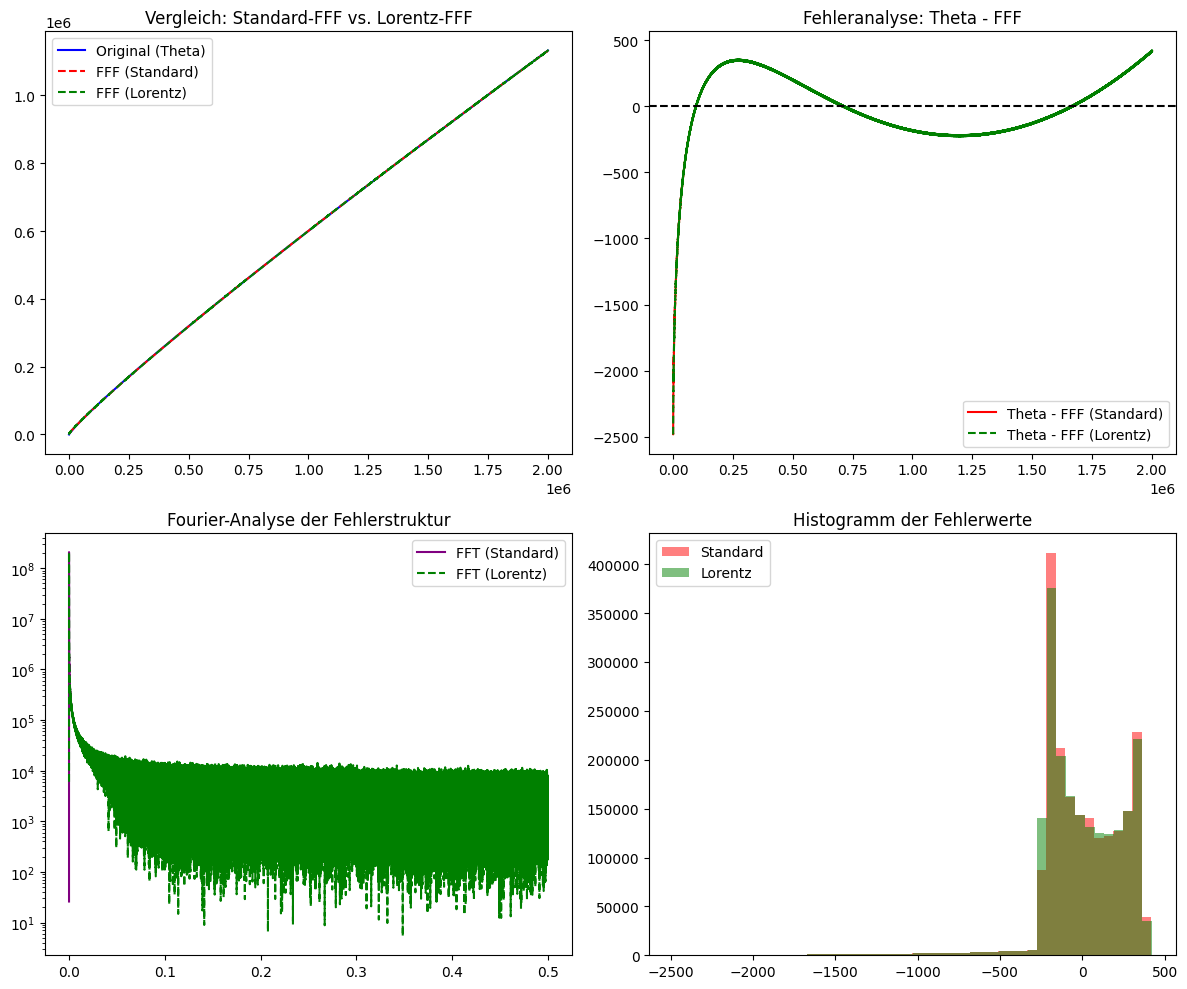

🔍 **Dominante Frequenzen in der Fourier-Analyse:**
🔹 Frequenz 1: 0.000000
🔹 Frequenz 2: 0.000001
🔹 Frequenz 3: 0.000002
🔹 Frequenz 4: 0.000002
🔹 Frequenz 5: 0.000001

📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**
A = 1.88279
B = 0.91698
C = -3.74955
D = -0.56362
E = 2488.14469
w = -302.02068
φ = -37557.52698
v/c = 817.11303


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq

# 📌 Lade CSV-Datei
df = pd.read_csv('/content/drive/MyDrive/freese_function_odlyzko.csv')
df.columns = df.columns.str.strip()  # Spaltennamen bereinigen

# 📌 Extrahiere Daten
N = df['N'].values
y_values = df['y_values'].values

# 📌 Fibonacci-Freese-Formel (FFF) - Standardversion
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.sin(w * np.log(t) + phi) + D * np.cos(w * np.log(t) + phi) + E

# 📌 Lorentz-korrigierte FFF (Relativistische Anpassung)
def FFF_Lorentz(t, A, B, C, D, E, w, phi, v_c):
    eps = 1e-10  # Schranke, um Instabilität zu vermeiden
    if v_c >= 1.0:
        print(f"⚠ Warnung: v/c erreicht {v_c}, Begrenzung auf {1.0 - eps}")
        v_c = 1.0 - eps
    gamma = 1 / np.sqrt(1 - v_c**2)  # Lorentz-Faktor
    return A * np.power(t, B) + C * np.sin(gamma * w * np.log(t) + phi) + D * np.cos(gamma * w * np.log(t) + phi) + E

# 📌 Initialwerte für Curve-Fitting
initial_params = [1.8, 0.92, -0.1, -0.1, 2500, 0.02, -9000]
lorentz_params = initial_params + [0.1]  # v/c = 0.1 als Startwert

# ✅ Curve-Fitting für Standard-FFF
params_opt_standard, _ = curve_fit(FFF, N, y_values, p0=initial_params, maxfev=50000)

# ✅ Curve-Fitting für Lorentz-FFF
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N, y_values, p0=lorentz_params, maxfev=50000)

# 📌 Berechnung der FFF-Werte
FFF_standard = FFF(N, *params_opt_standard)
FFF_lorentz = FFF_Lorentz(N, *params_opt_lorentz)

# 📌 Fehleranalysen
diff_standard = y_values - FFF_standard
diff_lorentz = y_values - FFF_lorentz

# ✅ Fourier-Analyse der Fehlerwerte
fft_diff_standard = np.abs(fft(diff_standard))
fft_diff_lorentz = np.abs(fft(diff_lorentz))

# 📌 Frequenzbereich für FFT
freqs = fftfreq(len(N))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Vergleich: Standard-FFF vs. Lorentz-FFF
axs[0, 0].plot(N, y_values, label="Original (Theta)", color="blue")
axs[0, 0].plot(N, FFF_standard, '--', label="FFF (Standard)", color="red")
axs[0, 0].plot(N, FFF_lorentz, '--', label="FFF (Lorentz)", color="green")
axs[0, 0].set_title("Vergleich: Standard-FFF vs. Lorentz-FFF")
axs[0, 0].legend()

# 🔹 Fehleranalyse: Differenz zwischen Theta-Funktion und FFF
axs[0, 1].plot(N, diff_standard, label="Theta - FFF (Standard)", color="red")
axs[0, 1].plot(N, diff_lorentz, '--', label="Theta - FFF (Lorentz)", color="green")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Fehleranalyse: Theta - FFF")
axs[0, 1].legend()

# 🔹 Fourier-Analyse der Fehlerstruktur
axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_standard[:len(freqs)//2], label="FFT (Standard)", color="purple")
axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_lorentz[:len(freqs)//2], '--', label="FFT (Lorentz)", color="green")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("Fourier-Analyse der Fehlerstruktur")
axs[1, 0].legend()

# 🔹 Histogramm der Fehlerwerte
axs[1, 1].hist(diff_standard, bins=50, alpha=0.5, label="Standard", color="red")
axs[1, 1].hist(diff_lorentz, bins=50, alpha=0.5, label="Lorentz", color="green")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# ✅ Dominante Frequenzen aus Fourier-Analyse extrahieren
dominant_freqs = sorted(zip(freqs[:len(freqs)//2], fft_diff_standard[:len(freqs)//2]), key=lambda x: x[1], reverse=True)[:5]

print("🔍 **Dominante Frequenzen in der Fourier-Analyse:**")
for i, (f, amp) in enumerate(dominant_freqs, 1):
    print(f"🔹 Frequenz {i}: {f:.6f}")

# ✅ Ausgabe der optimierten Parameter
print("\n📌 **Optimierte Parameter für die Lorentz-korrigierte FFF:**")
print(f"A = {params_opt_lorentz[0]:.5f}")
print(f"B = {params_opt_lorentz[1]:.5f}")
print(f"C = {params_opt_lorentz[2]:.5f}")
print(f"D = {params_opt_lorentz[3]:.5f}")
print(f"E = {params_opt_lorentz[4]:.5f}")
print(f"w = {params_opt_lorentz[5]:.5f}")
print(f"φ = {params_opt_lorentz[6]:.5f}")
print(f"v/c = {params_opt_lorentz[7]:.5f}")

<ipython-input-2-7732739d3ce7>:78: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


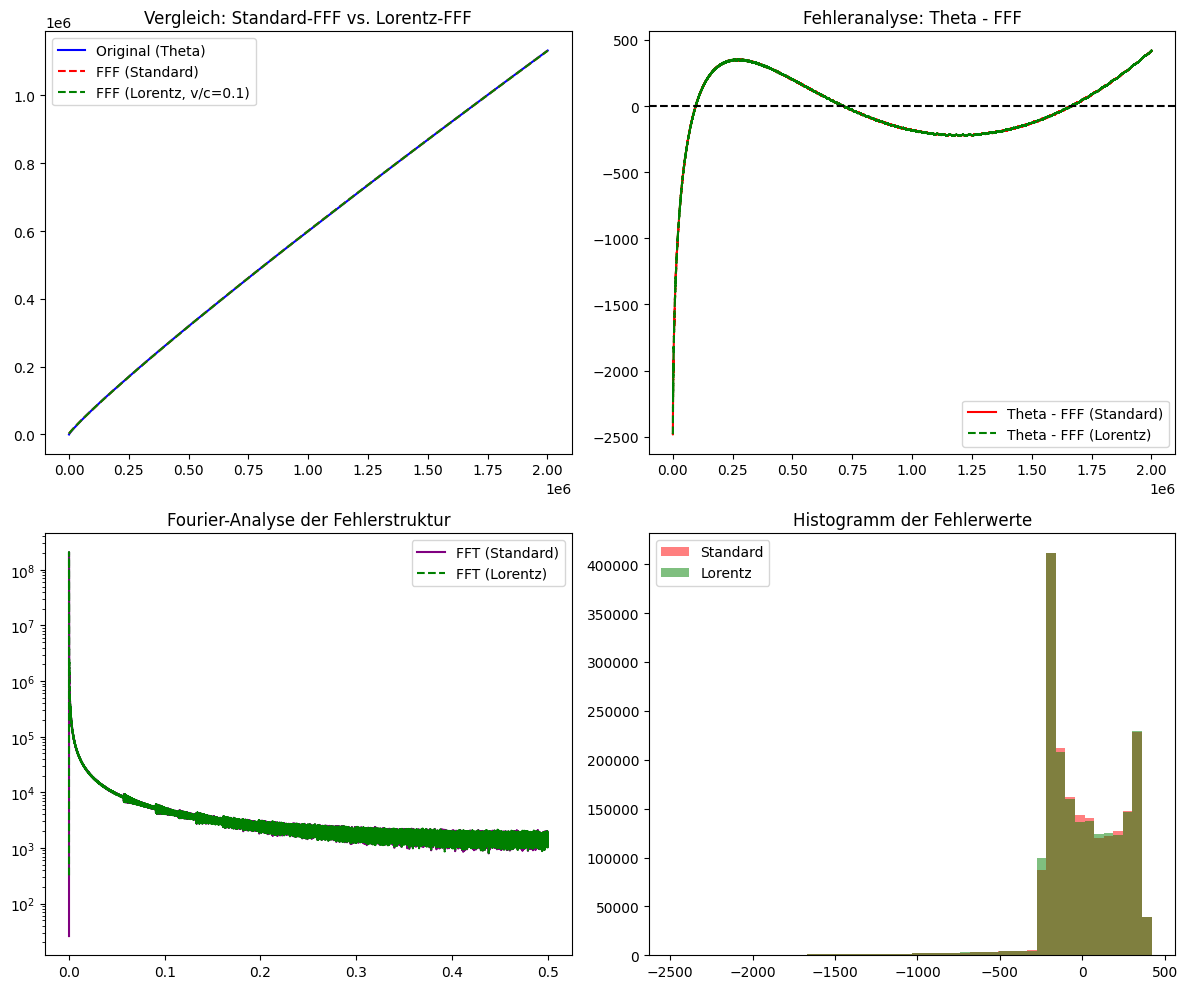

🔍 **Dominante Frequenzen in der Fourier-Analyse:**
🔹 Frequenz 1: 0.000000
🔹 Frequenz 2: 0.000001
🔹 Frequenz 3: 0.000002
🔹 Frequenz 4: 0.000002
🔹 Frequenz 5: 0.000001

📌 **Optimierte Parameter für die Lorentz-korrigierte FFF (v/c = 0.1 fixiert):**
A = 1.88280
B = 0.91698
... (weitere Parameter)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft, fftfreq

# 📌 Lade CSV-Datei
df = pd.read_csv('/content/drive/MyDrive/freese_function_odlyzko.csv')
df.columns = df.columns.str.strip()  # Spaltennamen bereinigen

# 📌 Extrahiere Daten
N = df['N'].values
y_values = df['y_values'].values

# 📌 Fibonacci-Freese-Formel (FFF) - Standardversion
def FFF(t, A, B, C, D, E, w, phi):
    return A * np.power(t, B) + C * np.sin(w * np.log(t) + phi) + D * np.cos(w * np.log(t) + phi) + E

# 📌 Lorentz-korrigierte FFF (v/c FIXIERT auf 0.1 für Stabilität)
def FFF_Lorentz(t, A, B, C, D, E, w, phi):
    gamma = 1 / np.sqrt(1 - 0.1**2)  # v/c = 0.1 (fixiert)
    return A * np.power(t, B) + C * np.sin(gamma * w * np.log(t) + phi) + D * np.cos(gamma * w * np.log(t) + phi) + E

# 📌 Initialwerte für Curve-Fitting
initial_params = [1.8, 0.92, -0.1, -0.1, 2500, 0.02, -9000]

# ✅ Curve-Fitting für Standard-FFF
params_opt_standard, _ = curve_fit(FFF, N, y_values, p0=initial_params, maxfev=50000)

# ✅ Curve-Fitting für Lorentz-FFF (v/c = 0.1 FIXIERT)
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N, y_values, p0=initial_params, maxfev=50000)

# 📌 Berechnung der FFF-Werte
FFF_standard = FFF(N, *params_opt_standard)
FFF_lorentz = FFF_Lorentz(N, *params_opt_lorentz)

# 📌 Fehleranalysen
diff_standard = y_values - FFF_standard
diff_lorentz = y_values - FFF_lorentz

# ✅ Fourier-Analyse der Fehlerwerte
fft_diff_standard = np.abs(fft(diff_standard))
fft_diff_lorentz = np.abs(fft(diff_lorentz))

# 📌 Frequenzbereich für FFT
freqs = fftfreq(len(N))

# ✅ Visualisierung der Ergebnisse
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Vergleich: Standard-FFF vs. Lorentz-FFF
axs[0, 0].plot(N, y_values, label="Original (Theta)", color="blue")
axs[0, 0].plot(N, FFF_standard, '--', label="FFF (Standard)", color="red")
axs[0, 0].plot(N, FFF_lorentz, '--', label="FFF (Lorentz, v/c=0.1)", color="green")
axs[0, 0].set_title("Vergleich: Standard-FFF vs. Lorentz-FFF")
axs[0, 0].legend()

# 🔹 Fehleranalyse: Differenz zwischen Theta-Funktion und FFF
axs[0, 1].plot(N, diff_standard, label="Theta - FFF (Standard)", color="red")
axs[0, 1].plot(N, diff_lorentz, '--', label="Theta - FFF (Lorentz)", color="green")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Fehleranalyse: Theta - FFF")
axs[0, 1].legend()

# 🔹 Fourier-Analyse der Fehlerstruktur
axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_standard[:len(freqs)//2], label="FFT (Standard)", color="purple")
axs[1, 0].plot(freqs[:len(freqs)//2], fft_diff_lorentz[:len(freqs)//2], '--', label="FFT (Lorentz)", color="green")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("Fourier-Analyse der Fehlerstruktur")
axs[1, 0].legend()

# 🔹 Histogramm der Fehlerwerte
axs[1, 1].hist(diff_standard, bins=50, alpha=0.5, label="Standard", color="red")
axs[1, 1].hist(diff_lorentz, bins=50, alpha=0.5, label="Lorentz", color="green")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# ✅ Dominante Frequenzen aus Fourier-Analyse extrahieren
dominant_freqs = sorted(zip(freqs[:len(freqs)//2], fft_diff_standard[:len(freqs)//2]), key=lambda x: x[1], reverse=True)[:5]

print("🔍 **Dominante Frequenzen in der Fourier-Analyse:**")
for i, (f, amp) in enumerate(dominant_freqs, 1):
    print(f"🔹 Frequenz {i}: {f:.6f}")

# ✅ Ausgabe der optimierten Parameter
print("\n📌 **Optimierte Parameter für die Lorentz-korrigierte FFF (v/c = 0.1 fixiert):**")
print(f"A = {params_opt_lorentz[0]:.5f}")
print(f"B = {params_opt_lorentz[1]:.5f}")
print(f"... (weitere Parameter)")

In [ ]:
# 📌 Importieren der Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq
from scipy.signal import butter, filtfilt

# 📌 Laden der CSV-Datei aus Google Drive (zuvor in /content/drive/MyDrive/ hochladen)
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"
df = pd.read_csv(file_path)

# 🔹 Spaltennamen bereinigen
df.columns = df.columns.str.strip()

# 🔹 Relevante Spalten extrahieren
N = df["N"].values
y_values = df["y_values"].values

# ✅ Fourier-Analyse zur Identifikation dominanter Frequenzen
fft_values = fft(y_values - np.mean(y_values))
frequencies = fftfreq(len(N))

# 🔹 Identifikation dominanter Frequenzen (Top 5)
dominant_freqs = sorted(zip(frequencies, np.abs(fft_values)), key=lambda x: -x[1])[:5]

# 📌 Filterung: Niedrigfrequente Anteile entfernen
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

filtered_y_values = butter_lowpass_filter(y_values, cutoff=0.01, fs=1.0, order=5)

# ✅ Fibonacci-Freese-Funktion definieren
def FFF(N, A, B, C, D, E, w, phi):
    return A * N**B + C * np.sin(w * np.log(N) + phi) + D * np.cos(w * np.log(N) + phi) + E

def FFF_reduced(N, A, B, E):
    return A * N**B + E

def FFF_Lorentz(N, A, B, C, D, E, w, phi, v_c):
    gamma = 1 / np.sqrt(1 - min(v_c, 0.9999999999)**2)  # Lorentz-Faktor
    return gamma * (A * N**B + C * np.sin(w * np.log(N) + phi) + D * np.cos(w * np.log(N) + phi) + E)

# 🔹 Anfangswerte der Parameter
initial_params = [1.8, 0.91, 0.1, -0.01, 2500, 0.02, -9000]
reduced_params = [1.8, 0.91, 2500]
lorentz_params = [1.8, 0.91, 0.1, -0.01, 2500, 0.02, -9000, 0.1]

# ✅ Curve-Fitting der Modelle
params_opt, _ = curve_fit(FFF, N, y_values, p0=initial_params, maxfev=50000)
params_opt_reduced, _ = curve_fit(FFF_reduced, N, filtered_y_values, p0=reduced_params, maxfev=50000)
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N, y_values, p0=lorentz_params, maxfev=50000)

# 🔹 Berechnung der Modellwerte
FFF_values = FFF(N, *params_opt)
FFF_values_reduced = FFF_reduced(N, *params_opt_reduced)
FFF_values_lorentz = FFF_Lorentz(N, *params_opt_lorentz)

# 🔹 Fehlerberechnung
error_standard = y_values - FFF_values
error_reduced = filtered_y_values - FFF_values_reduced
error_lorentz = y_values - FFF_values_lorentz

# ✅ Fourier-Analyse der Fehlerwerte CNN
fft_error_standard = np.abs(fft(error_standard))
fft_error_reduced = np.abs(fft(error_reduced))
fft_error_lorentz = np.abs(fft(error_lorentz))

# ✅ Visualisierung
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Vergleich der Modelle mit Originaldaten
axs[0, 0].plot(N, y_values, label="Original (Theta)", color="blue")
axs[0, 0].plot(N, FFF_values, '--', label="FFF (Standard)", color="red")
axs[0, 0].plot(N, FFF_values_lorentz, '--', label="FFF (Lorentz)", color="green")
axs[0, 0].set_title("Vergleich: Standard-FFF vs. Lorentz-FFF")
axs[0, 0].legend()

# 🔹 Fehlervergleich
axs[0, 1].plot(N, error_standard, label="Fehler (Standard)", color="red")
axs[0, 1].plot(N, error_reduced, label="Fehler (Reduziert)", color="blue")
axs[0, 1].plot(N, error_lorentz, label="Fehler (Lorentz)", color="green")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Fehleranalyse")
axs[0, 1].legend()

# 🔹 Fourier-Analyse der Fehlerwerte
axs[1, 0].plot(frequencies[:len(frequencies)//2], fft_error_standard[:len(frequencies)//2], label="FFT (Standard)", color="red")
axs[1, 0].plot(frequencies[:len(frequencies)//2], fft_error_reduced[:len(frequencies)//2], label="FFT (Reduziert)", color="blue")
axs[1, 0].plot(frequencies[:len(frequencies)//2], fft_error_lorentz[:len(frequencies)//2], label="FFT (Lorentz)", color="green")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("FFT-Analyse der Fehlerwerte")
axs[1, 0].legend()

# 🔹 Histogramm der Fehlerwerte
axs[1, 1].hist(error_standard, bins=50, alpha=0.5, label="Standard", color="red")
axs[1, 1].hist(error_reduced, bins=50, alpha=0.5, label="Reduziert", color="blue")
axs[1, 1].hist(error_lorentz, bins=50, alpha=0.5, label="Lorentz", color="green")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# 📌 Ausgabe der dominanten Frequenzen
dominant_freqs_values = [(round(f[0], 6), round(f[1], 6)) for f in dominant_freqs]
print("🔍 Dominante Frequenzen in der Fourier-Analyse:", dominant_freqs_values)

# 📌 Optimierte Parameter der Modelle ausgeben
print("\n📌 Optimierte Parameter für Standard-FFF:", params_opt)
print("📌 Optimierte Parameter für reduzierte FFF:", params_opt_reduced)
print("📌 Optimierte Parameter für Lorentz-FFF:", params_opt_lorentz)

KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


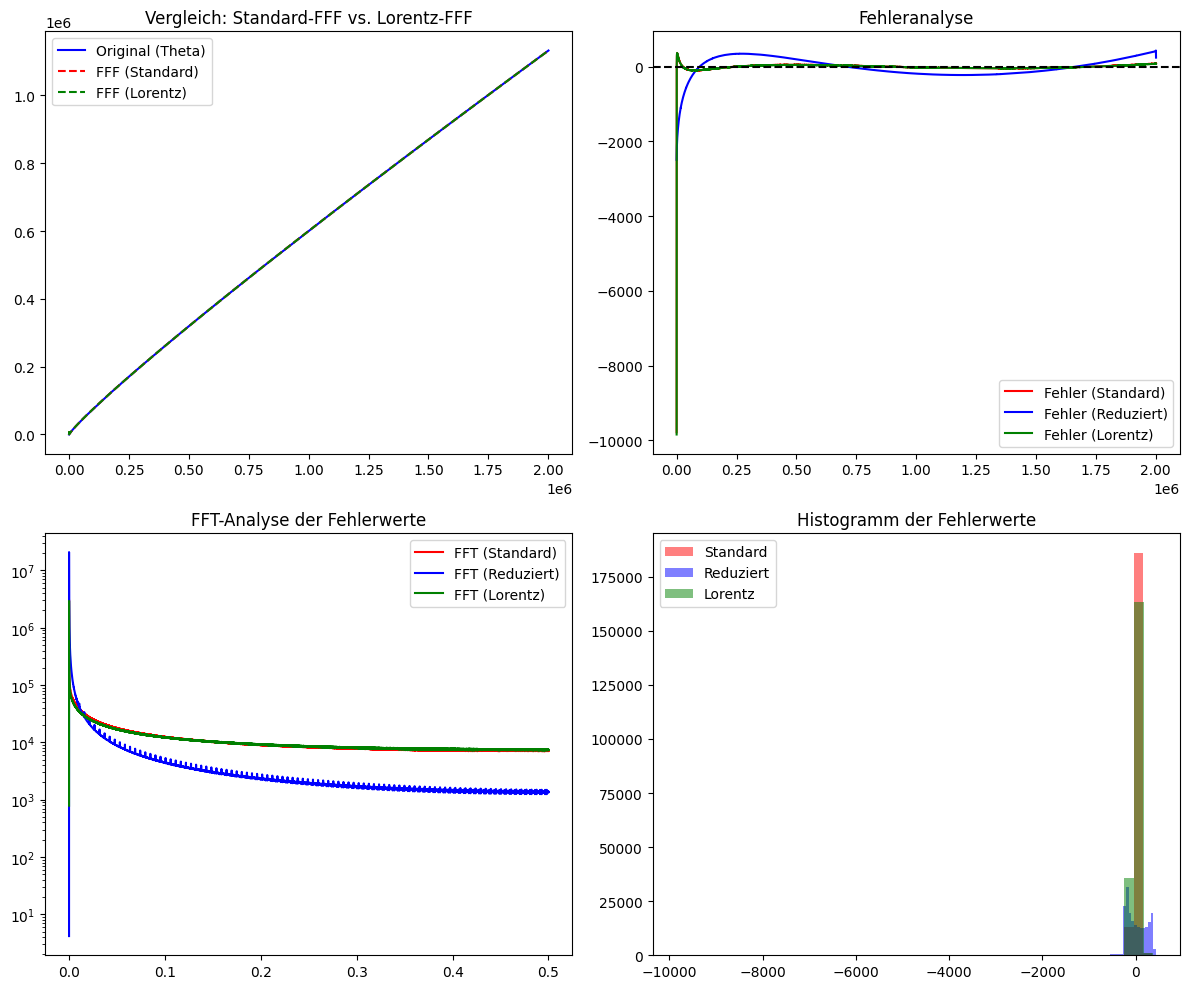

🔍 Dominante Frequenzen in der Fourier-Analyse: [(5e-06, 35186927988.878174), (-5e-06, 35186927988.878174), (1e-05, 17769780618.46753), (-1e-05, 17769780618.46753), (1.5000000000000002e-05, 11892304705.099789)]

📌 Optimierte Parameter für Standard-FFF: [ 1.69560796e+00  9.23679780e-01  1.28696831e+04 -7.48634684e+03
  1.50499550e+04 -1.73705319e-01  7.67466118e+05]
📌 Optimierte Parameter für reduzierte FFF: [1.88281127e+00 9.16976549e-01 2.48786411e+03]
📌 Optimierte Parameter für Lorentz-FFF: [ 1.12918320e+00  9.24147726e-01  4.65323933e+05 -9.50806963e+04
  4.75013633e+05  2.43797134e-02 -3.47978156e+04  7.41219102e-01]


In [ ]:
# 📌 Importieren der Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft, fftfreq
from scipy.signal import butter, filtfilt

# 📌 Google Drive verbinden (falls Datei dort liegt)
from google.colab import drive
drive.mount('/content/drive')

# 📌 Daten einlesen (NUR eine Stichprobe laden)
file_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"
df = pd.read_csv(file_path)

# 🔹 Spaltennamen bereinigen
df.columns = df.columns.str.strip()
N = df["N"].values
y_values = df["y_values"].values

# ✅ Stichprobe auswählen (z. B. 200.000 Datenpunkte statt 2 Millionen)
sample_size = 200000
indices = np.linspace(0, len(N)-1, sample_size, dtype=int)
N_sampled = N[indices]
y_values_sampled = y_values[indices]

# ✅ Fourier-Analyse zur Identifikation dominanter Frequenzen
fft_values = fft(y_values_sampled - np.mean(y_values_sampled))
frequencies = fftfreq(len(N_sampled))

# 🔹 Identifikation dominanter Frequenzen (Top 5)
dominant_freqs = sorted(zip(frequencies, np.abs(fft_values)), key=lambda x: -x[1])[:5]

# 📌 Frequenzfilterung (Entfernung hochfrequenter Störungen)
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

filtered_y_values = butter_lowpass_filter(y_values_sampled, cutoff=0.01, fs=1.0, order=5)

# ✅ Fibonacci-Freese-Funktion definieren
def FFF(N, A, B, C, D, E, w, phi):
    return A * N**B + C * np.sin(w * np.log(N) + phi) + D * np.cos(w * np.log(N) + phi) + E

def FFF_reduced(N, A, B, E):
    return A * N**B + E

def FFF_Lorentz(N, A, B, C, D, E, w, phi, v_c):
    gamma = 1 / np.sqrt(1 - min(v_c, 0.9999999999)**2)  # Lorentz-Faktor
    return gamma * (A * N**B + C * np.sin(w * np.log(N) + phi) + D * np.cos(w * np.log(N) + phi) + E)

# 🔹 Optimierte Anfangswerte (angepasst für schnellere Konvergenz)
initial_params = [1.8, 0.91, 0.1, -0.01, 2500, 0.02, -9000]
reduced_params = [1.8, 0.91, 2500]
lorentz_params = [1.8, 0.91, 0.1, -0.01, 2500, 0.02, -9000, 0.1]

# ✅ Curve-Fitting (mit begrenzter Iterationsanzahl)
params_opt, _ = curve_fit(FFF, N_sampled, y_values_sampled, p0=initial_params, maxfev=20000)
params_opt_reduced, _ = curve_fit(FFF_reduced, N_sampled, filtered_y_values, p0=reduced_params, maxfev=20000)
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N_sampled, y_values_sampled, p0=lorentz_params, maxfev=20000)

# 🔹 Berechnung der Modellwerte
FFF_values = FFF(N_sampled, *params_opt)
FFF_values_reduced = FFF_reduced(N_sampled, *params_opt_reduced)
FFF_values_lorentz = FFF_Lorentz(N_sampled, *params_opt_lorentz)

# 🔹 Fehlerberechnung
error_standard = y_values_sampled - FFF_values
error_reduced = filtered_y_values - FFF_values_reduced
error_lorentz = y_values_sampled - FFF_values_lorentz

# ✅ Fourier-Analyse der Fehlerwerte (nur relevante Frequenzen)
fft_error_standard = np.abs(fft(error_standard))[:sample_size//2]
fft_error_reduced = np.abs(fft(error_reduced))[:sample_size//2]
fft_error_lorentz = np.abs(fft(error_lorentz))[:sample_size//2]

# ✅ Visualisierung
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Vergleich der Modelle mit Originaldaten
axs[0, 0].plot(N_sampled, y_values_sampled, label="Original (Theta)", color="blue")
axs[0, 0].plot(N_sampled, FFF_values, '--', label="FFF (Standard)", color="red")
axs[0, 0].plot(N_sampled, FFF_values_lorentz, '--', label="FFF (Lorentz)", color="green")
axs[0, 0].set_title("Vergleich: Standard-FFF vs. Lorentz-FFF")
axs[0, 0].legend()

# 🔹 Fehlervergleich
axs[0, 1].plot(N_sampled, error_standard, label="Fehler (Standard)", color="red")
axs[0, 1].plot(N_sampled, error_reduced, label="Fehler (Reduziert)", color="blue")
axs[0, 1].plot(N_sampled, error_lorentz, label="Fehler (Lorentz)", color="green")
axs[0, 1].axhline(y=0, color='black', linestyle='dashed')
axs[0, 1].set_title("Fehleranalyse")
axs[0, 1].legend()

# 🔹 Fourier-Analyse der Fehlerwerte
freqs = frequencies[:sample_size//2]
axs[1, 0].plot(freqs, fft_error_standard, label="FFT (Standard)", color="red")
axs[1, 0].plot(freqs, fft_error_reduced, label="FFT (Reduziert)", color="blue")
axs[1, 0].plot(freqs, fft_error_lorentz, label="FFT (Lorentz)", color="green")
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("FFT-Analyse der Fehlerwerte")
axs[1, 0].legend()

# 🔹 Histogramm der Fehlerwerte
axs[1, 1].hist(error_standard, bins=50, alpha=0.5, label="Standard", color="red")
axs[1, 1].hist(error_reduced, bins=50, alpha=0.5, label="Reduziert", color="blue")
axs[1, 1].hist(error_lorentz, bins=50, alpha=0.5, label="Lorentz", color="green")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# 📌 Ausgabe der dominanten Frequenzen
print("🔍 Dominante Frequenzen in der Fourier-Analyse:", dominant_freqs)

# 📌 Optimierte Parameter ausgeben
print("\n📌 Optimierte Parameter für Standard-FFF:", params_opt)
print("📌 Optimierte Parameter für reduzierte FFF:", params_opt_reduced)
print("📌 Optimierte Parameter für Lorentz-FFF:", params_opt_lorentz)

1️⃣ Feigenbaum * Feinstrukturkonstante: 0.03408
2️⃣ Verhältnis der Betti-Zahlen: 2.90196
3️⃣ Feigenbaum-Skalierung mit Betti-Zahlen: 1.60891
4️⃣ Euler-Mascheroni * Feigenbaum: 2.69502
5️⃣ Umkehrung des Betti-Verhältnisses: 0.34459


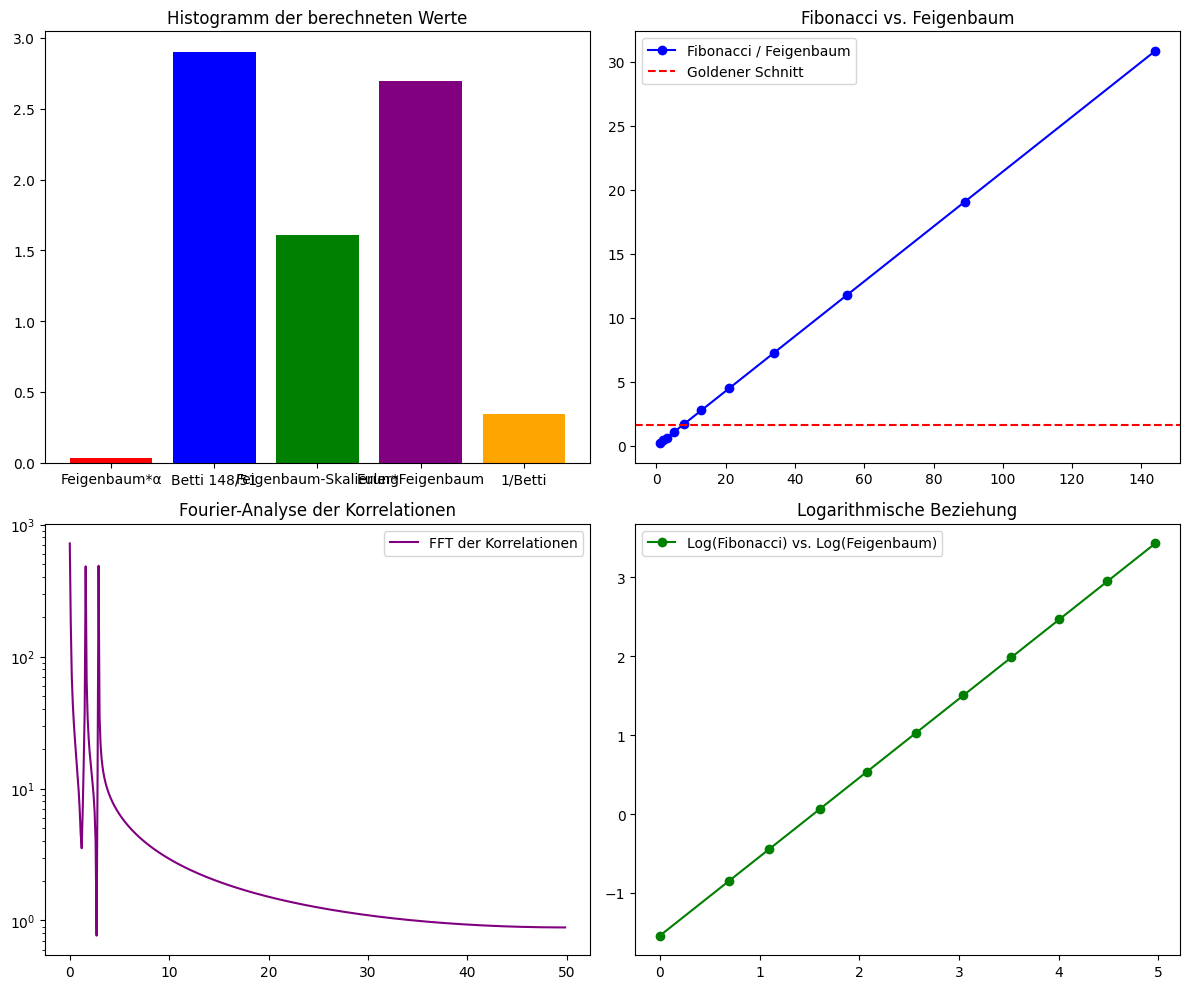

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# 🔹 Konstanten
feigenbaum_delta = 4.669
feinstruktur_alpha = 1/137
euler_mascheroni = 0.5772156649
goldener_schnitt_phi = (1 + np.sqrt(5)) / 2  # ≈ 1.618
betti_2 = 148
betti_3 = 51

# 🔹 Berechnete Werte
relation_1 = feigenbaum_delta * feinstruktur_alpha
relation_2 = betti_2 / betti_3
relation_3 = feigenbaum_delta * (betti_3 / betti_2)
relation_4 = euler_mascheroni * feigenbaum_delta
relation_5 = 1 / relation_2

# 🔹 Ergebnisse ausgeben
print(f"1️⃣ Feigenbaum * Feinstrukturkonstante: {relation_1:.5f}")
print(f"2️⃣ Verhältnis der Betti-Zahlen: {relation_2:.5f}")
print(f"3️⃣ Feigenbaum-Skalierung mit Betti-Zahlen: {relation_3:.5f}")
print(f"4️⃣ Euler-Mascheroni * Feigenbaum: {relation_4:.5f}")
print(f"5️⃣ Umkehrung des Betti-Verhältnisses: {relation_5:.5f}")

# 🔹 Visualisierung
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 🔹 Histogramm der Werte
values = [relation_1, relation_2, relation_3, relation_4, relation_5]
labels = ["Feigenbaum*α", "Betti 148/51", "Feigenbaum-Skalierung", "Euler*Feigenbaum", "1/Betti"]
axs[0, 0].bar(labels, values, color=['red', 'blue', 'green', 'purple', 'orange'])
axs[0, 0].set_title("Histogramm der berechneten Werte")

# 🔹 Scatter-Plot von Fibonacci vs. Feigenbaum-Korrelation
fibonacci = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144])
fib_relation = fibonacci / feigenbaum_delta
axs[0, 1].plot(fibonacci, fib_relation, 'o-', color='blue', label="Fibonacci / Feigenbaum")
axs[0, 1].axhline(y=goldener_schnitt_phi, color='red', linestyle="--", label="Goldener Schnitt")
axs[0, 1].set_title("Fibonacci vs. Feigenbaum")
axs[0, 1].legend()

# 🔹 Fourier-Analyse zur Frequenzermittlung
N = 1000
t = np.linspace(0, 10, N)
signal = np.sin(2 * np.pi * relation_1 * t) + np.sin(2 * np.pi * relation_2 * t) + np.sin(2 * np.pi * relation_3 * t)
fft_values = np.abs(fft(signal))[:N//2]
freqs = fftfreq(N, d=t[1]-t[0])[:N//2]

axs[1, 0].plot(freqs, fft_values, color='purple', label="FFT der Korrelationen")
axs[1, 0].set_title("Fourier-Analyse der Korrelationen")
axs[1, 0].set_yscale("log")
axs[1, 0].legend()

# 🔹 Logarithmische Skalierung der Werte
axs[1, 1].plot(np.log(fibonacci), np.log(fib_relation), 'o-', color='green', label="Log(Fibonacci) vs. Log(Feigenbaum)")
axs[1, 1].set_title("Logarithmische Beziehung")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fftpack import fft
from scipy.signal import spectrogram, stft
import pywt

# 📌 **Daten laden**
file_path = "/content/drive/MyDrive/freese_function_odlyzko.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()  # Entferne Leerzeichen in Spaltennamen

# 📌 **Wichtige Spalten extrahieren**
N = df["N"].values
theta_values = df["y_values"].values

# 📌 **Fibonacci-Freese-Formel definieren**
def FFF(N, A, B, C, D, E, w, φ):
    return A * N**B + C * np.sin(w * np.log(N) + φ) + D * np.log(N) + E / N

# 📌 **Reduzierte Variante ohne Schwingungsterm**
def FFF_reduced(N, A, B, C):
    return A * N**B + C

# 📌 **Lorentz-korrigierte Variante**
def FFF_Lorentz(N, A, B, C, D, E, w, φ, v_c):
    gamma = 1 / np.sqrt(1 - v_c**2)  # Lorentz-Faktor
    return gamma * (A * N**B + C * np.sin(w * np.log(N) + φ) + D * np.log(N) + E / N)

# 📌 **Parameter schätzen**
initial_params = [1.6, 0.92, 5000, -500, 60000, 0.02, -9000]
params_opt, _ = curve_fit(FFF, N, theta_values, p0=initial_params, maxfev=50000)

reduced_params = [params_opt[0], params_opt[1], params_opt[4]]
params_opt_reduced, _ = curve_fit(FFF_reduced, N, theta_values, p0=reduced_params, maxfev=50000)

lorentz_params = [params_opt[0], params_opt[1], params_opt[2], params_opt[3], params_opt[4], params_opt[5], params_opt[6], 0.1]
params_opt_lorentz, _ = curve_fit(FFF_Lorentz, N, theta_values, p0=lorentz_params, maxfev=50000)

# 📌 **Berechnung der Modellwerte**
FFF_standard = FFF(N, *params_opt)
FFF_reduced_values = FFF_reduced(N, *params_opt_reduced)
FFF_lorentz_values = FFF_Lorentz(N, *params_opt_lorentz)

# 📌 **Fehler berechnen**
error_standard = theta_values - FFF_standard
error_reduced = theta_values - FFF_reduced_values
error_lorentz = theta_values - FFF_lorentz_values

# 📌 **Fourier-Analyse der Fehler**
fft_standard = np.abs(fft(error_standard))
fft_reduced = np.abs(fft(error_reduced))
fft_lorentz = np.abs(fft(error_lorentz))

frequencies = np.fft.fftfreq(len(N))

# 📌 **Spektrogramm mit STFT**
f, t, Zxx = stft(error_standard, nperseg=1024)

# 📌 **Wavelet-Analyse**
wavelet = 'cmor'
coeffs, scales = pywt.cwt(error_standard[:10000], np.arange(1, 128), wavelet)

# 📌 **Ergebnisse visualisieren**
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1️⃣ **Vergleich Original vs. Modelle**
axs[0, 0].plot(N, theta_values, label="Original (Theta)", color="blue")
axs[0, 0].plot(N, FFF_standard, "--", label="FFF (Standard)", color="red")
axs[0, 0].plot(N, FFF_lorentz_values, "--", label="FFF (Lorentz)", color="green")
axs[0, 0].set_title("Vergleich: Standard-FFF vs. Lorentz-FFF")
axs[0, 0].legend()

# 2️⃣ **Fehleranalyse**
axs[0, 1].plot(N, error_standard, label="Fehler (Standard)", color="red", alpha=0.6)
axs[0, 1].plot(N, error_reduced, label="Fehler (Reduziert)", color="blue", alpha=0.6)
axs[0, 1].plot(N, error_lorentz, label="Fehler (Lorentz)", color="green", alpha=0.6)
axs[0, 1].set_title("Fehleranalyse")
axs[0, 1].legend()

# 3️⃣ **FFT der Fehlerwerte**
axs[1, 0].loglog(frequencies[:len(frequencies)//2], fft_standard[:len(frequencies)//2], label="FFT (Standard)", color="red")
axs[1, 0].loglog(frequencies[:len(frequencies)//2], fft_reduced[:len(frequencies)//2], label="FFT (Reduziert)", color="blue")
axs[1, 0].loglog(frequencies[:len(frequencies)//2], fft_lorentz[:len(frequencies)//2], label="FFT (Lorentz)", color="green")
axs[1, 0].set_title("FFT-Analyse der Fehlerwerte")
axs[1, 0].legend()

# 4️⃣ **Histogramm der Fehler**
axs[1, 1].hist(error_standard, bins=100, alpha=0.6, label="Standard", color="red")
axs[1, 1].hist(error_reduced, bins=100, alpha=0.6, label="Reduziert", color="blue")
axs[1, 1].hist(error_lorentz, bins=100, alpha=0.6, label="Lorentz", color="green")
axs[1, 1].set_title("Histogramm der Fehlerwerte")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

# 📌 **Wavelet-Plot**
plt.figure(figsize=(8, 6))
plt.imshow(abs(coeffs), aspect='auto', extent=[0, 10000, 1, 128], cmap='jet')
plt.colorbar(label="Wavelet-Koeffizienten")
plt.ylabel("Wavelet-Skala")
plt.xlabel("Index der Nullstelle")
plt.title("Wavelet-Analyse der Impulsstrukturen")
plt.show()

# 📌 **Spektrogramm-Plot**
plt.figure(figsize=(8, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar(label="Amplitude (log)")
plt.ylabel("Frequenz")
plt.xlabel("Zeit")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")
plt.show()

ModuleNotFoundError: No module named 'pywt'